<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


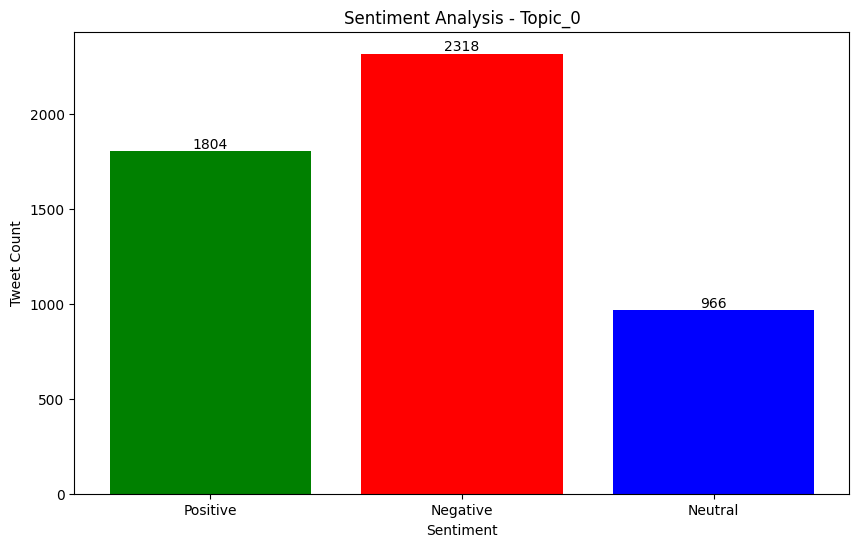

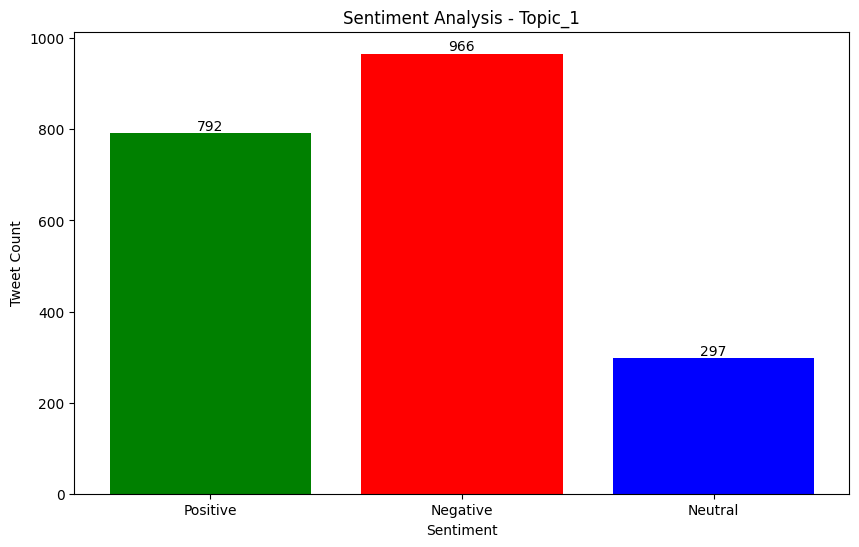

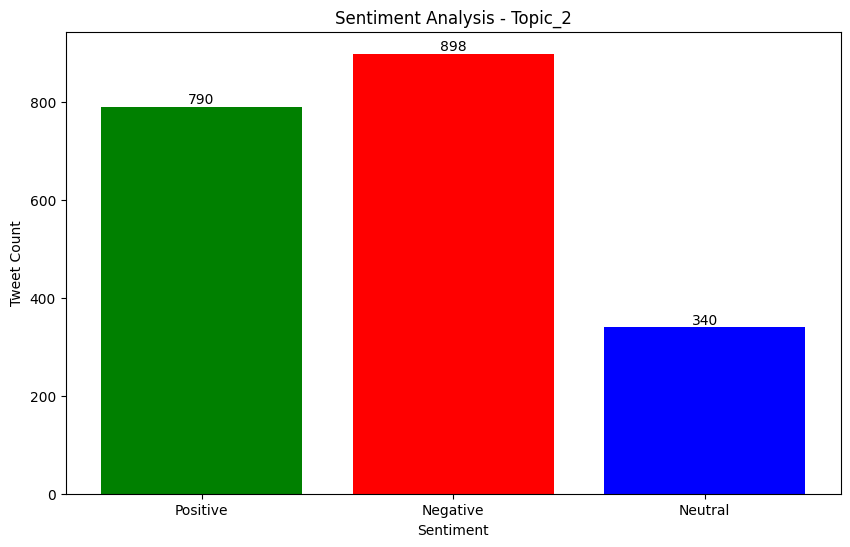

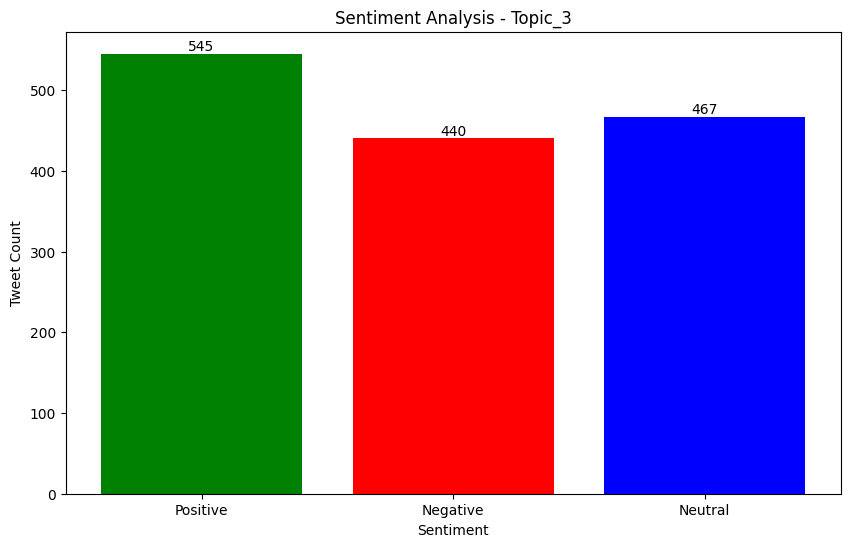

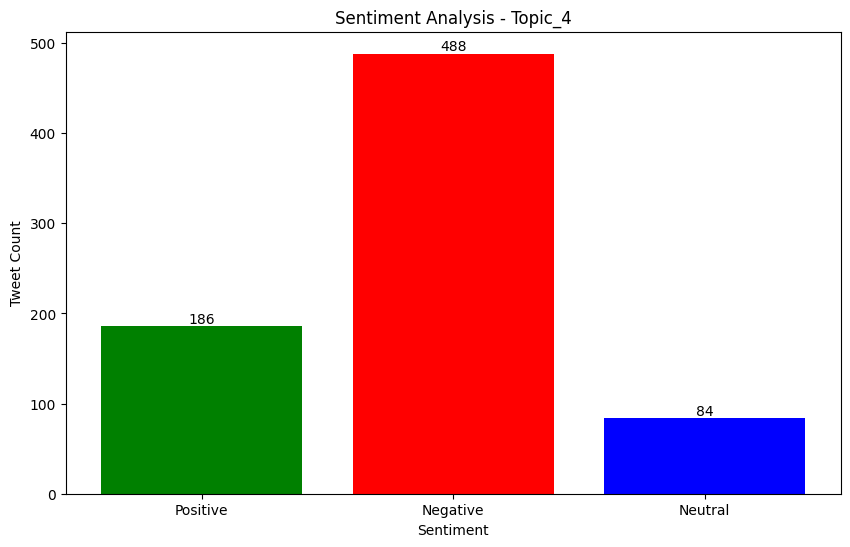

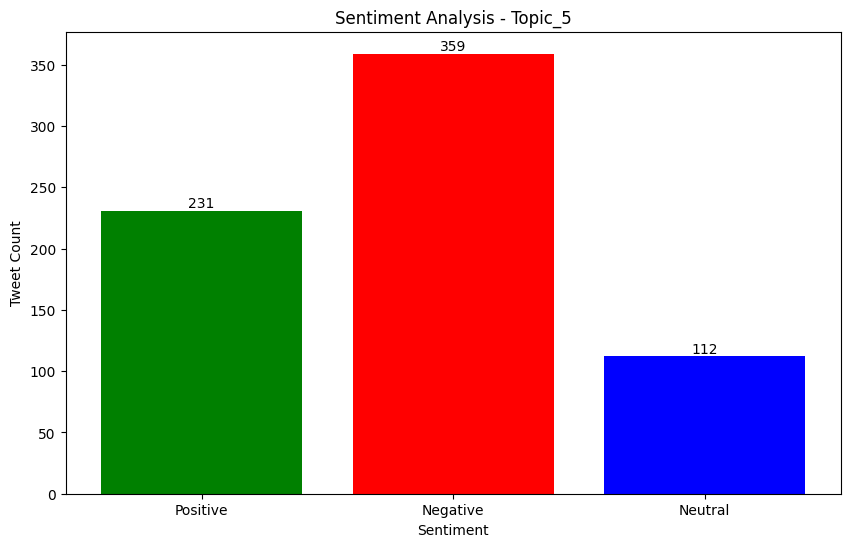

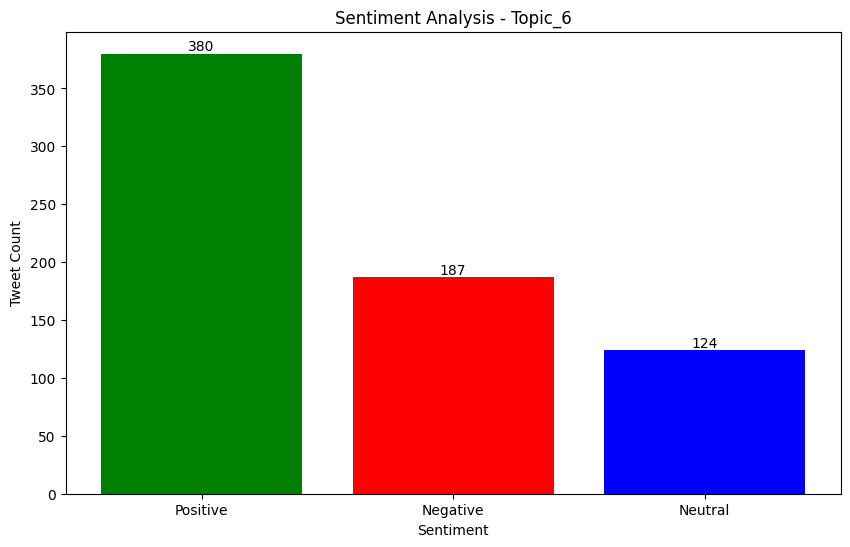

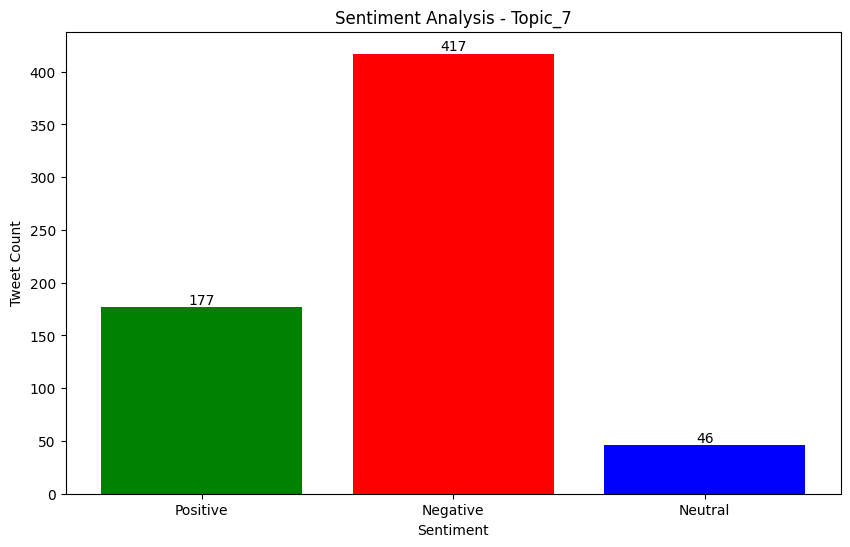

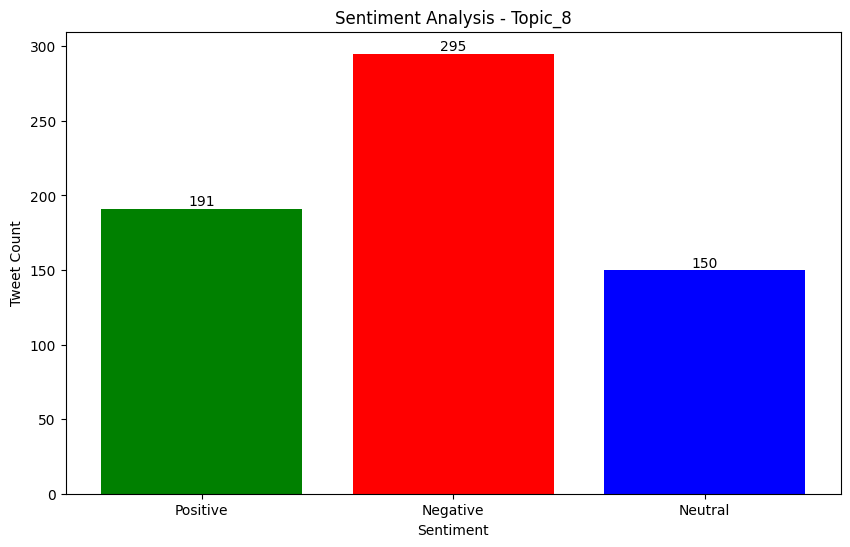

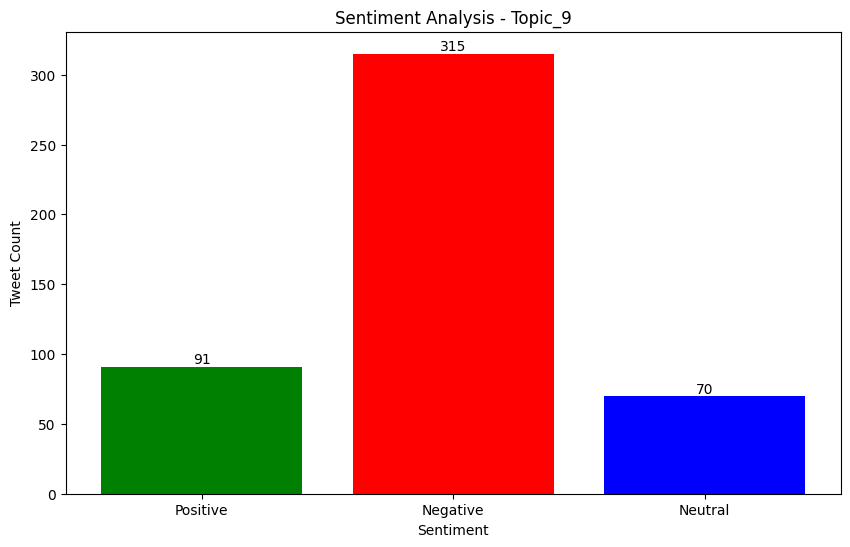

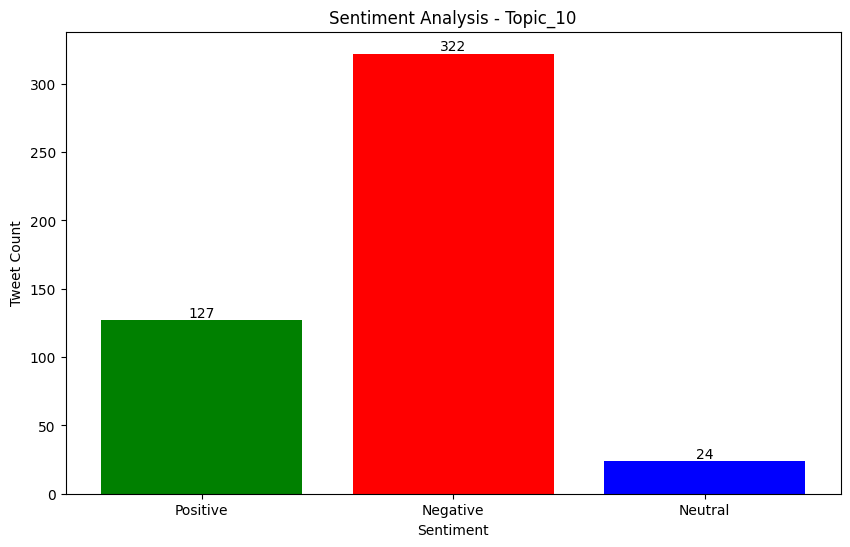

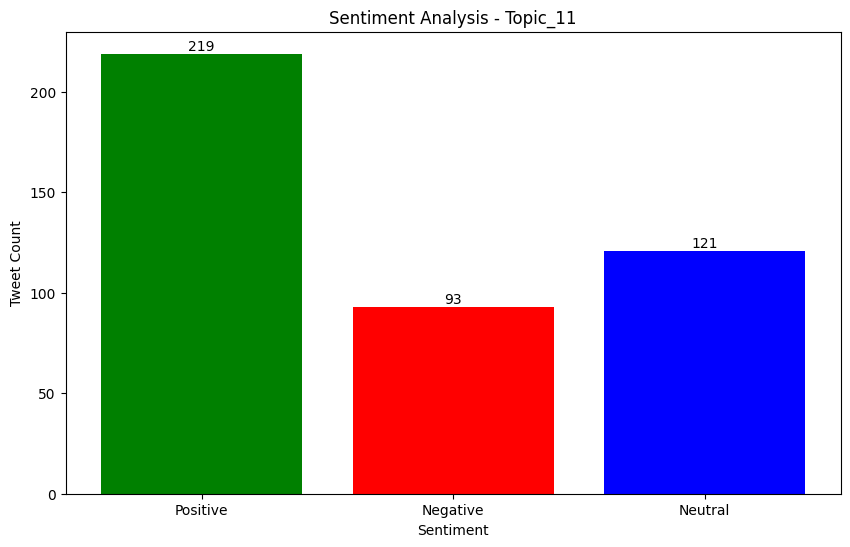

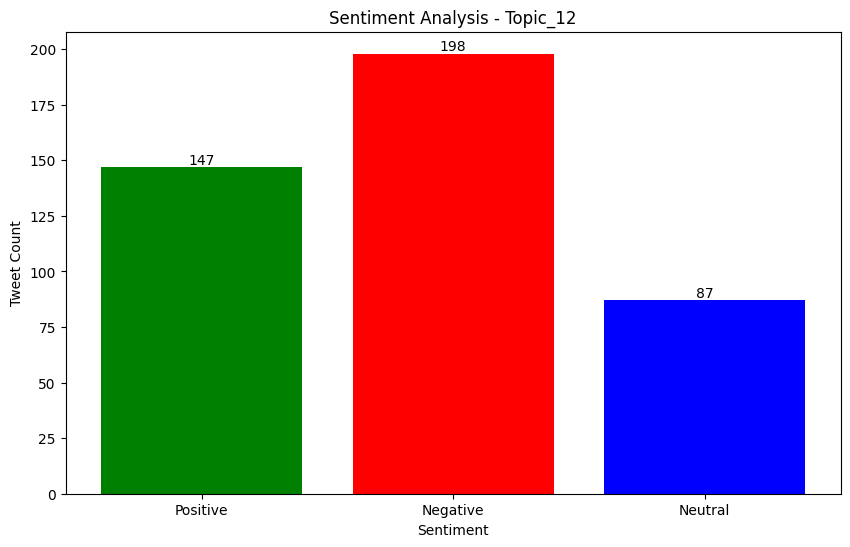

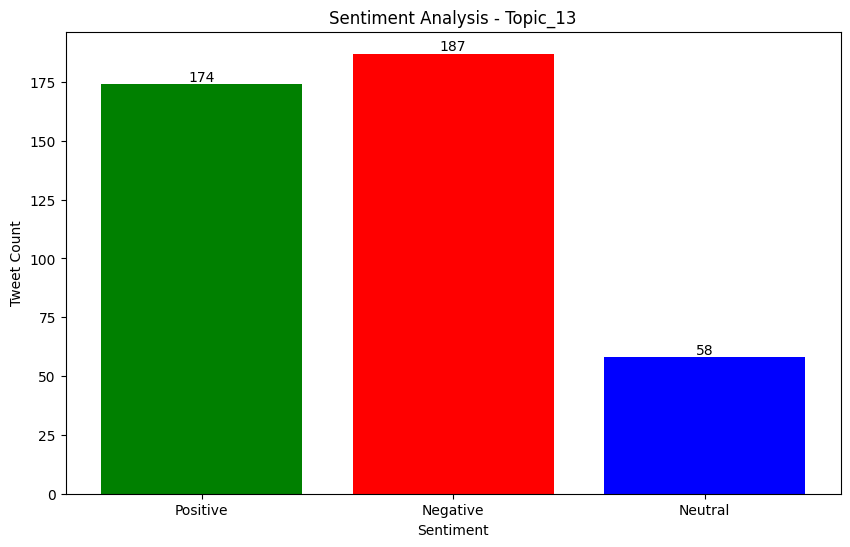

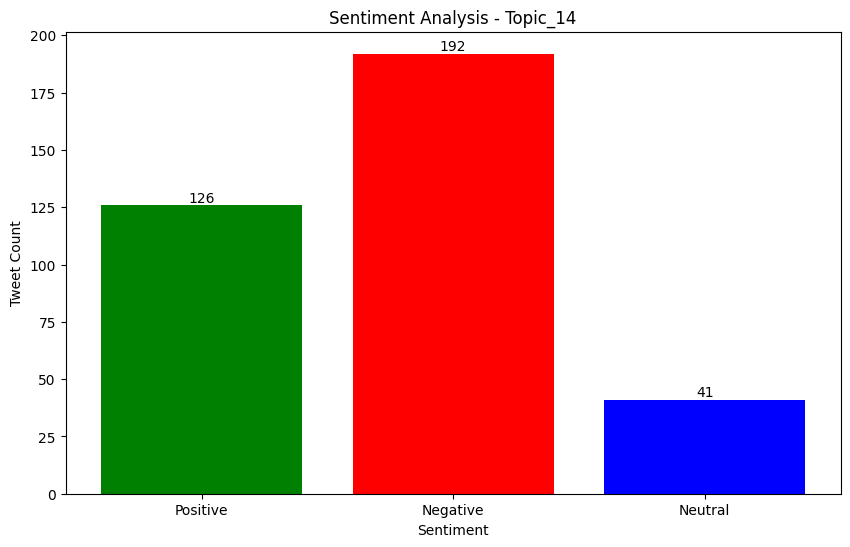

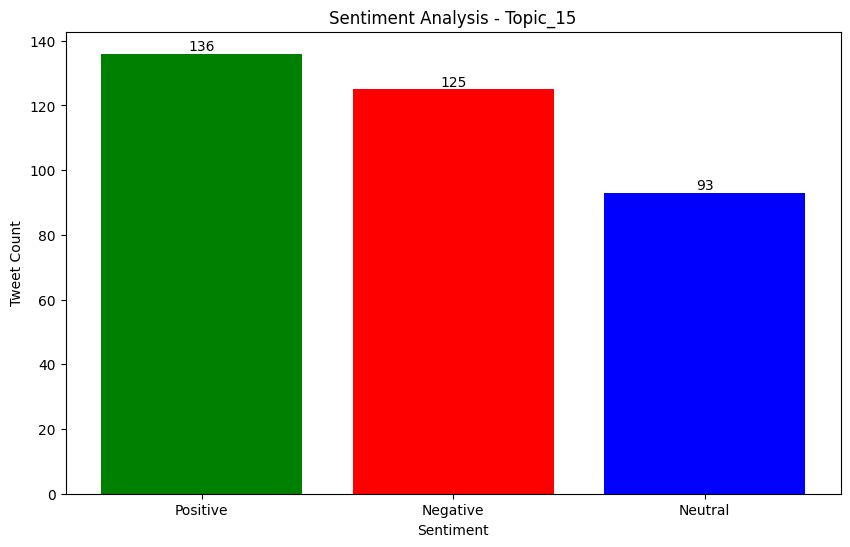

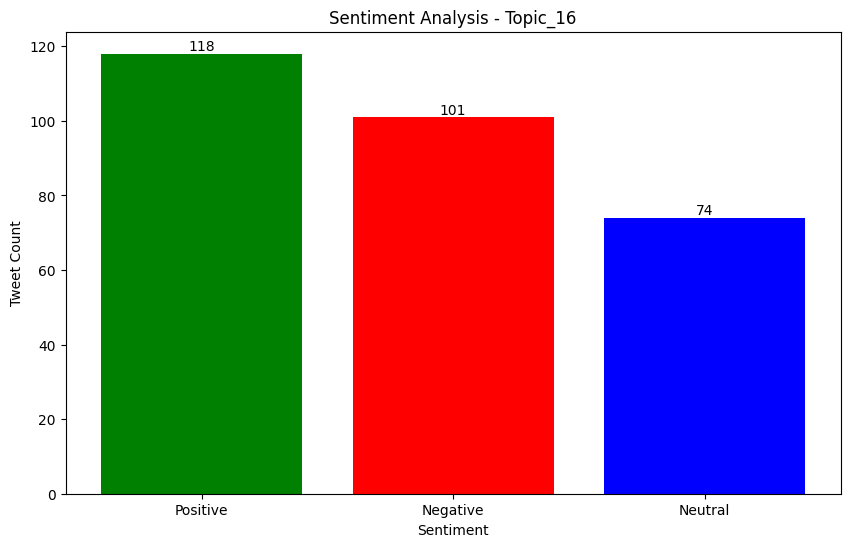

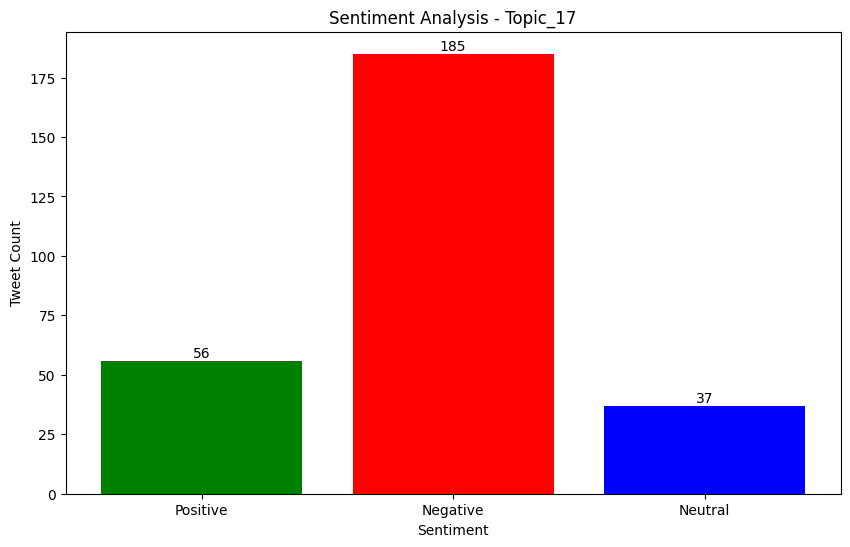

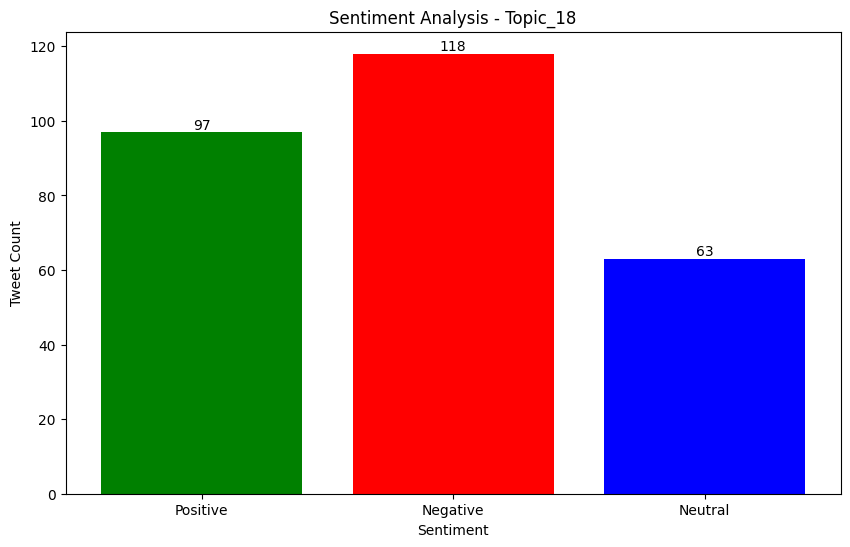

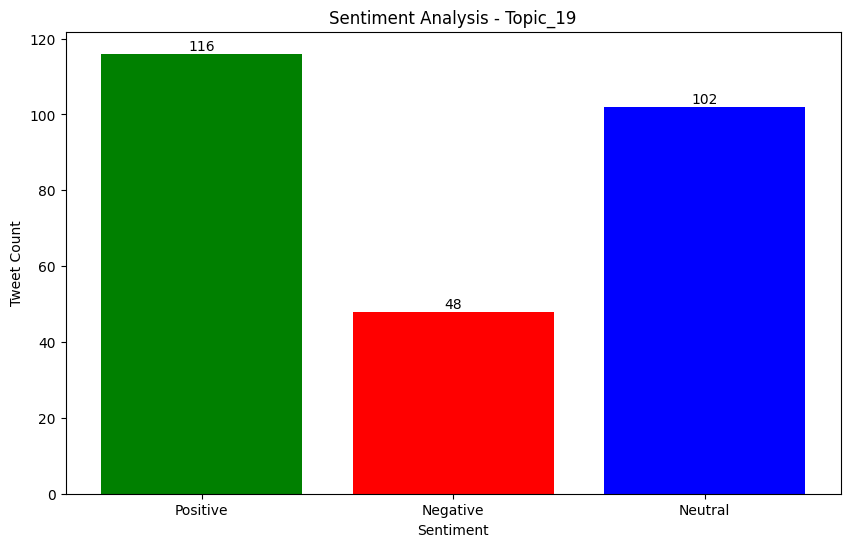

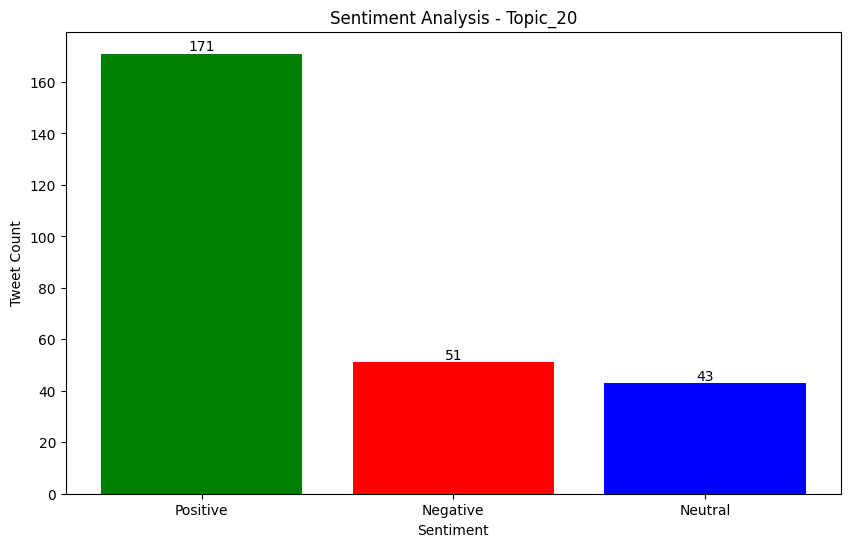

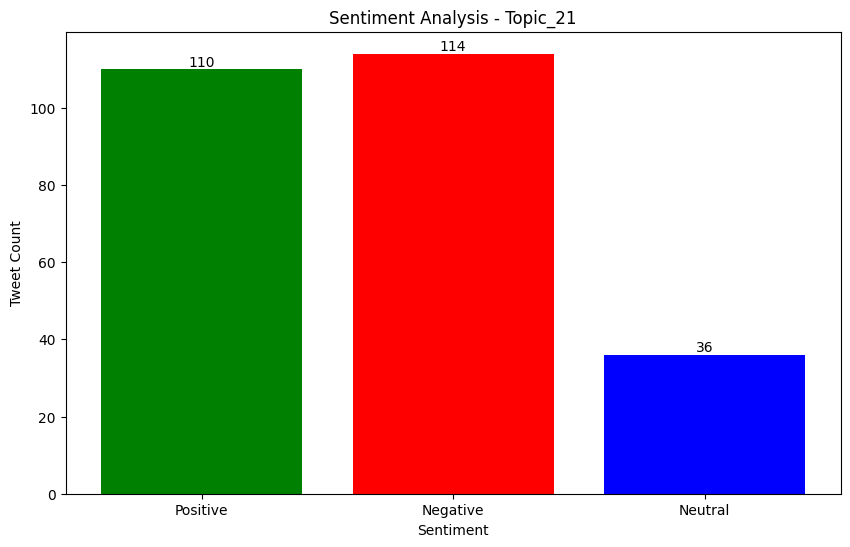

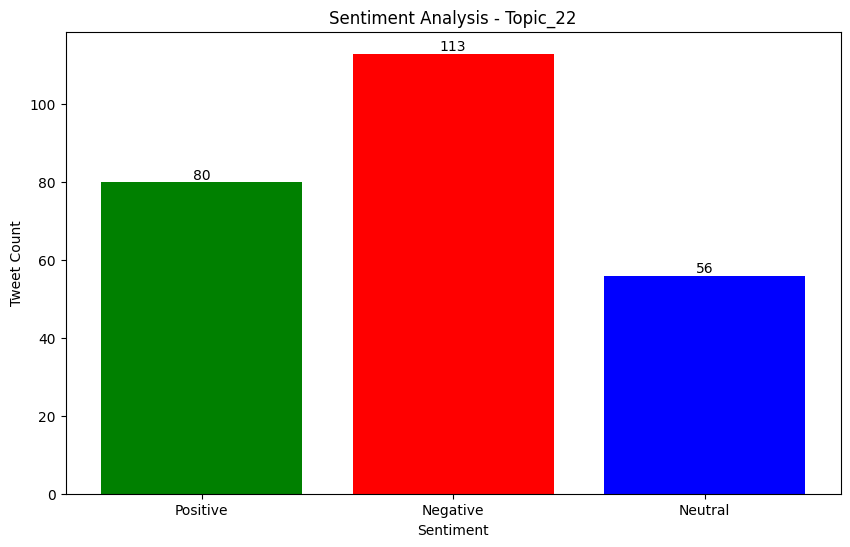

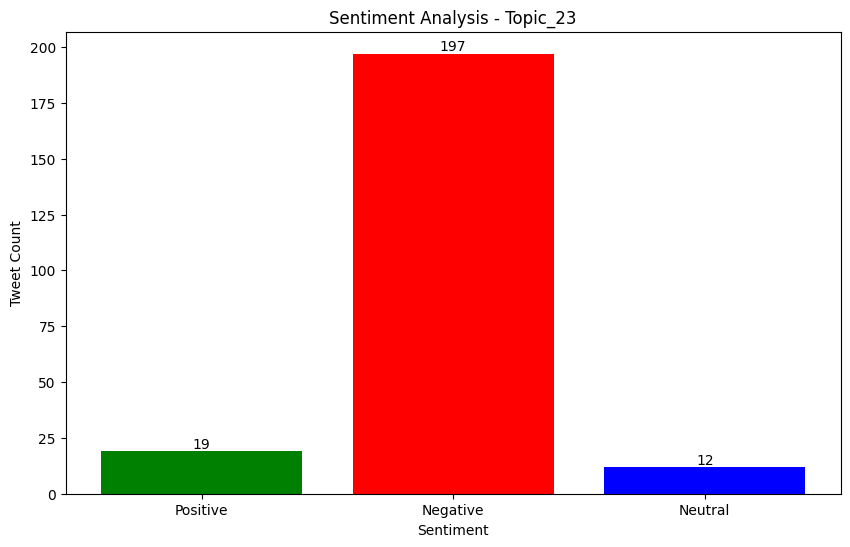

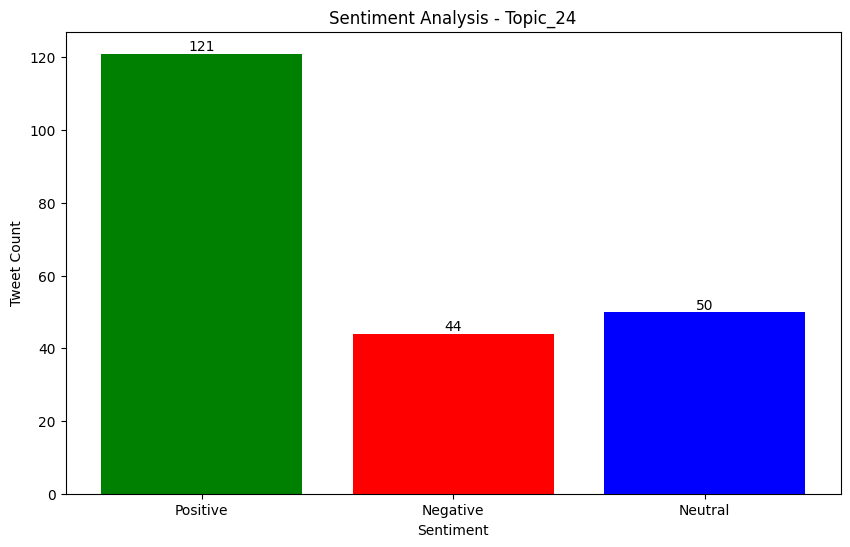

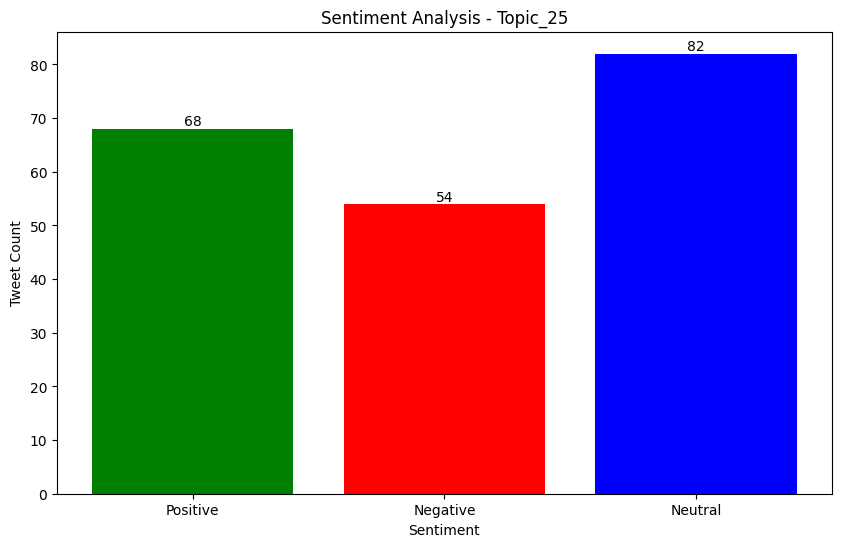

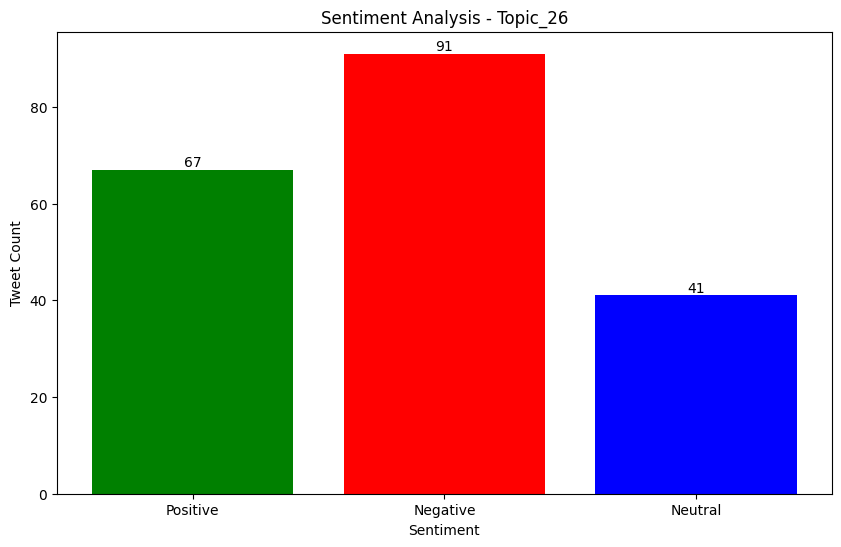

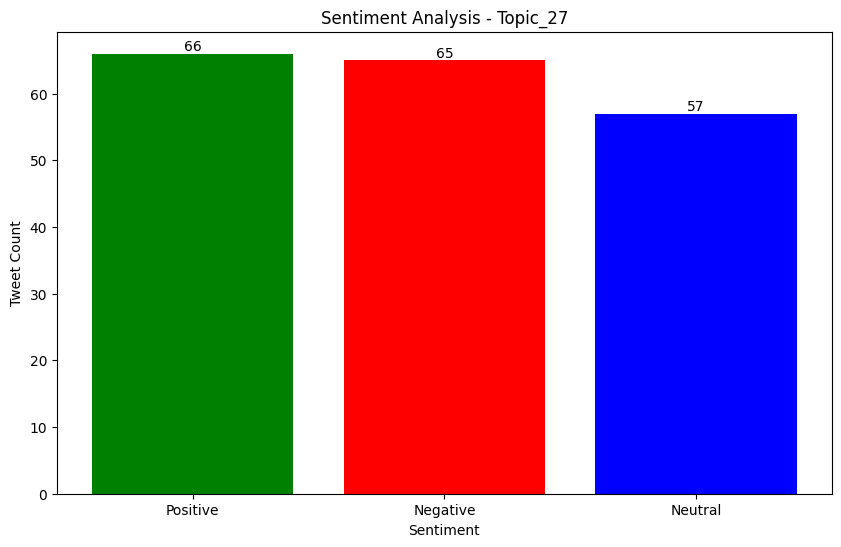

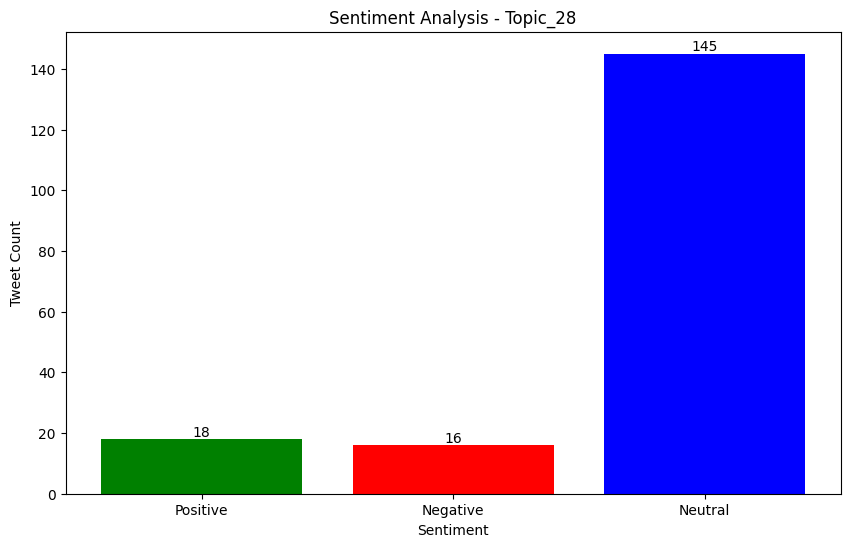

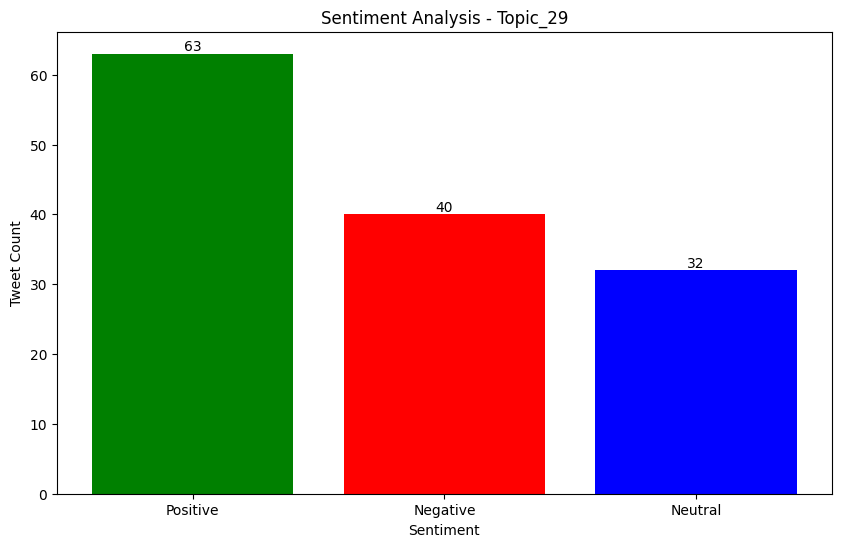

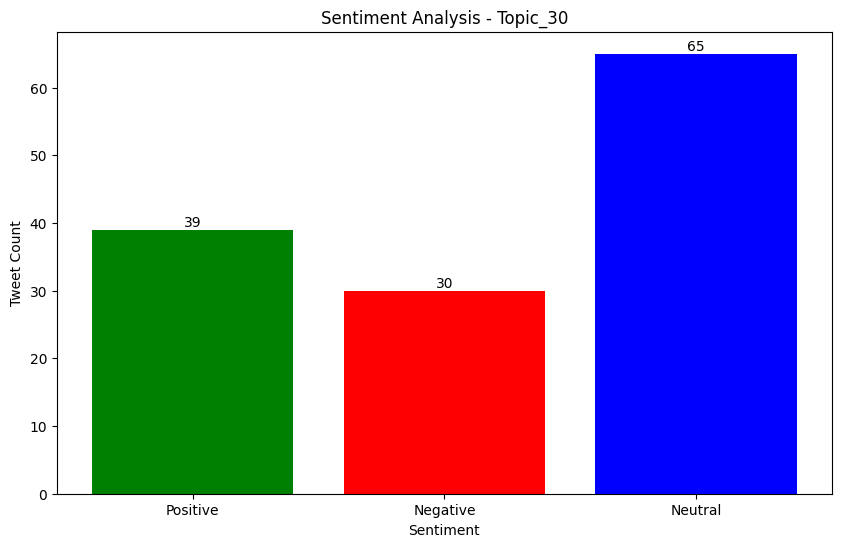

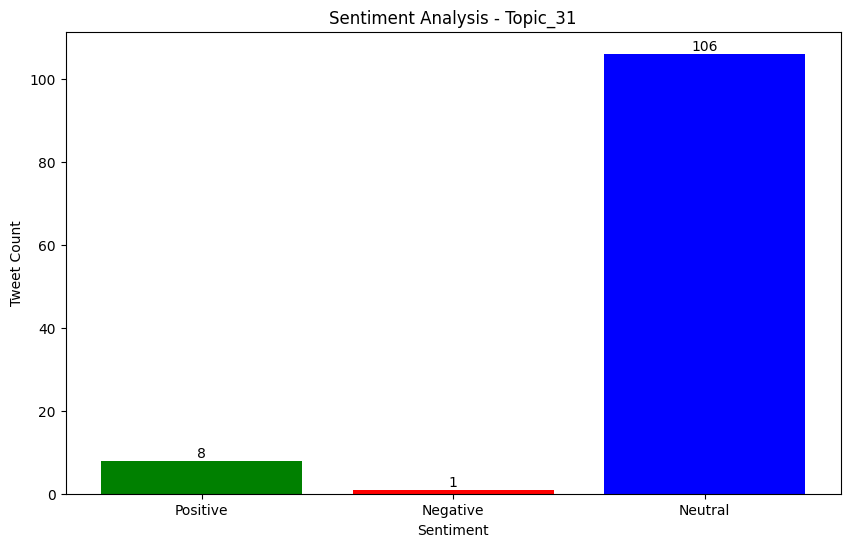

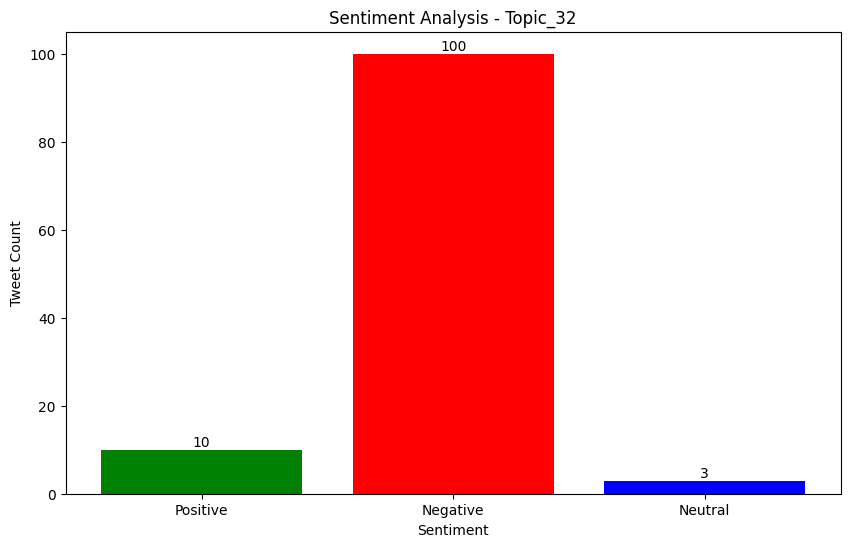

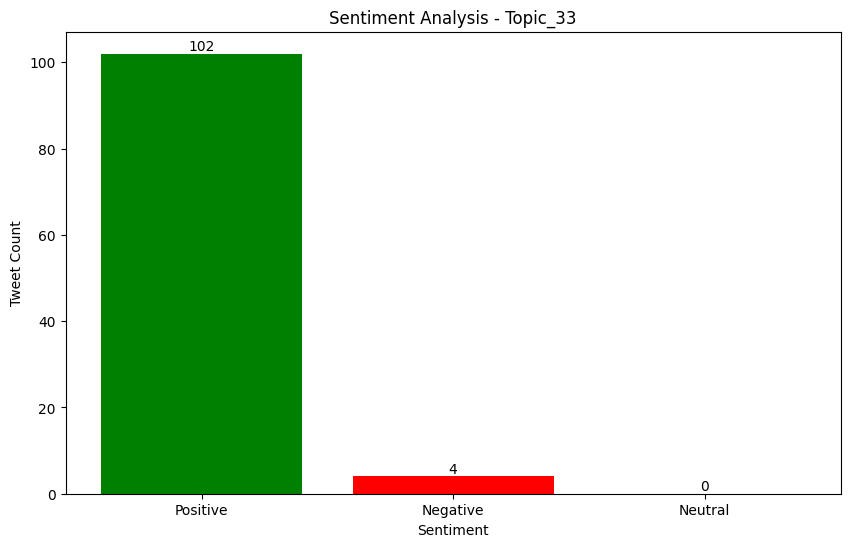

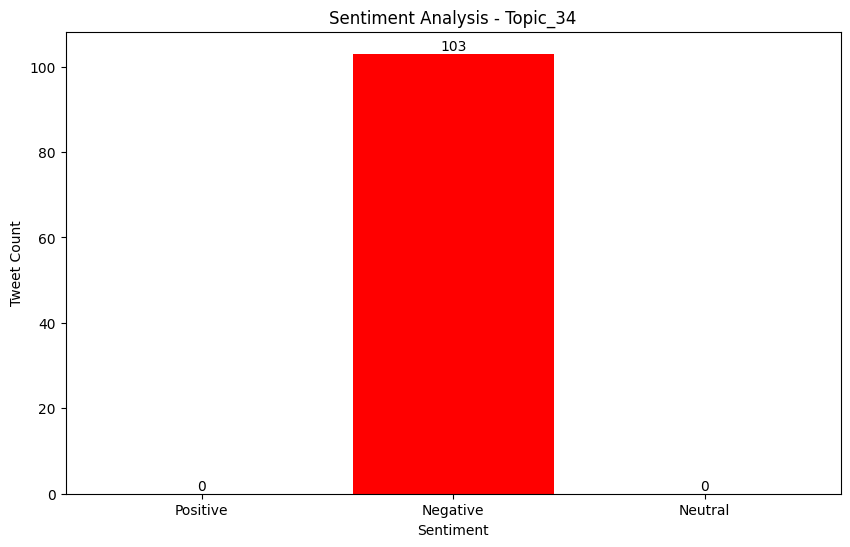

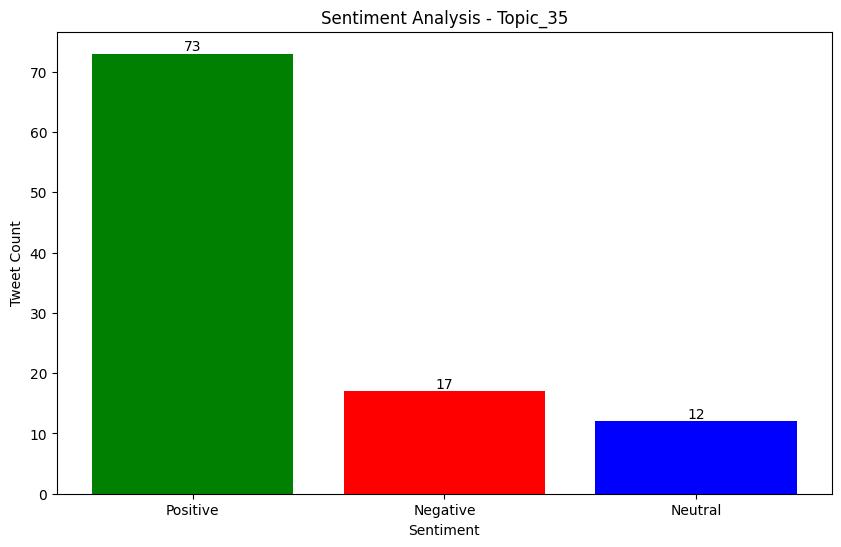

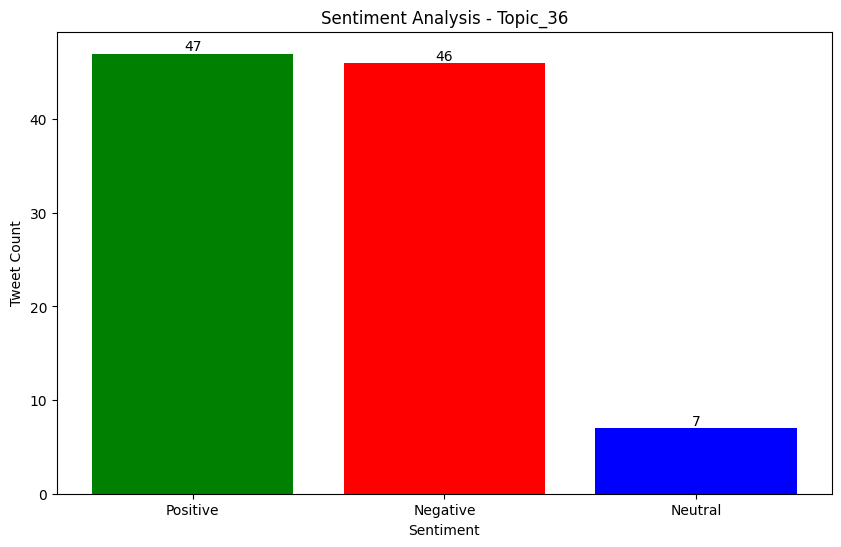

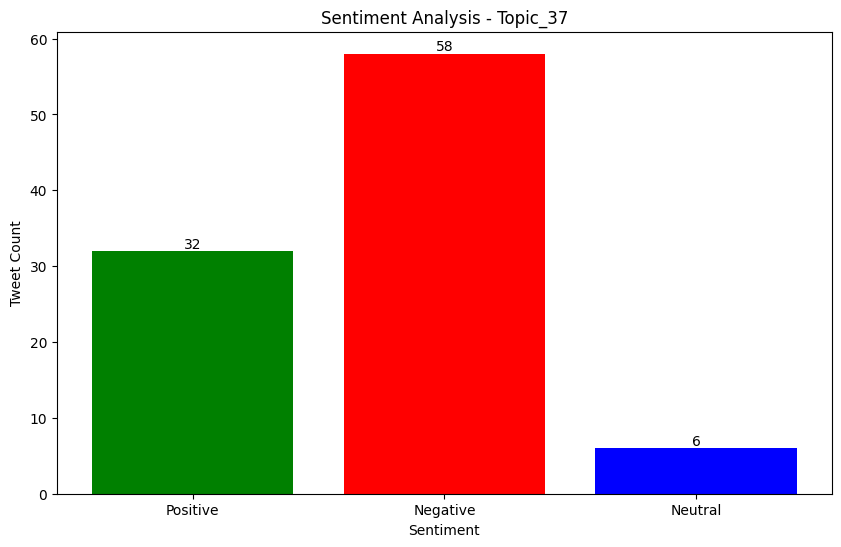

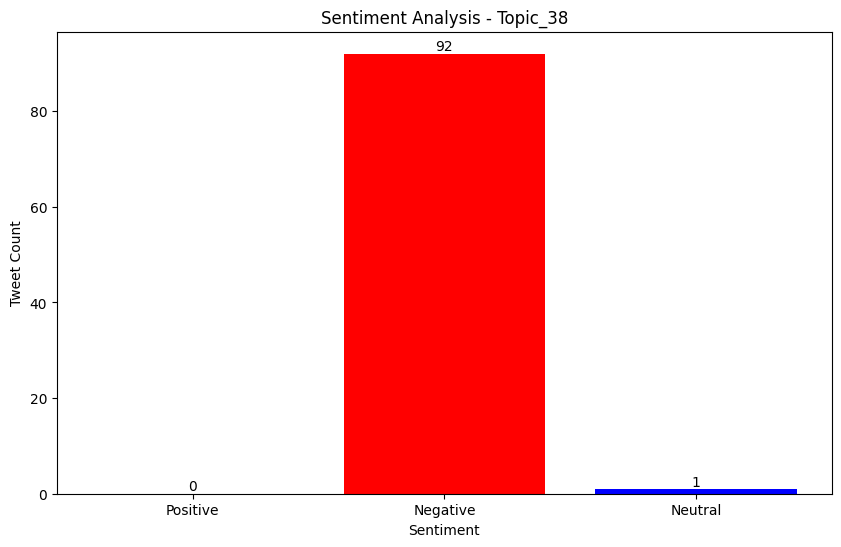

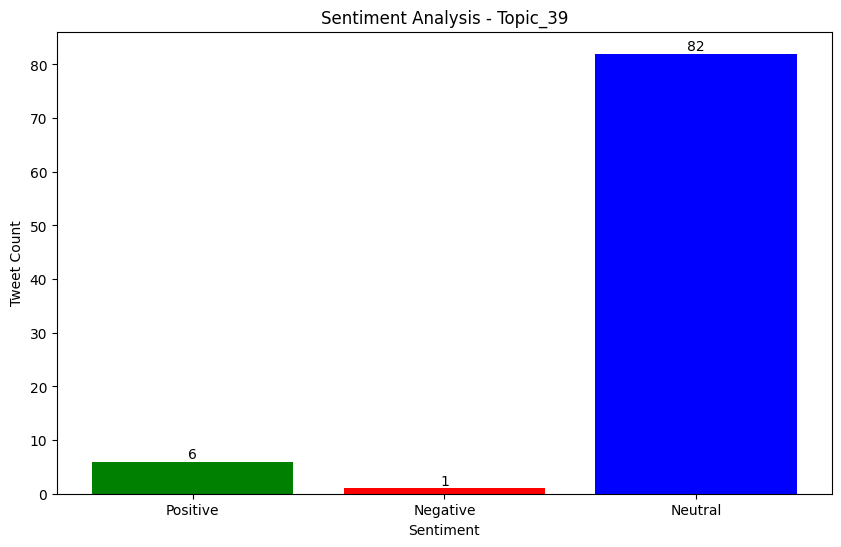

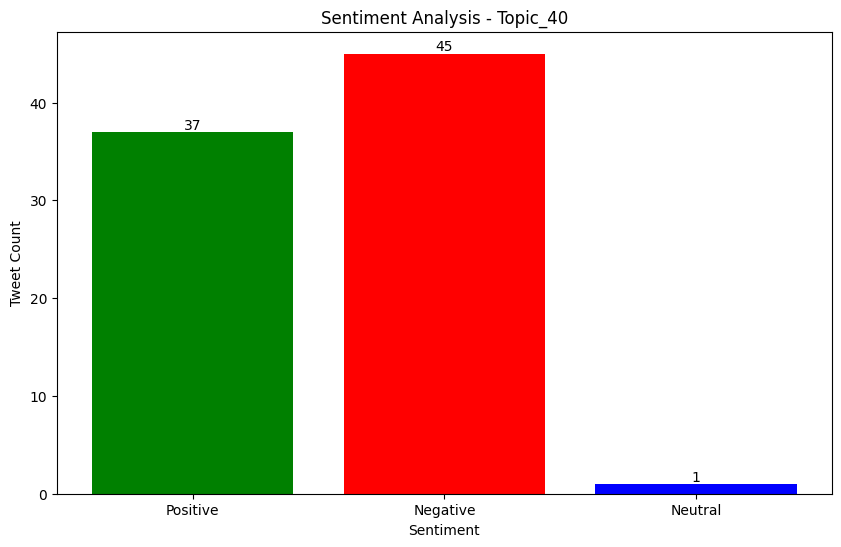

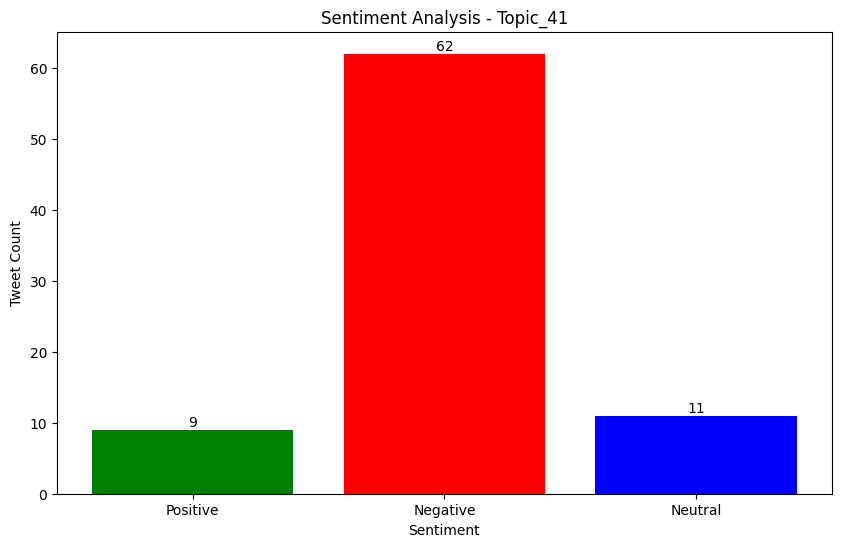

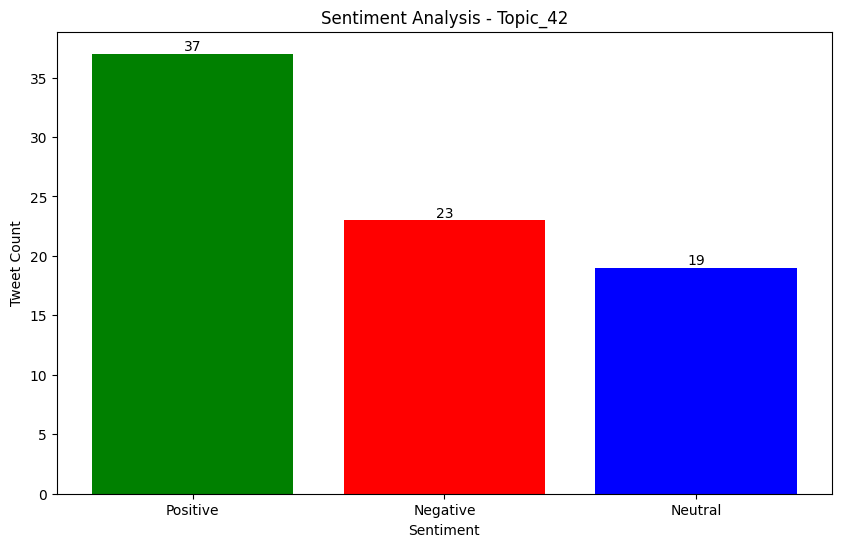

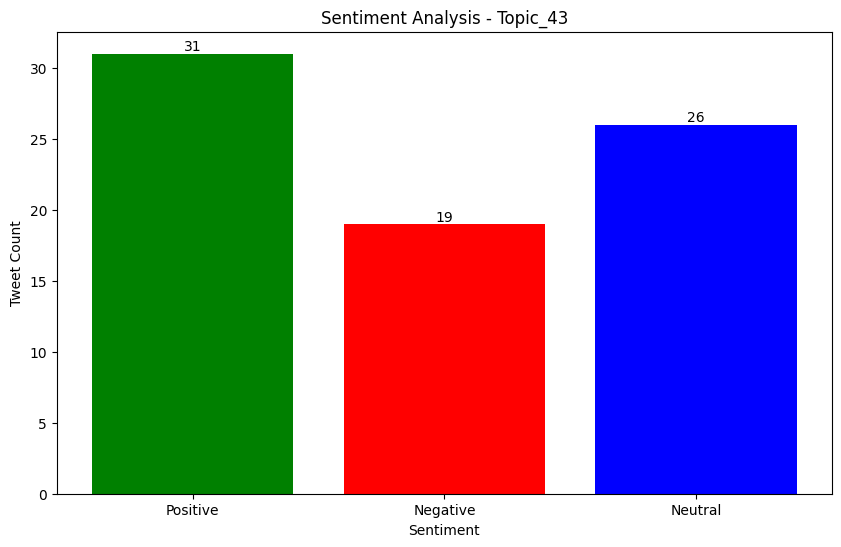

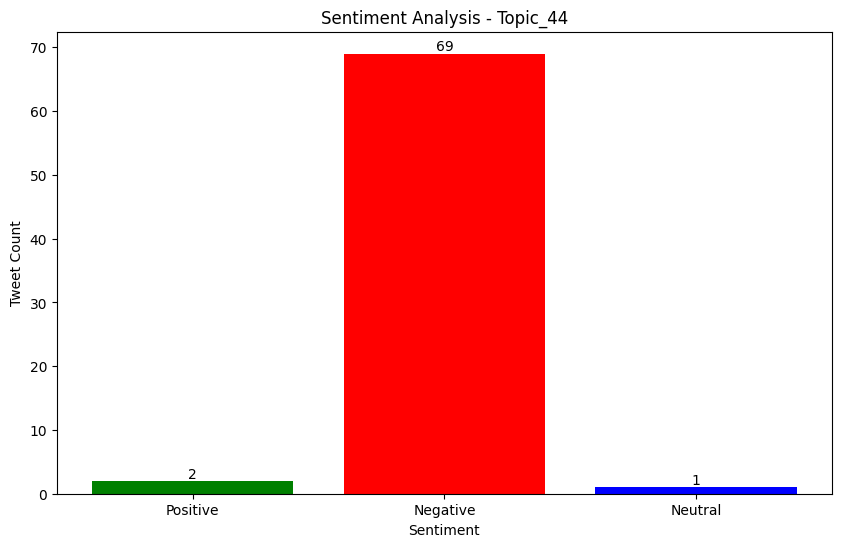

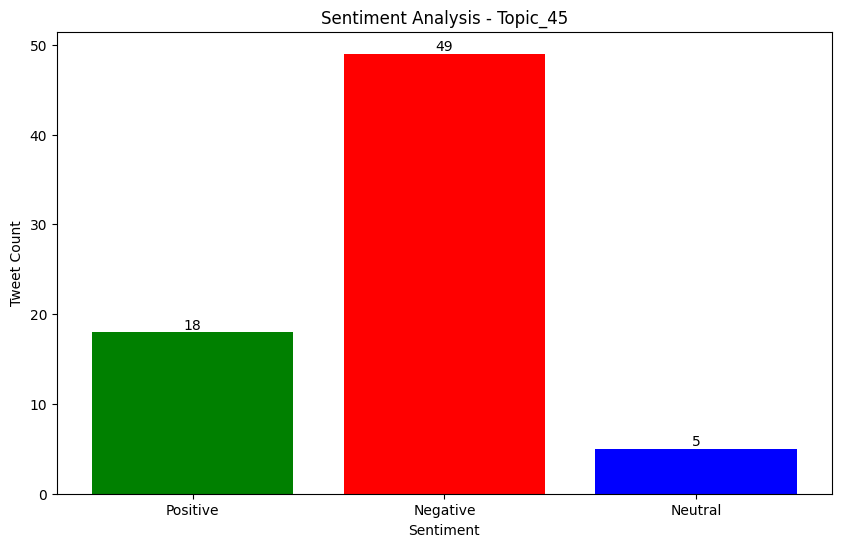

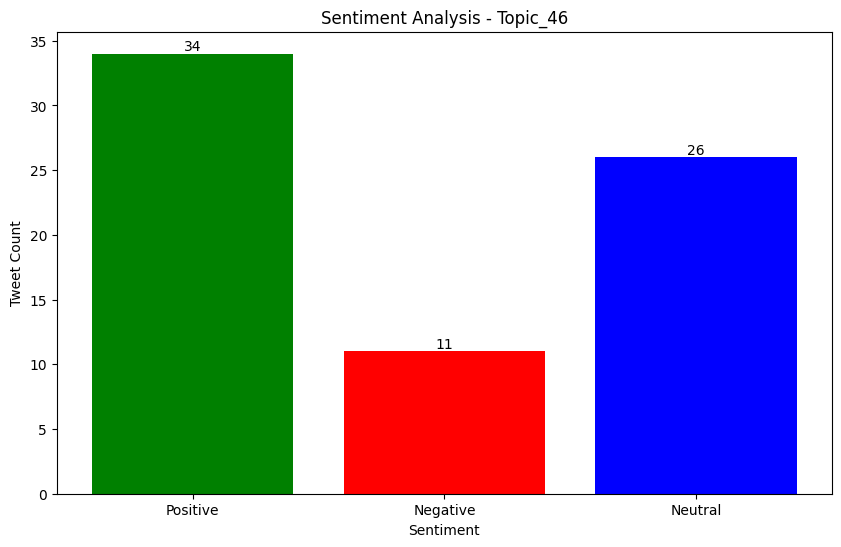

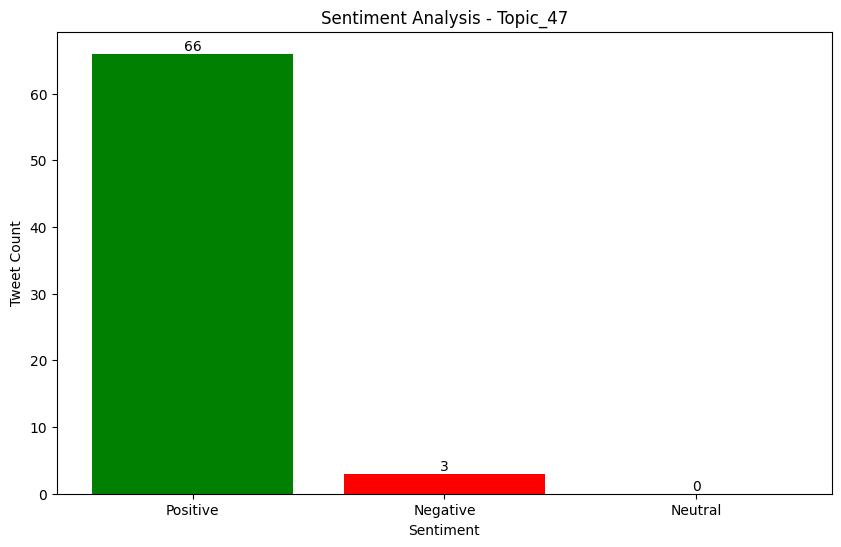

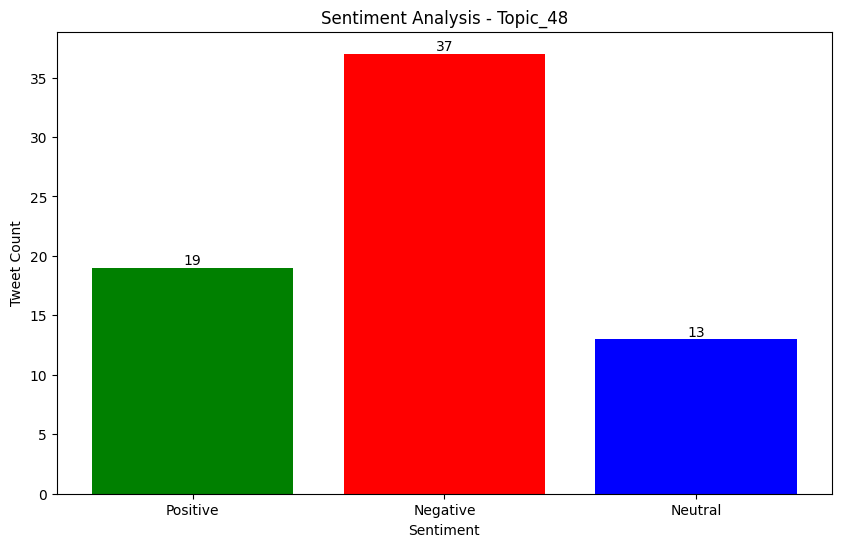

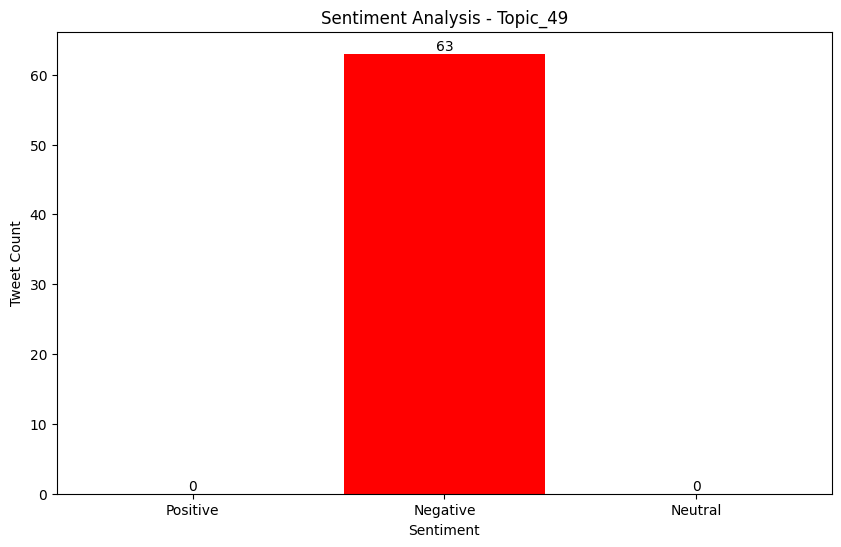

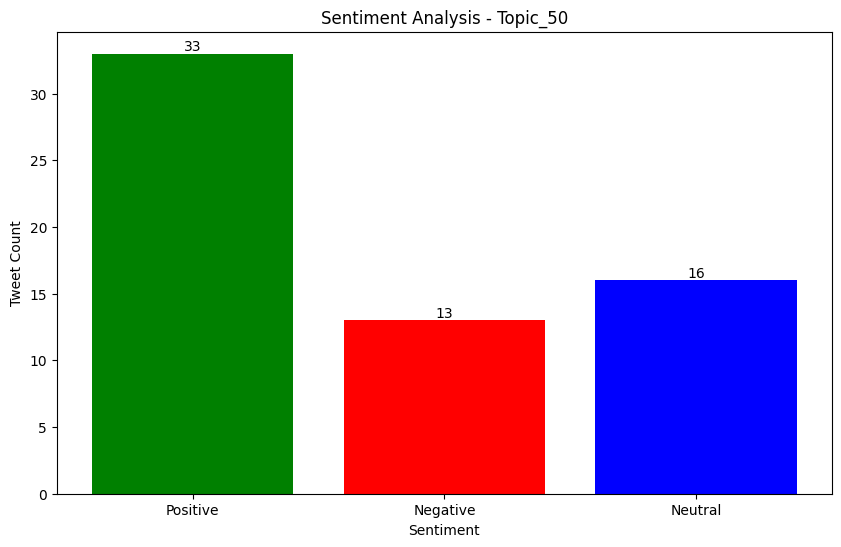

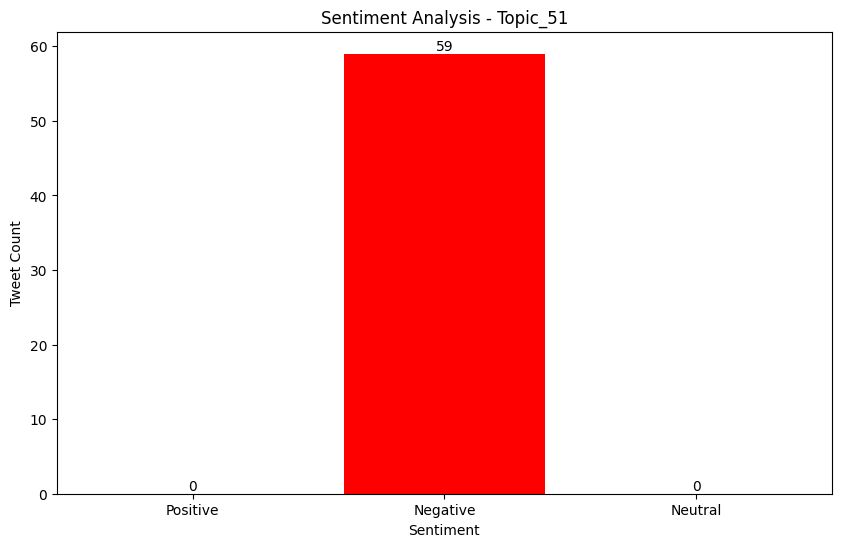

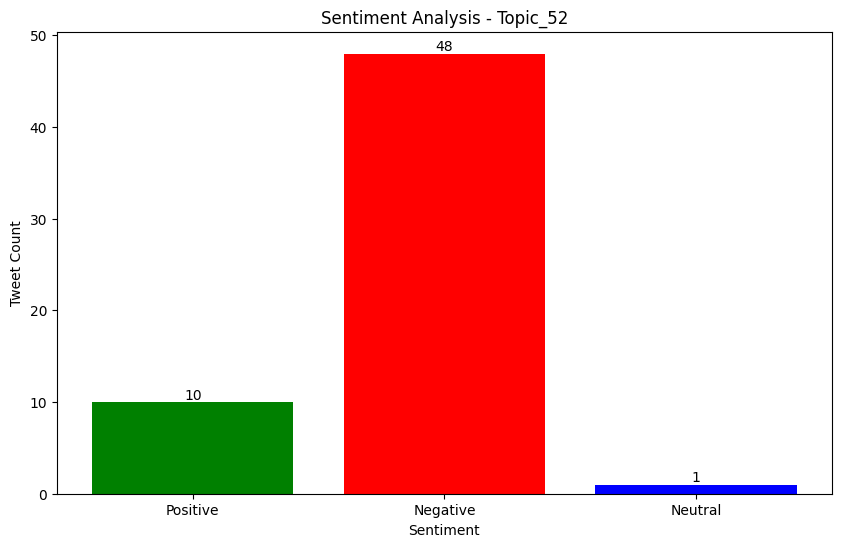

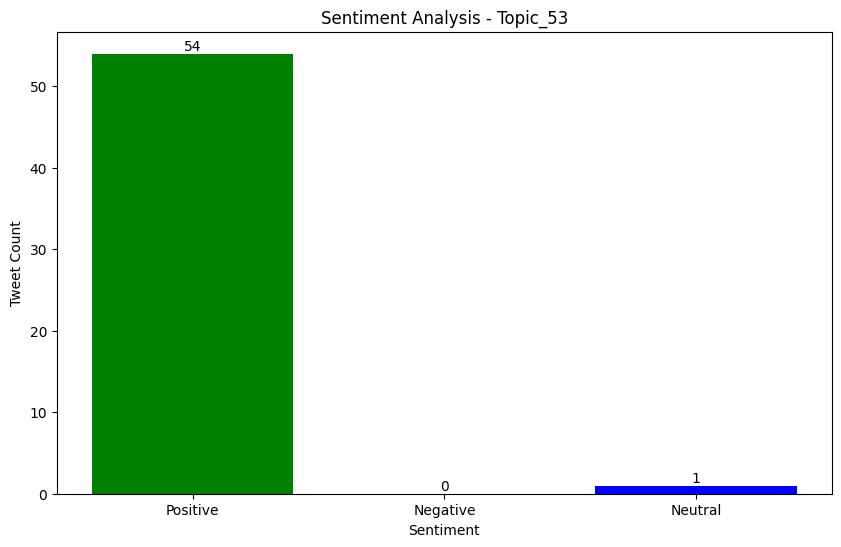

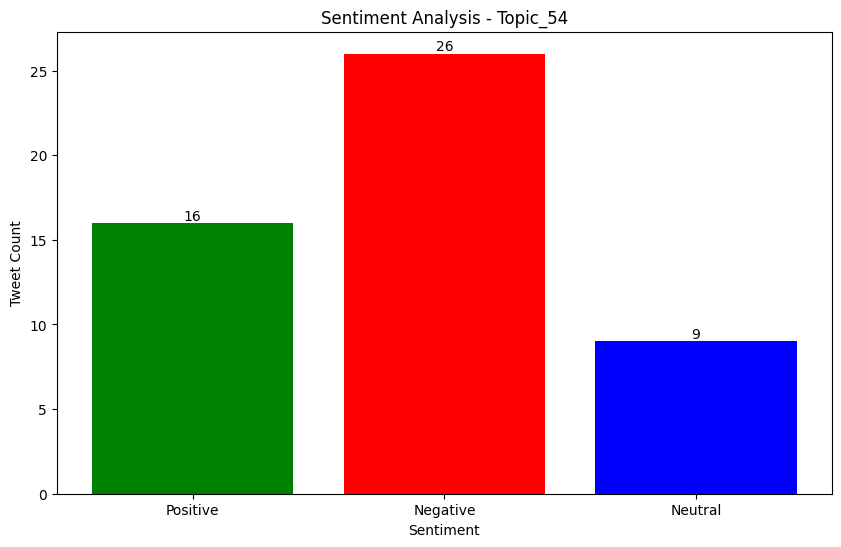

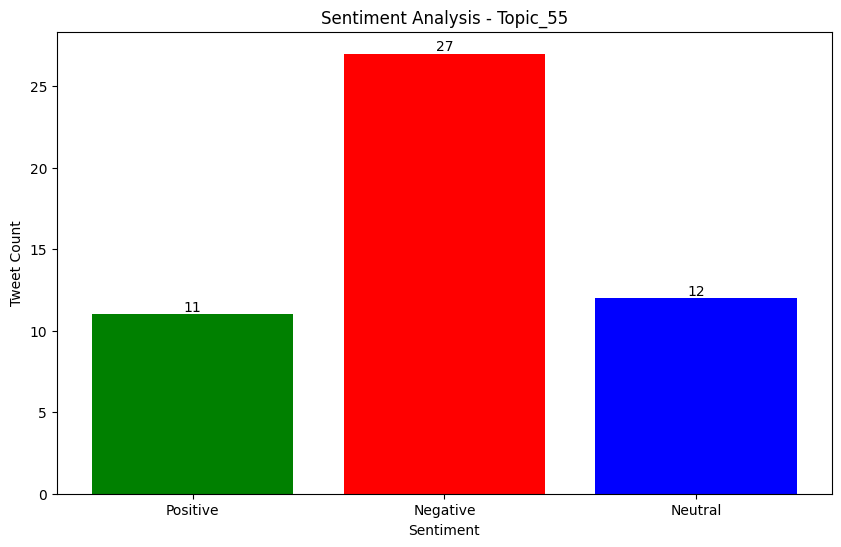

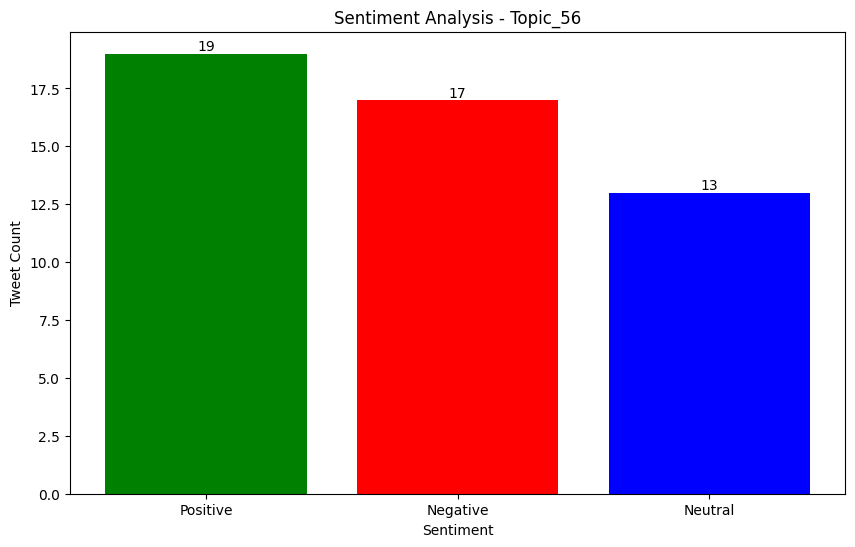

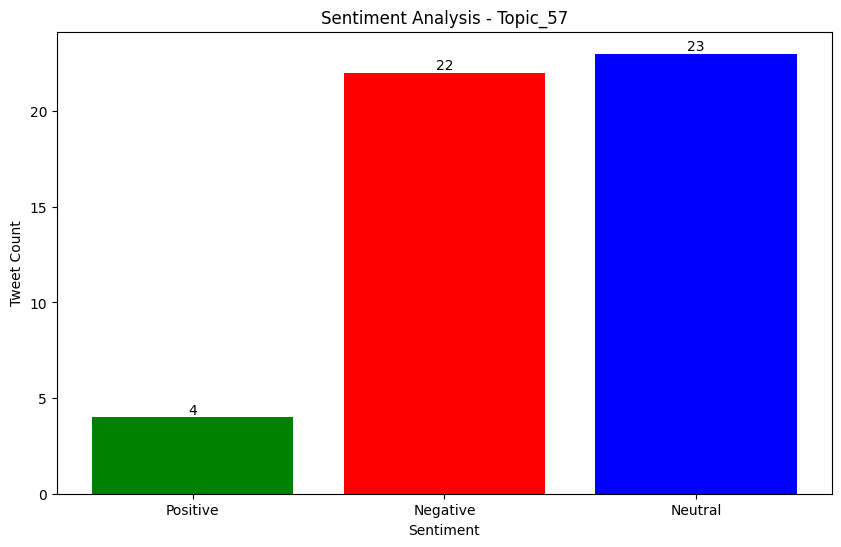

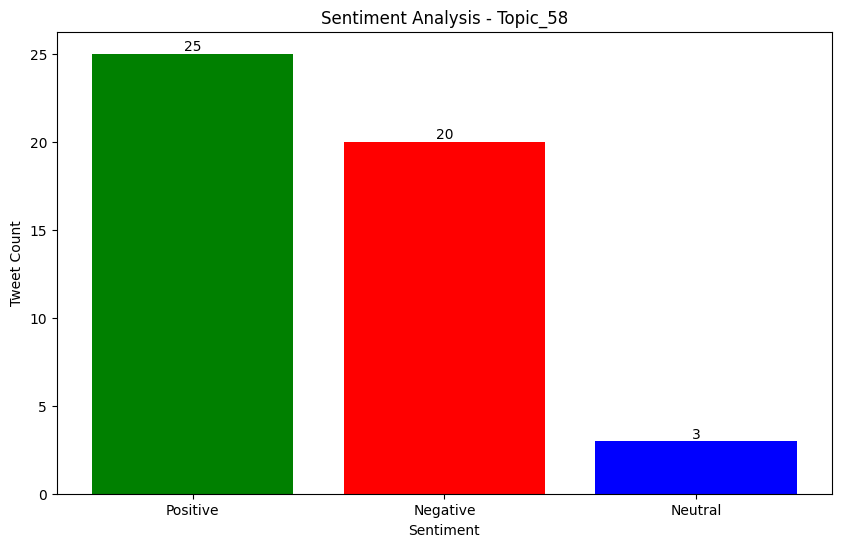

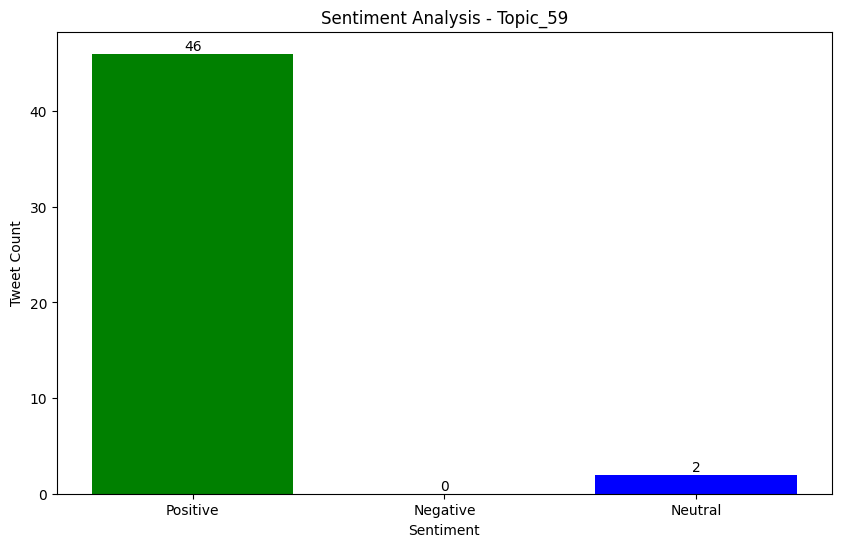

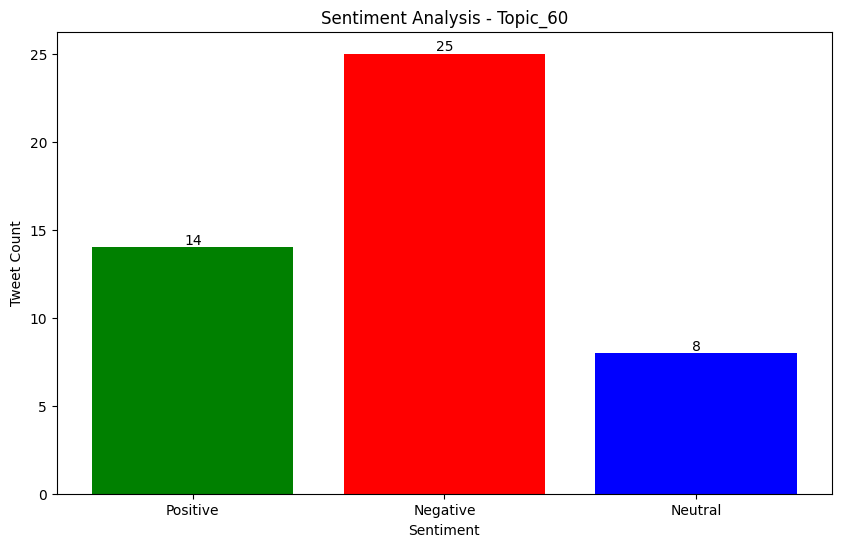

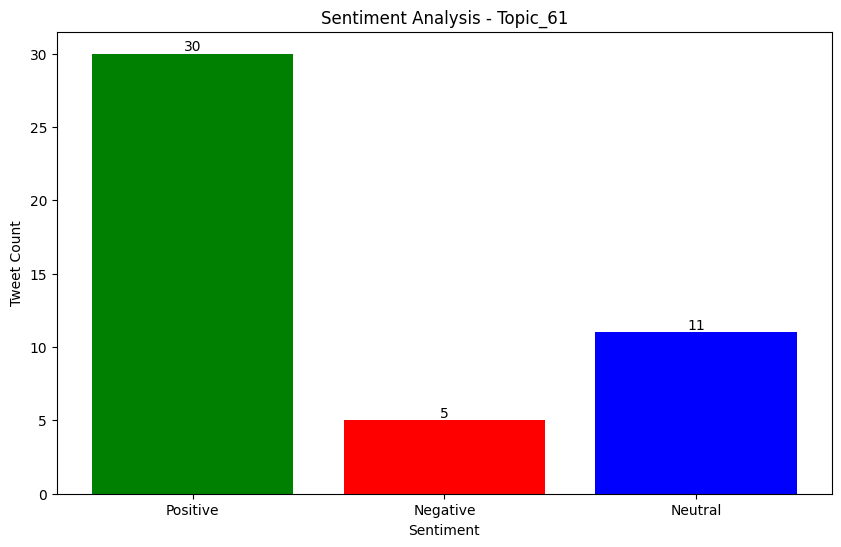

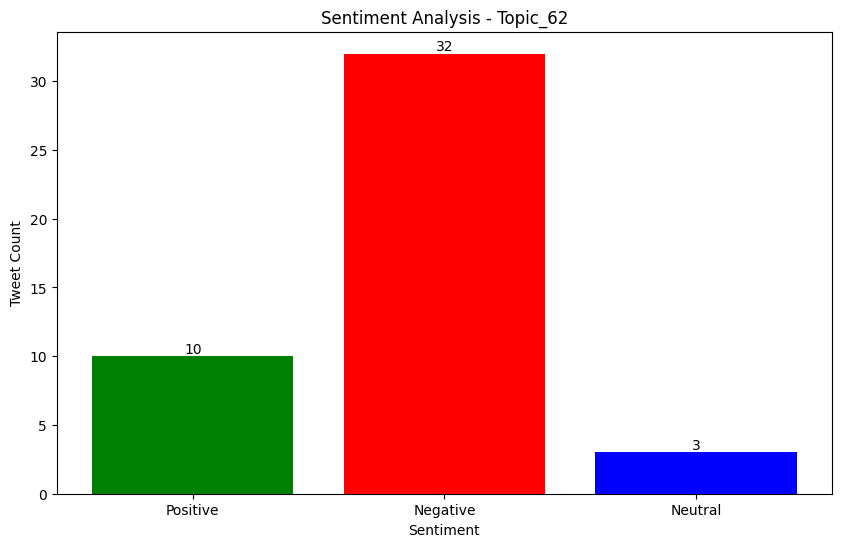

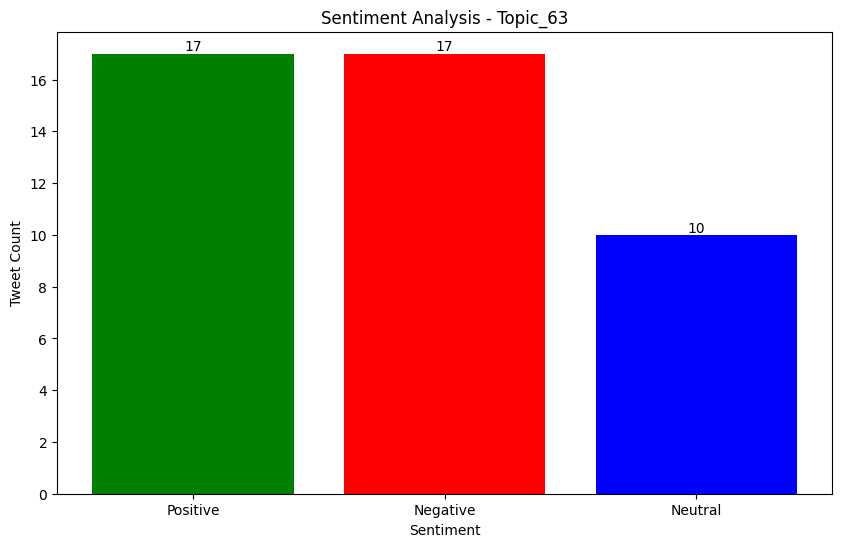

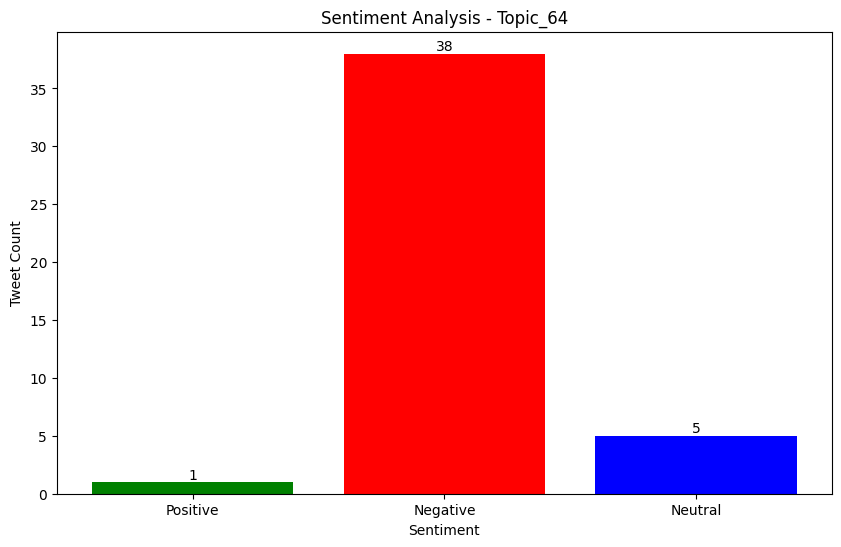

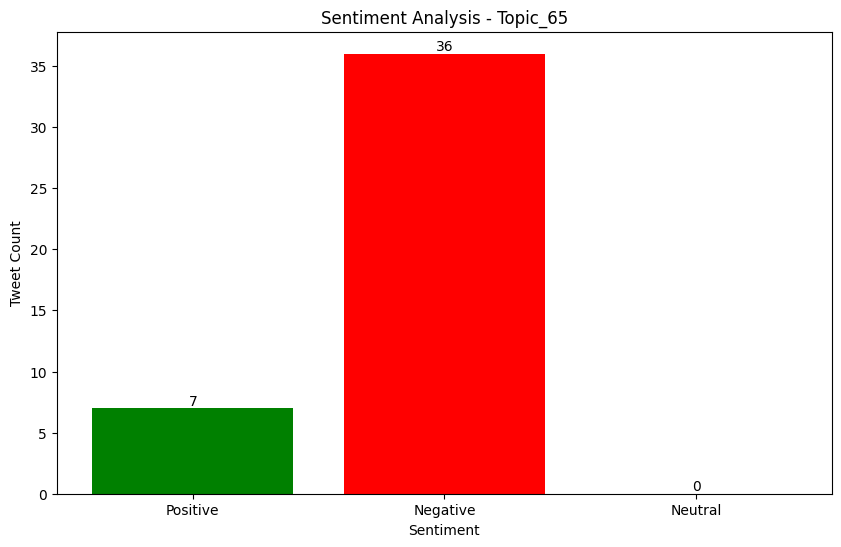

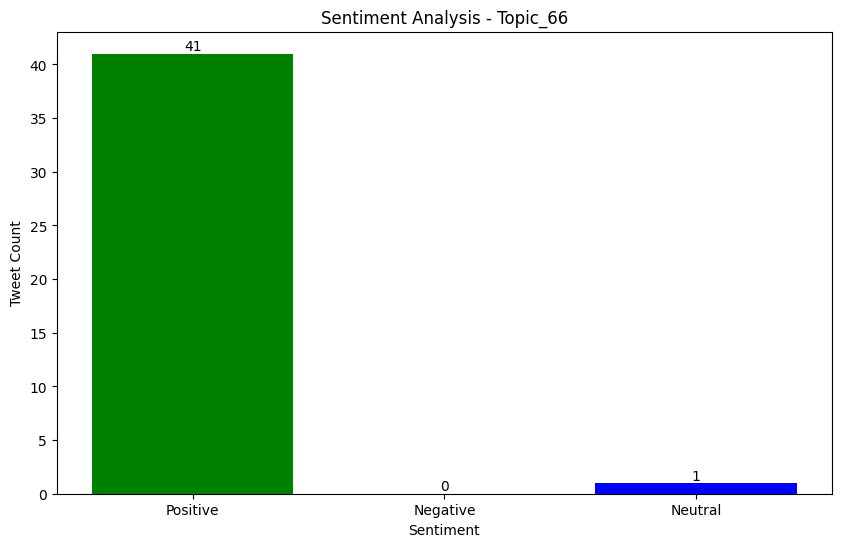

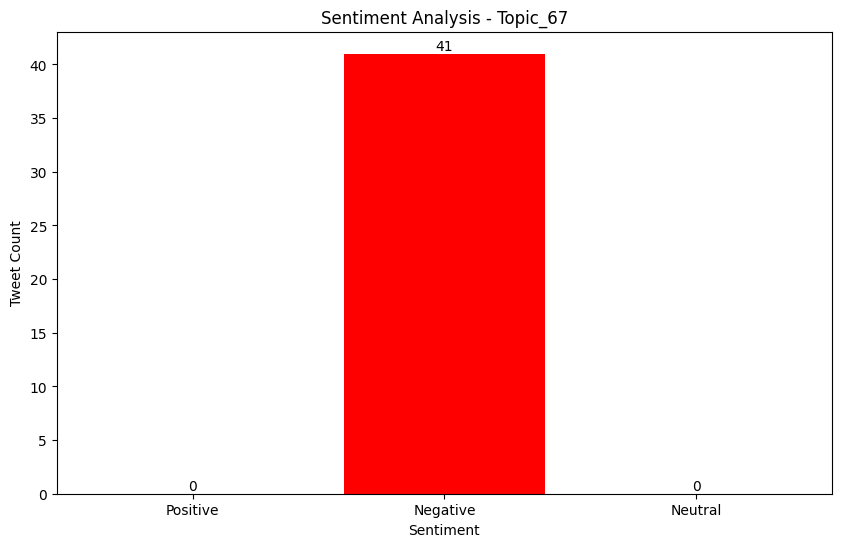

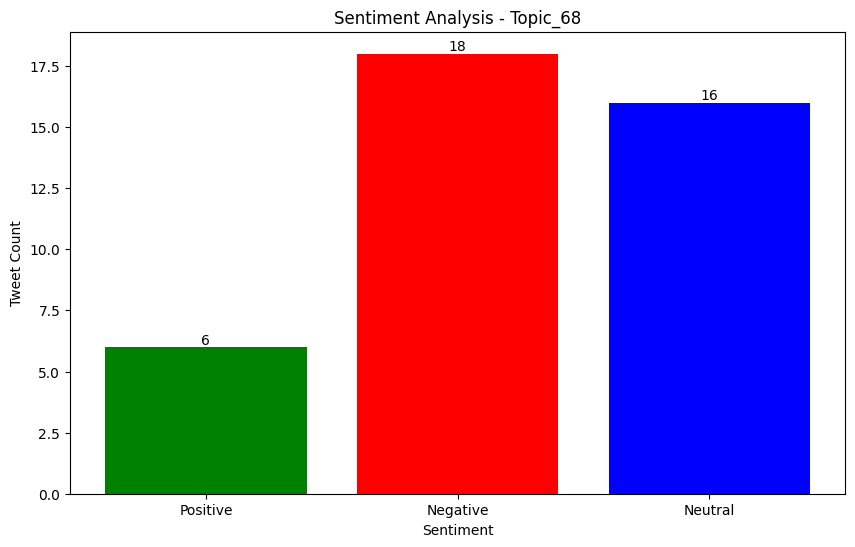

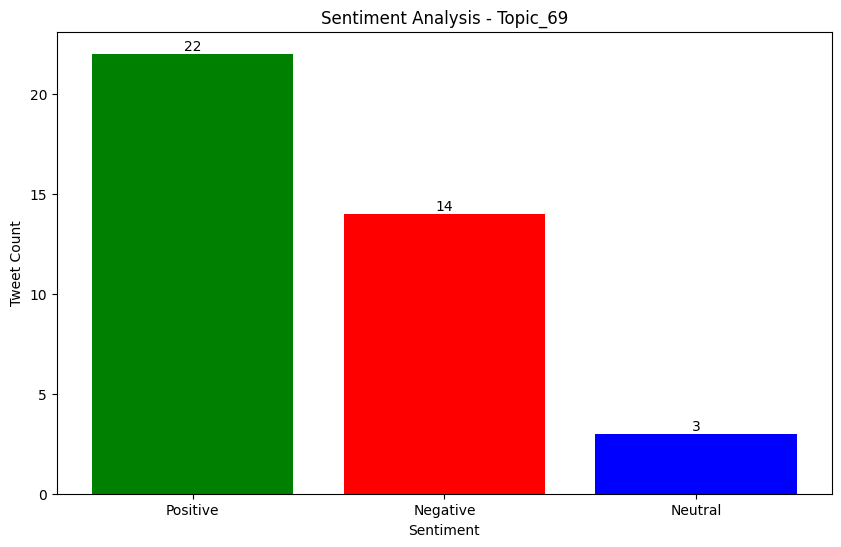

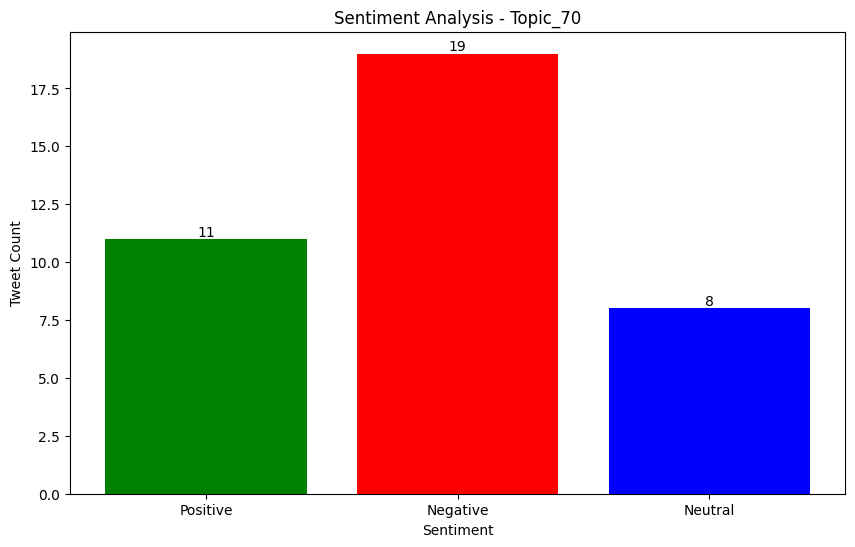

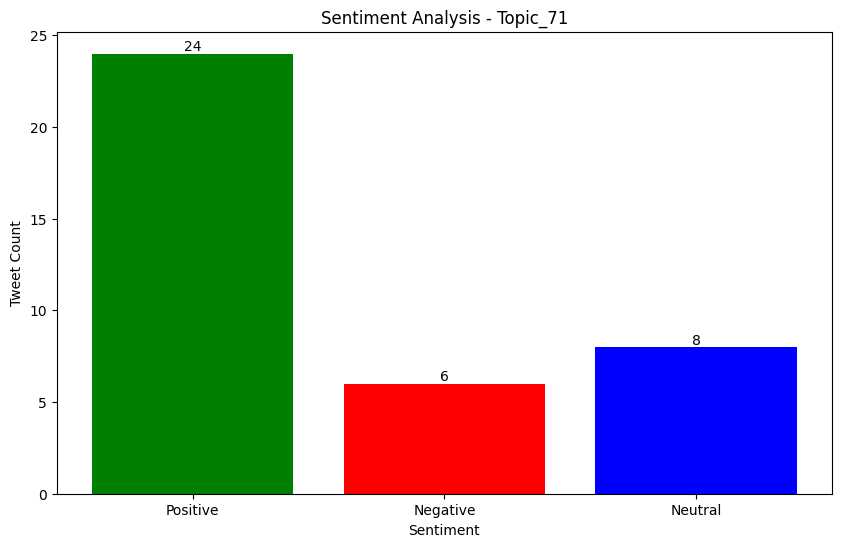

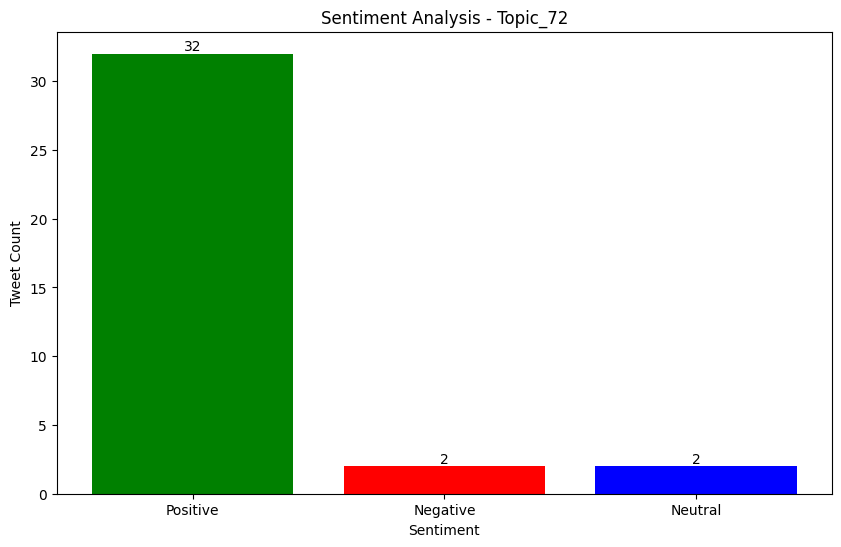

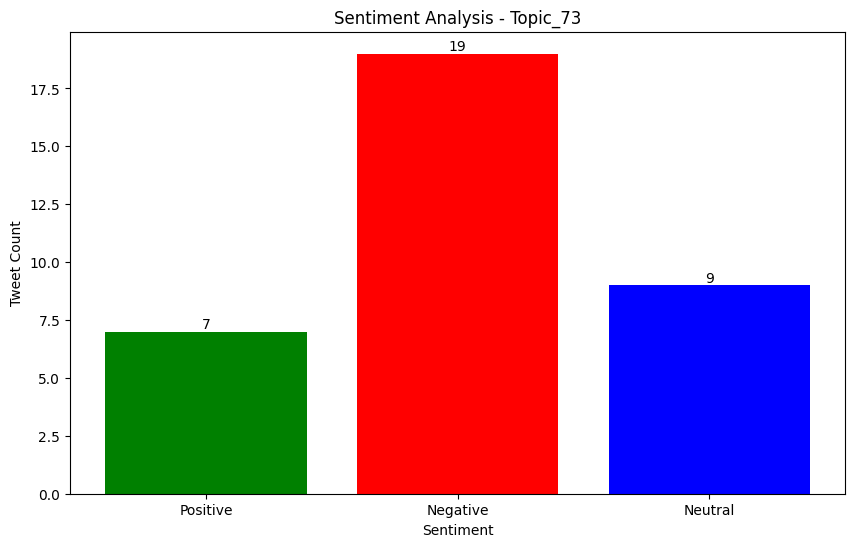

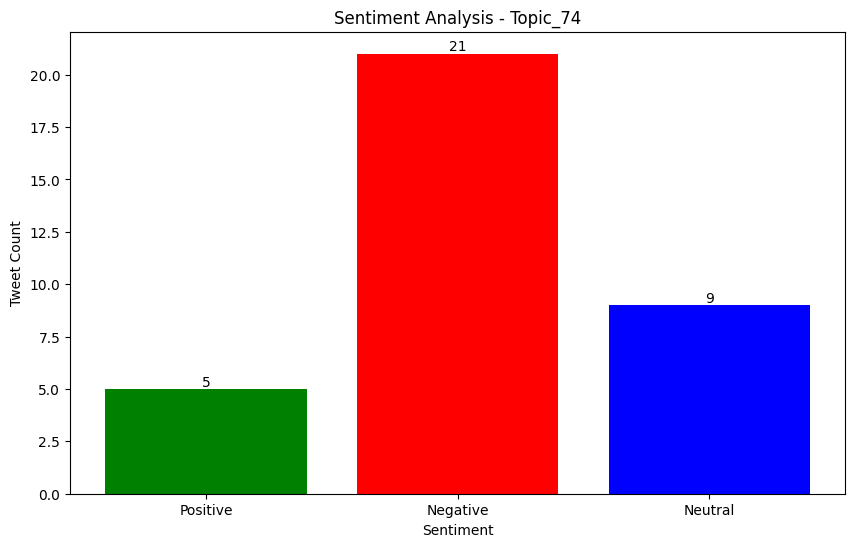

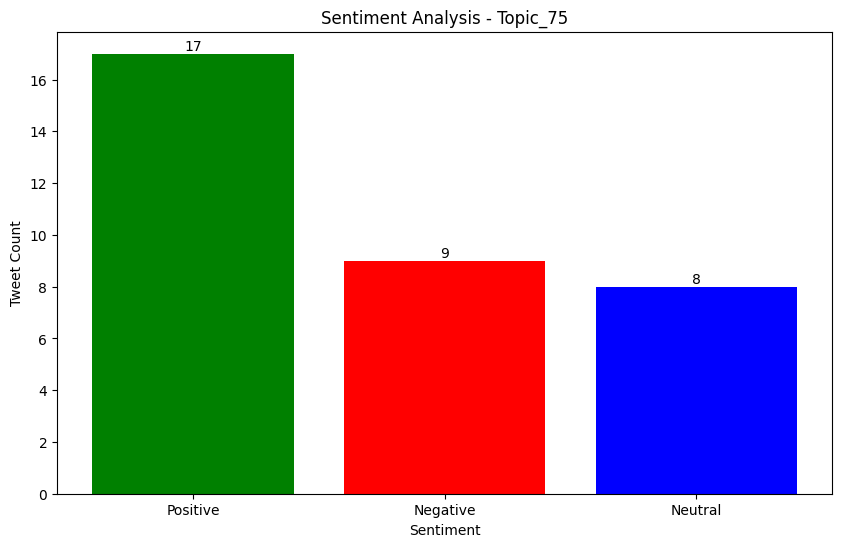

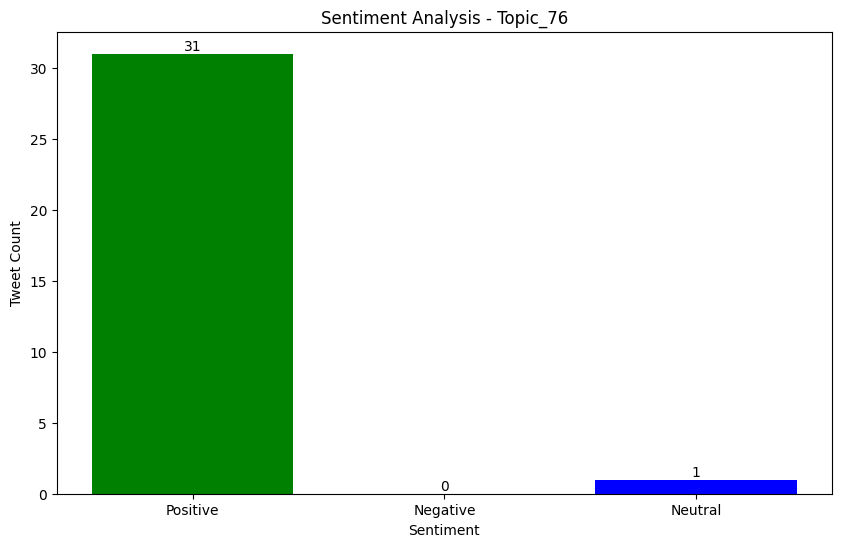

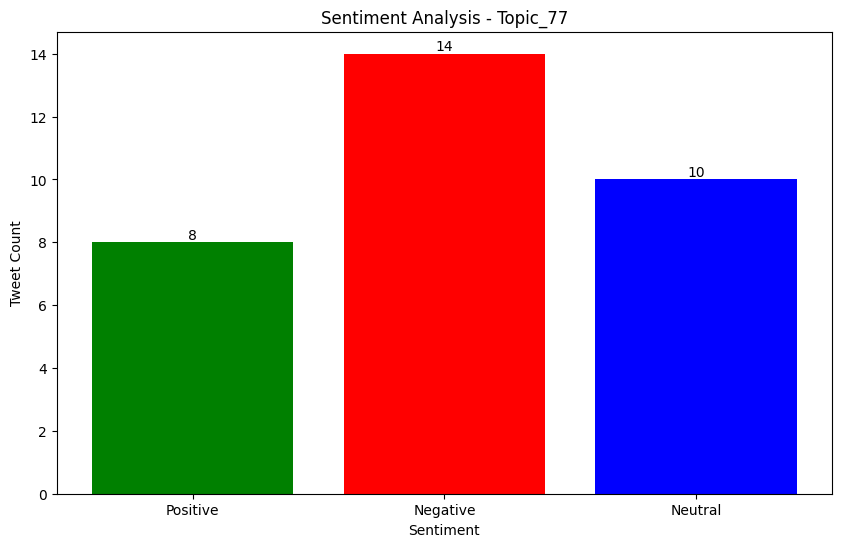

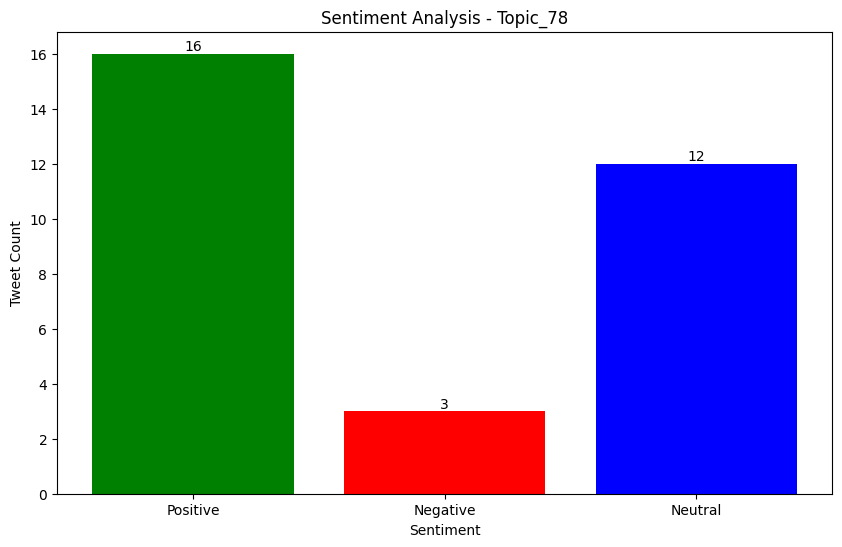

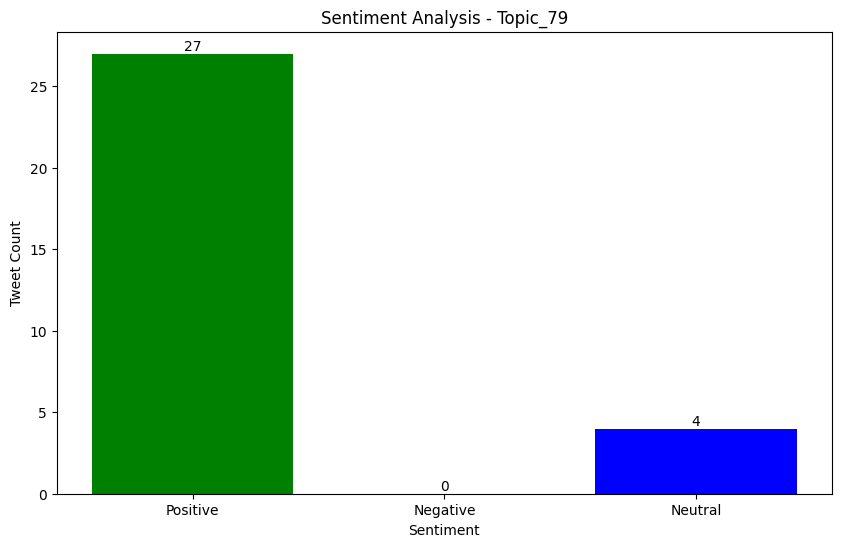

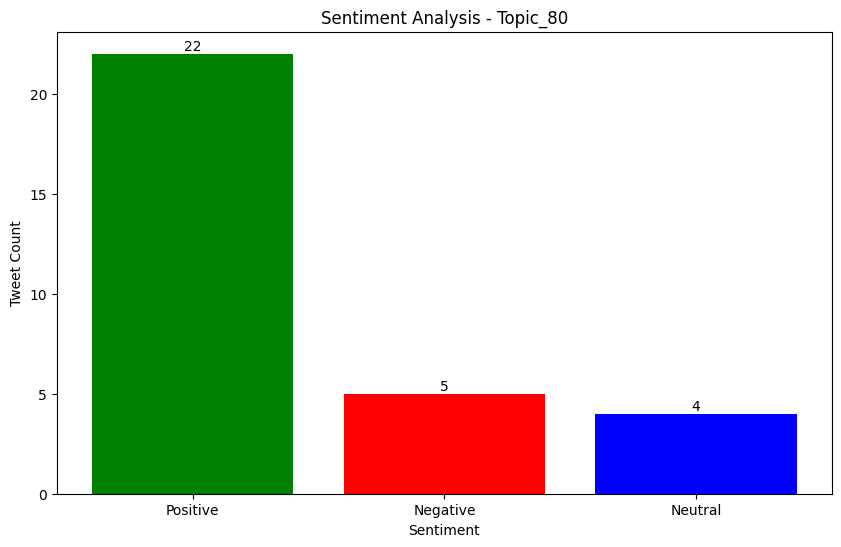

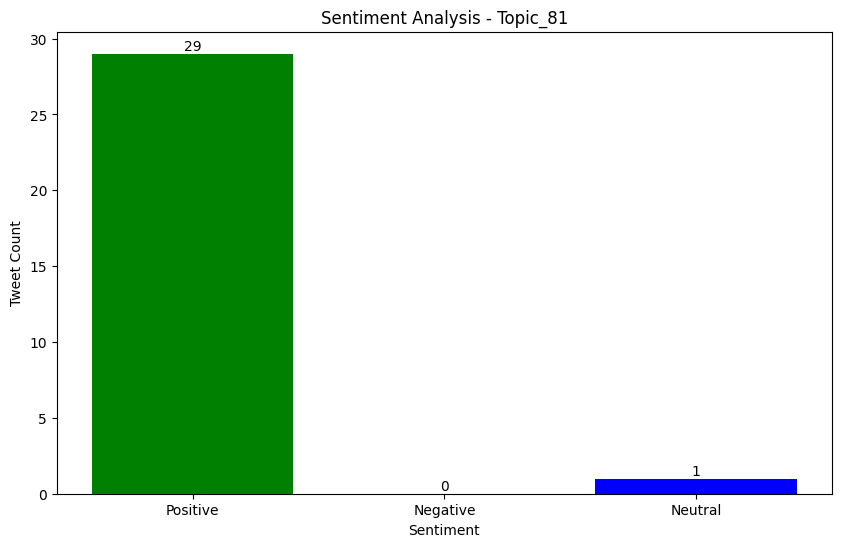

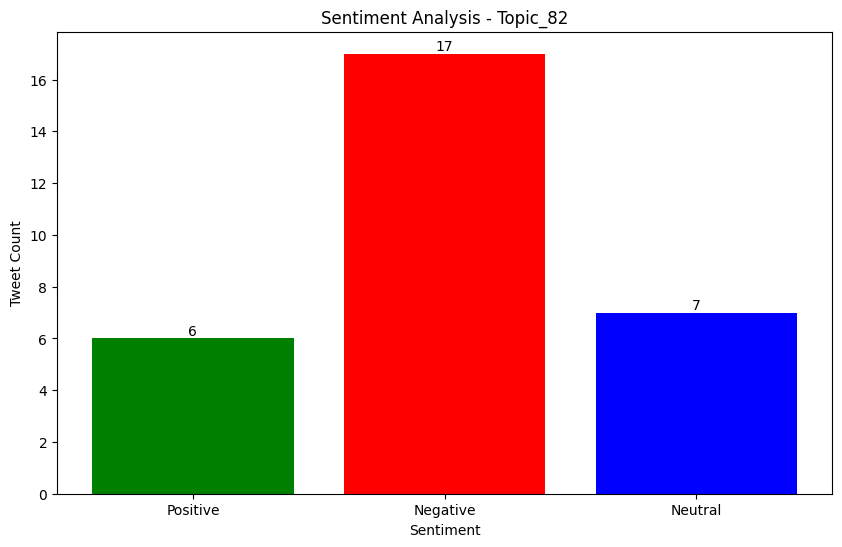

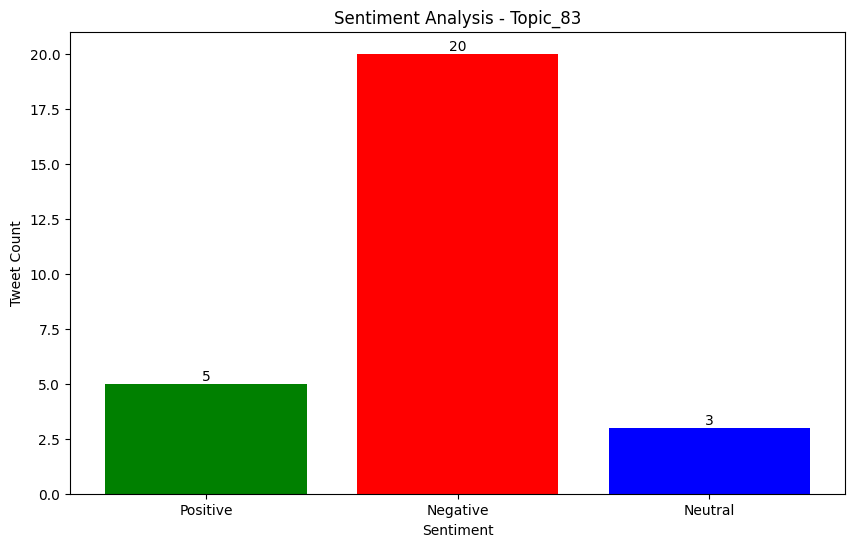

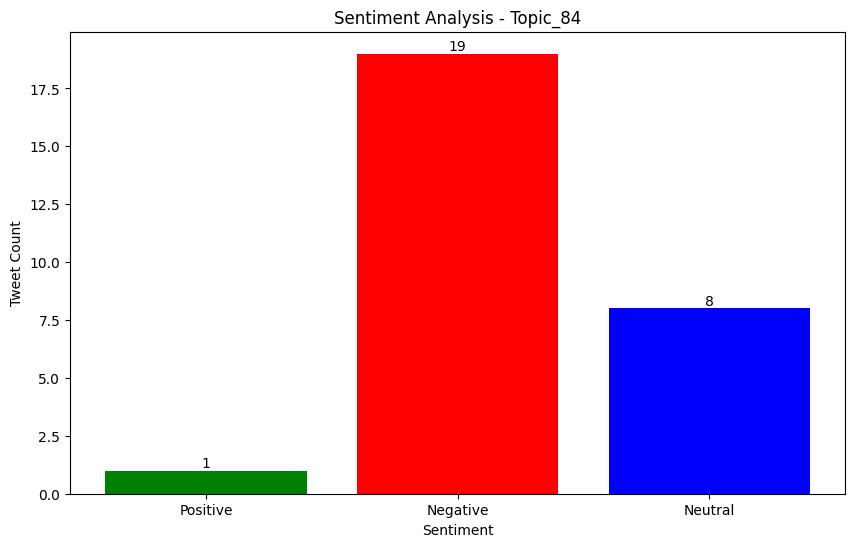

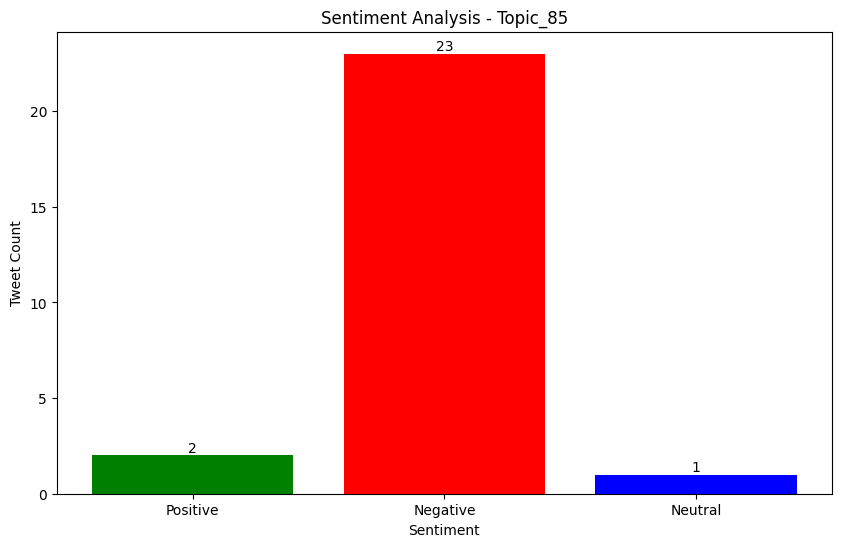

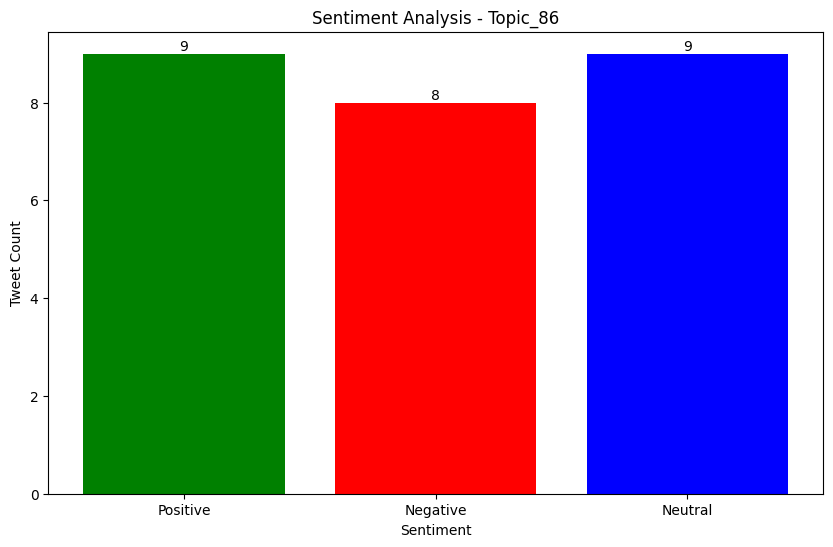

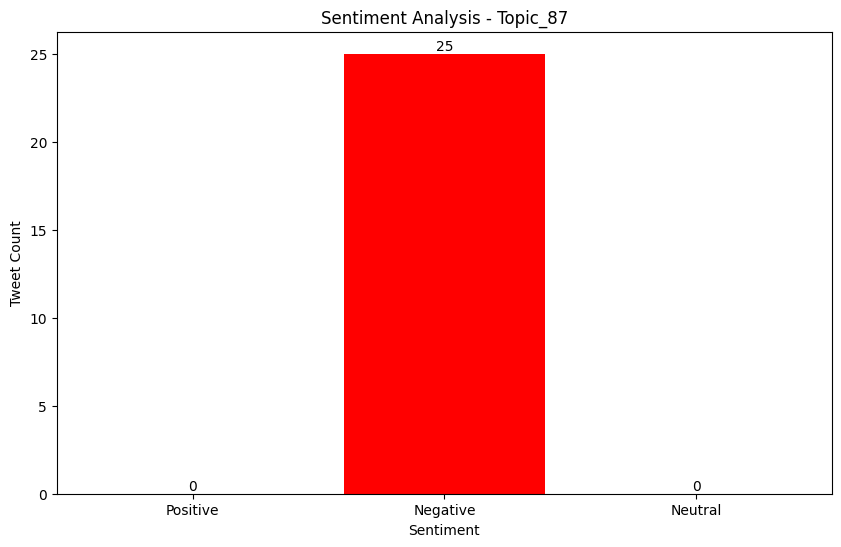

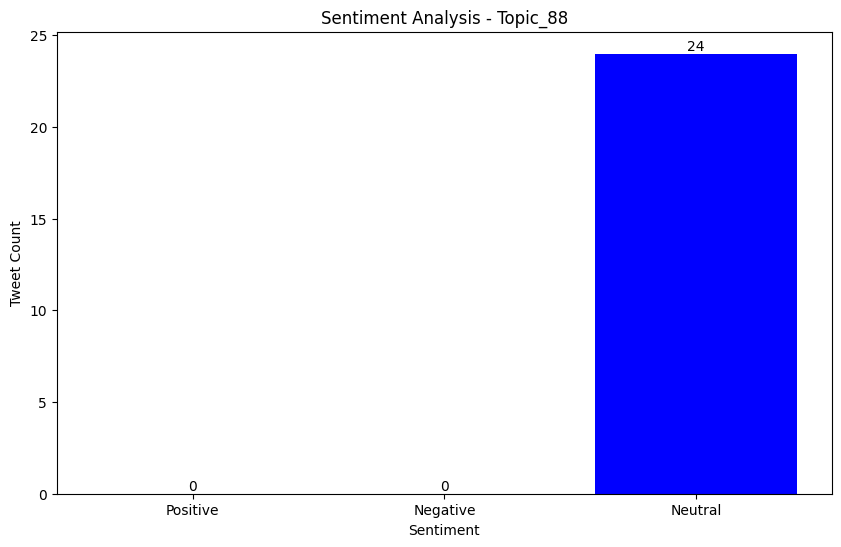

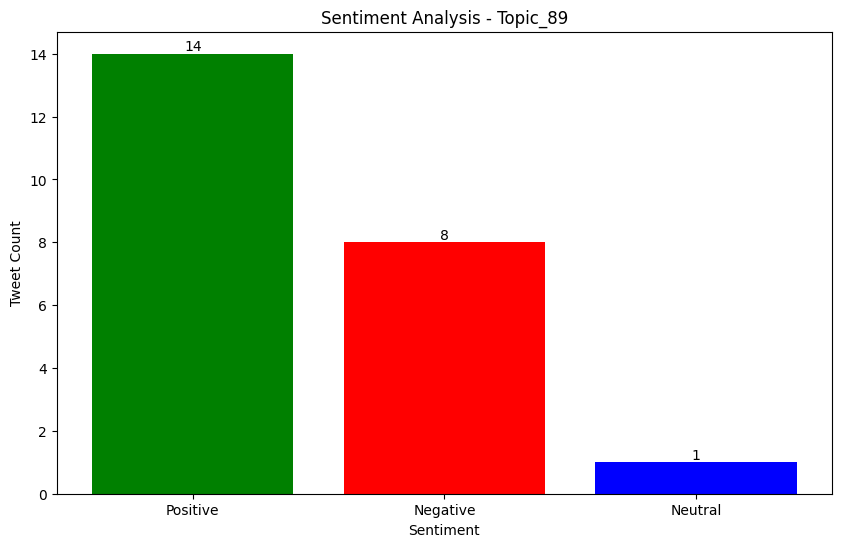

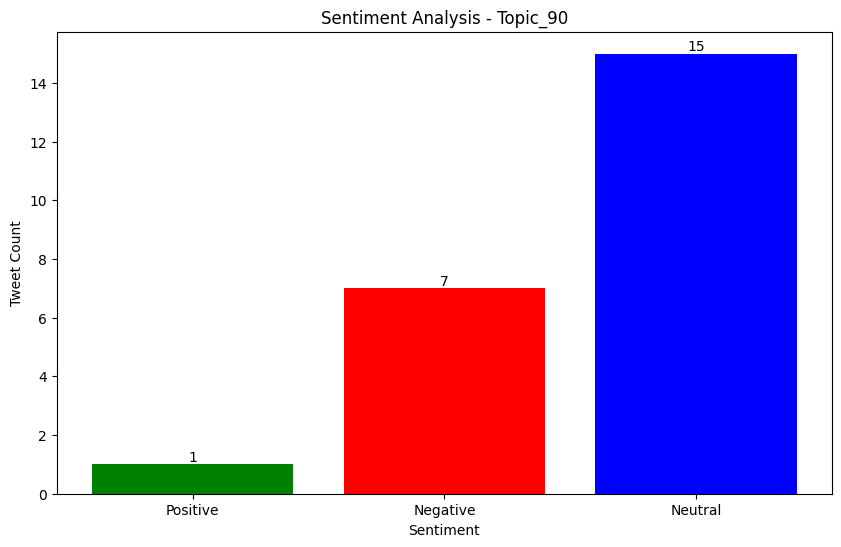

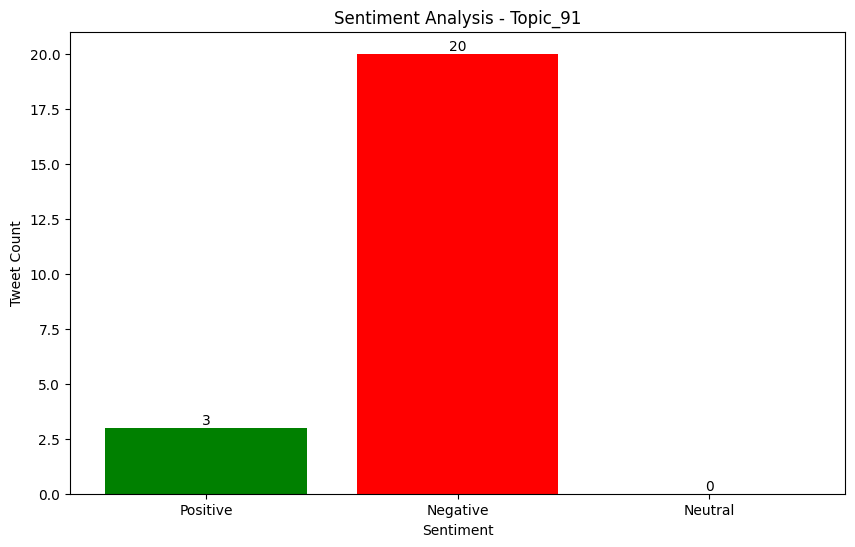

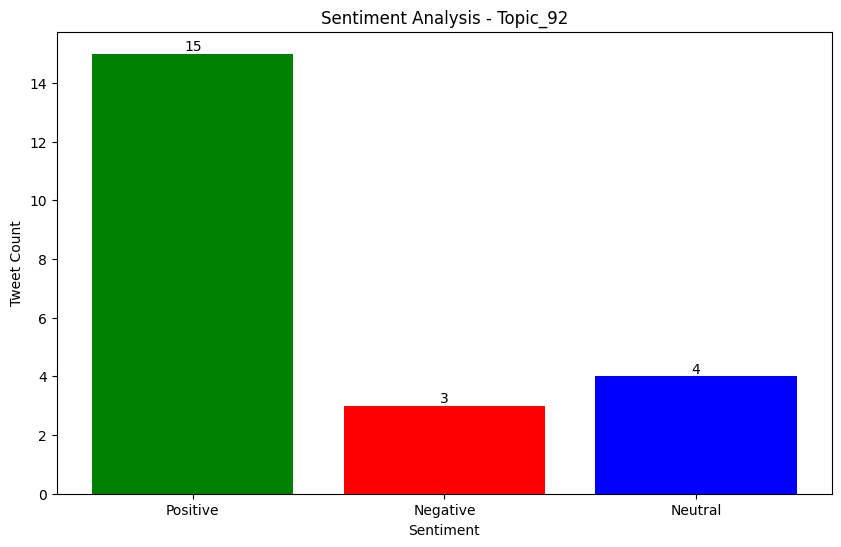

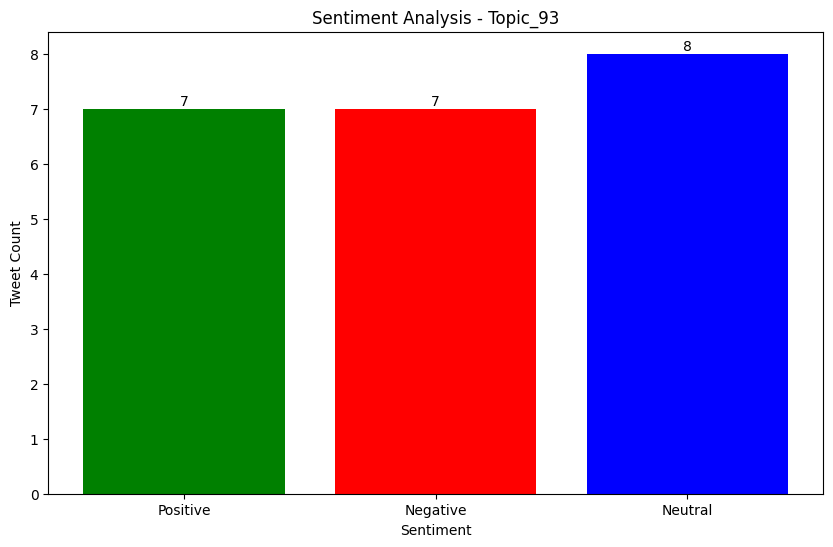

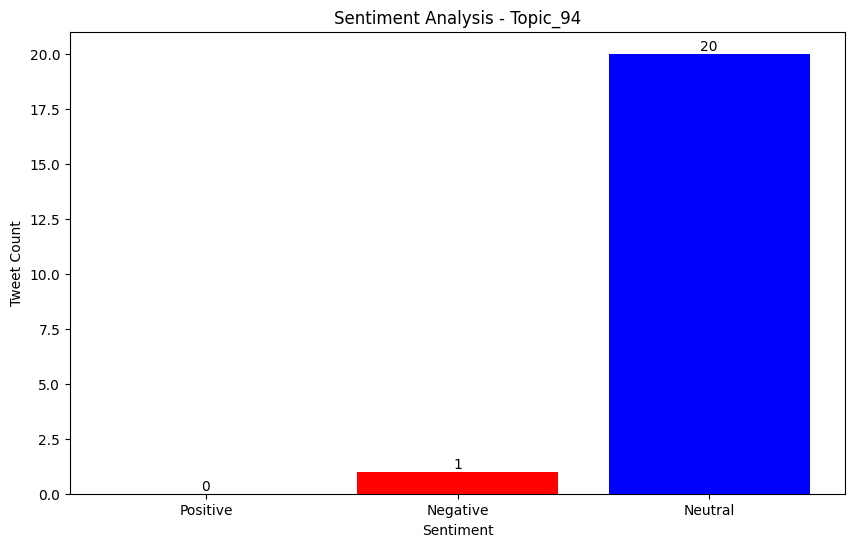

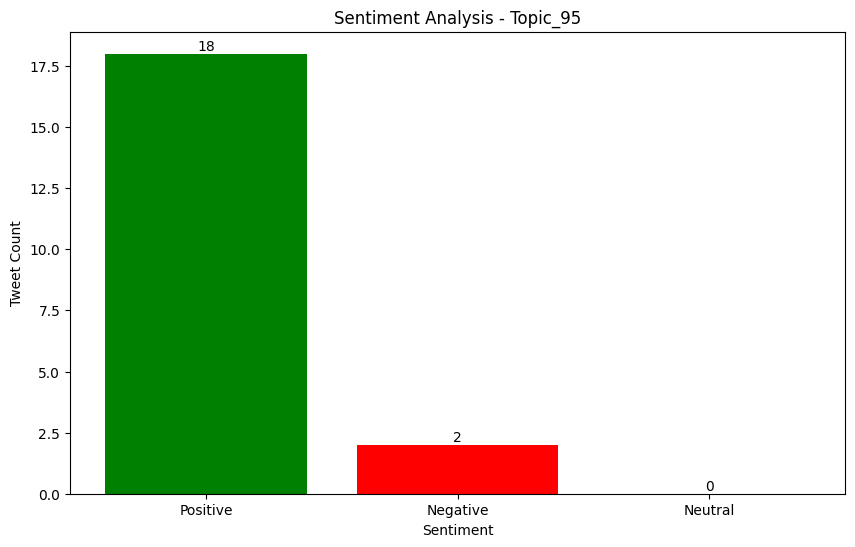

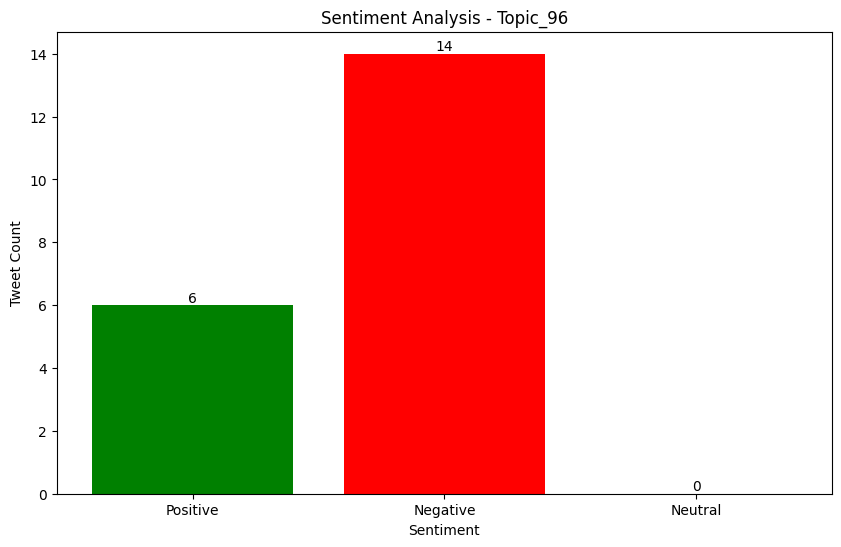

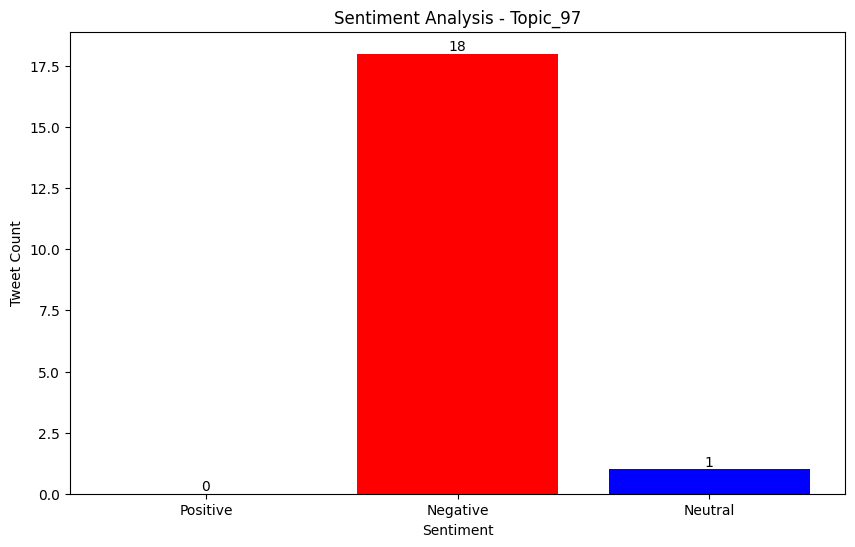

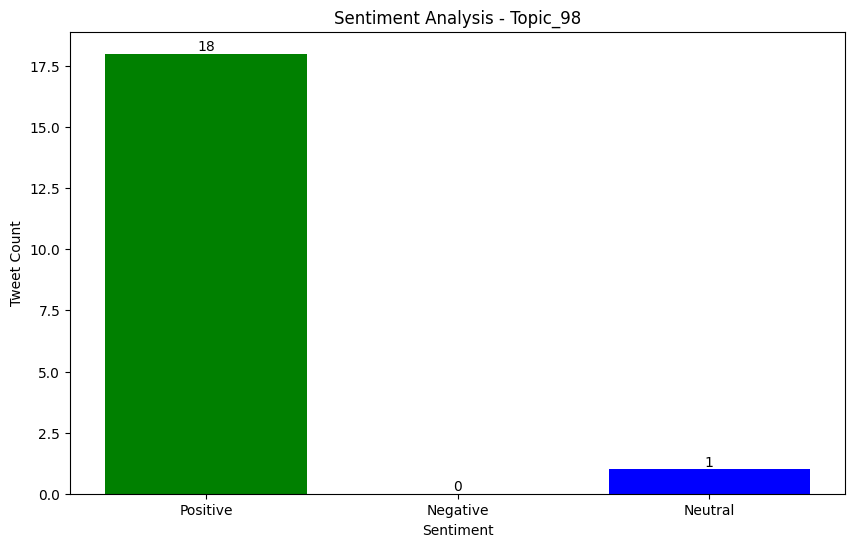

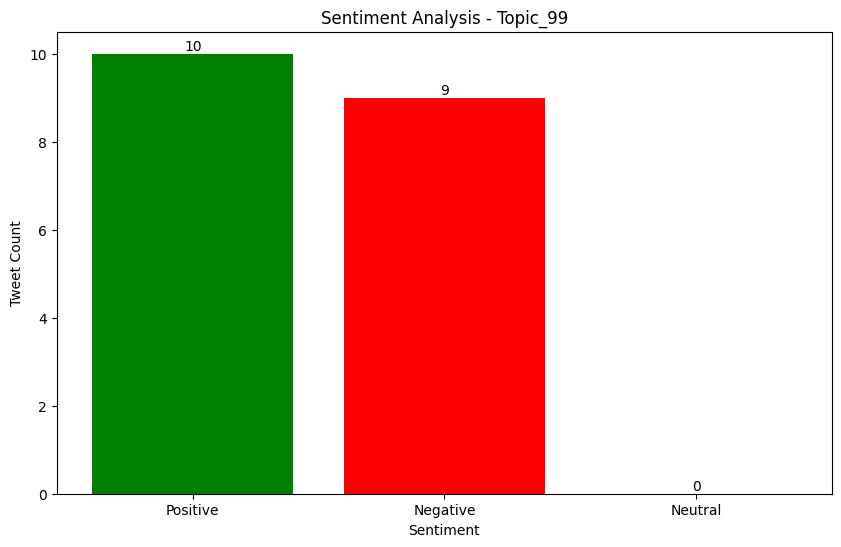

In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the VADER sentiment analyzer from NLTK
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/tweets_by_topics.xlsx', sheet_name=None)

# Perform sentiment analysis for each sheet and plot bar chart for each topic
for sheet_name, sheet_data in df.items():
    # Access the text column in the current sheet
    text_column = sheet_data['text']

    # Apply sentiment analysis to each text entry
    sentiment_scores = text_column.apply(lambda x: sia.polarity_scores(x))

    # Count the number of positive, negative, and neutral tweets
    positive_count = len([score for score in sentiment_scores if score['compound'] > 0])
    negative_count = len([score for score in sentiment_scores if score['compound'] < 0])
    neutral_count = len([score for score in sentiment_scores if score['compound'] == 0])

    # Plot bar chart for positive, negative, and neutral tweet counts
    plt.figure(figsize=(10, 6))

    # Set the positions of the bars on the x-axis
    bar_positions = [1, 2, 3]
    bar_heights = [positive_count, negative_count, neutral_count]
    bar_labels = ['Positive', 'Negative', 'Neutral']
    bar_colors = ['green', 'red', 'blue']

    # Plot the bars for positive, negative, and neutral tweet counts
    plt.bar(bar_positions, bar_heights, tick_label=bar_labels, color=bar_colors)

    # Add count labels to the bars
    for i, height in enumerate(bar_heights):
        plt.text(bar_positions[i], height, str(height), ha='center', va='bottom')

    plt.xlabel('Sentiment')
    plt.ylabel('Tweet Count')
    plt.title(f'Sentiment Analysis - {sheet_name}')
    plt.show()


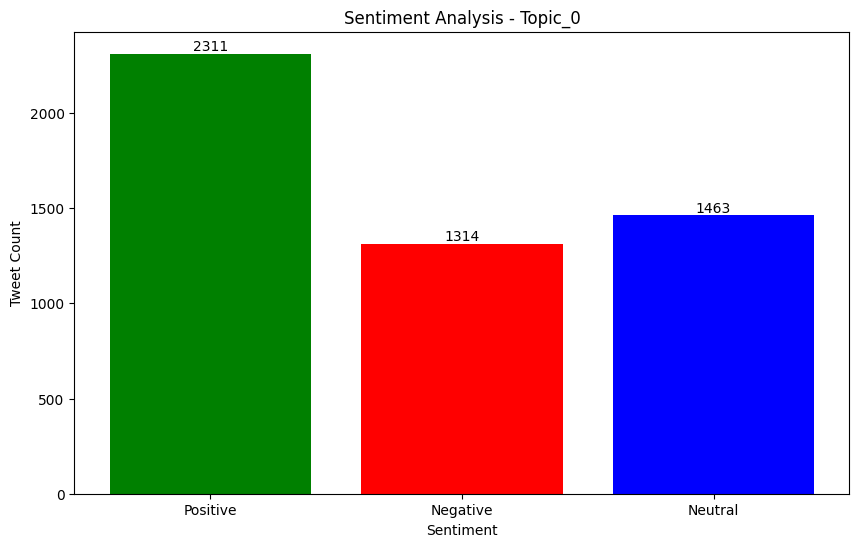

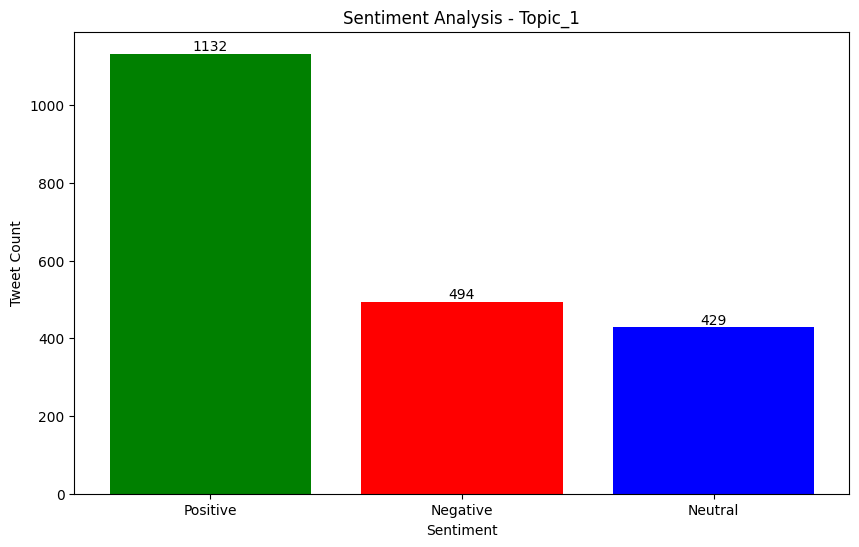

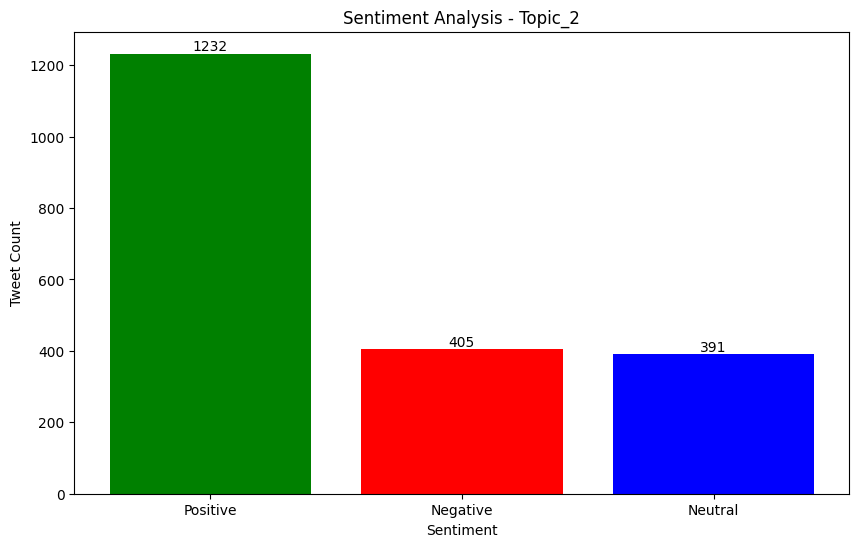

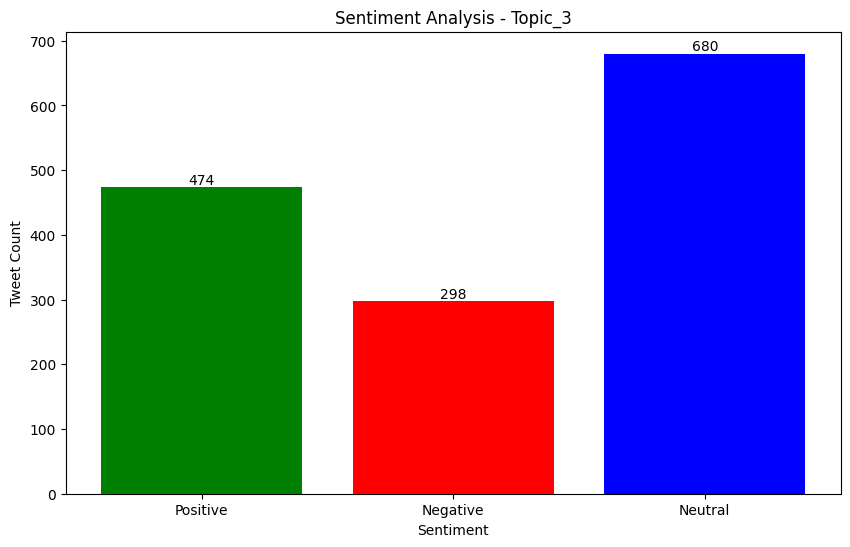

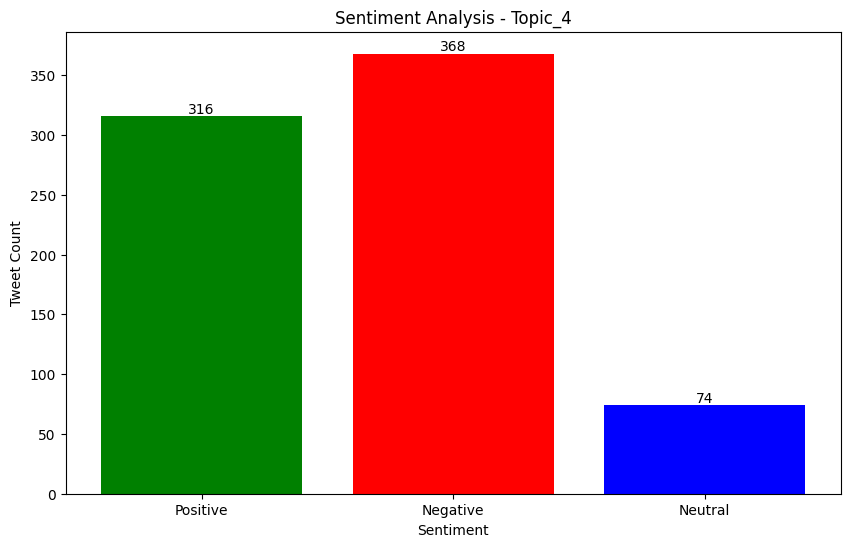

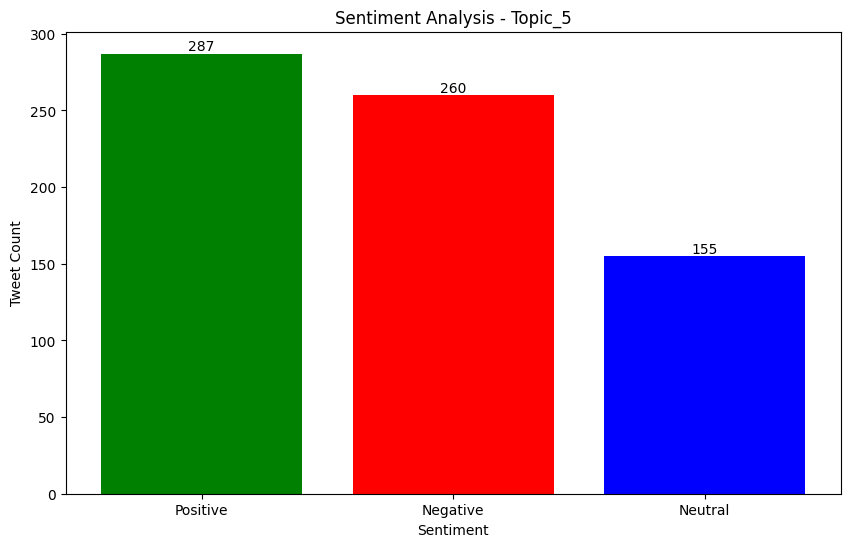

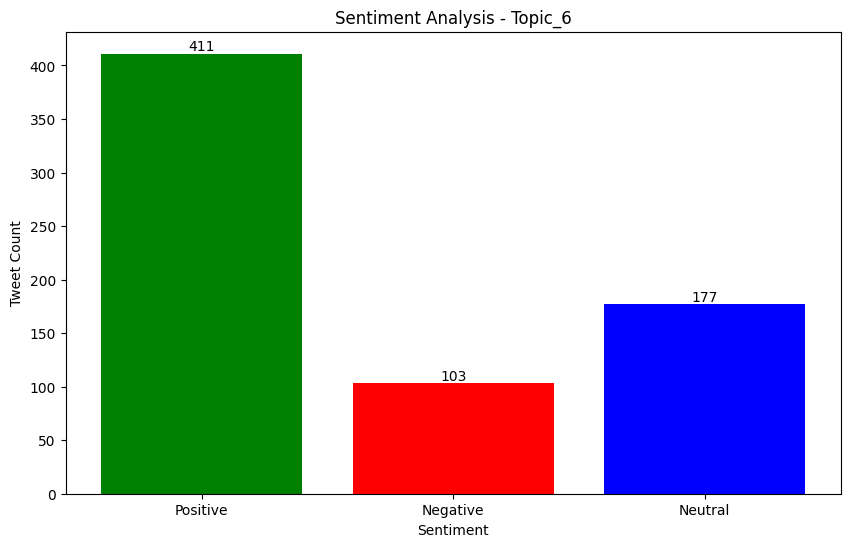

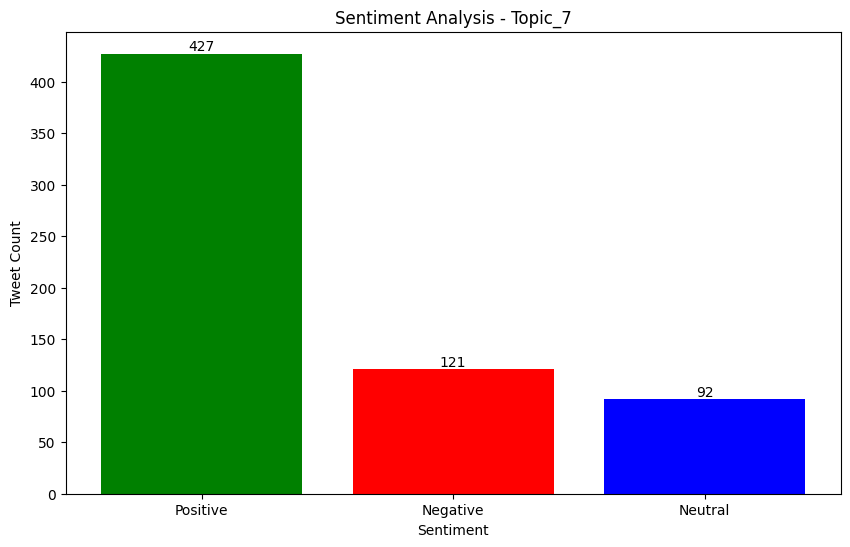

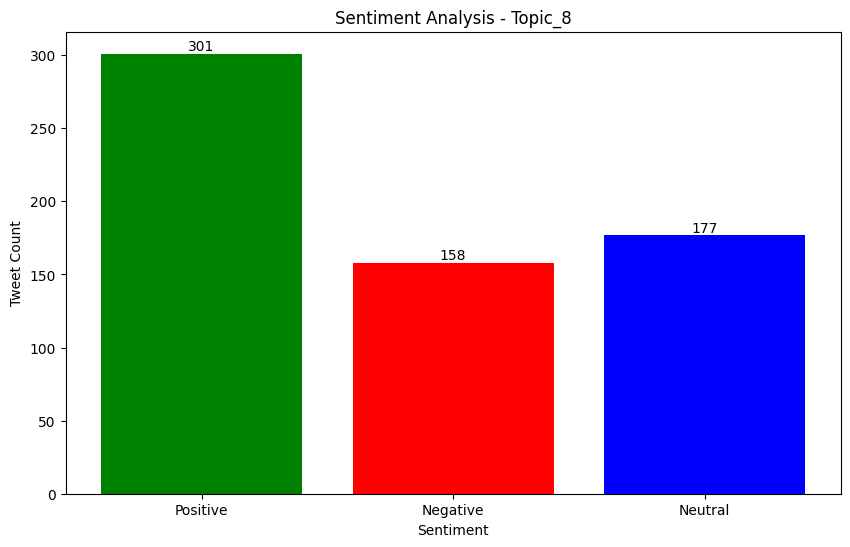

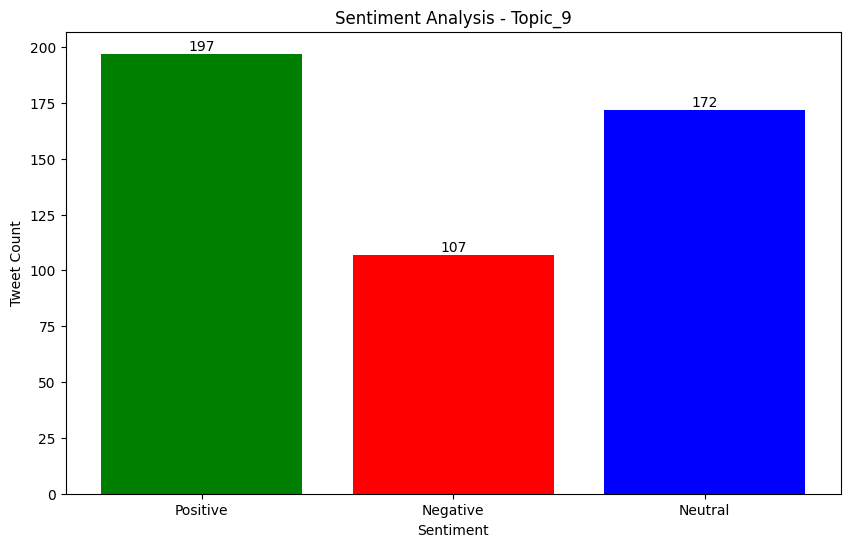

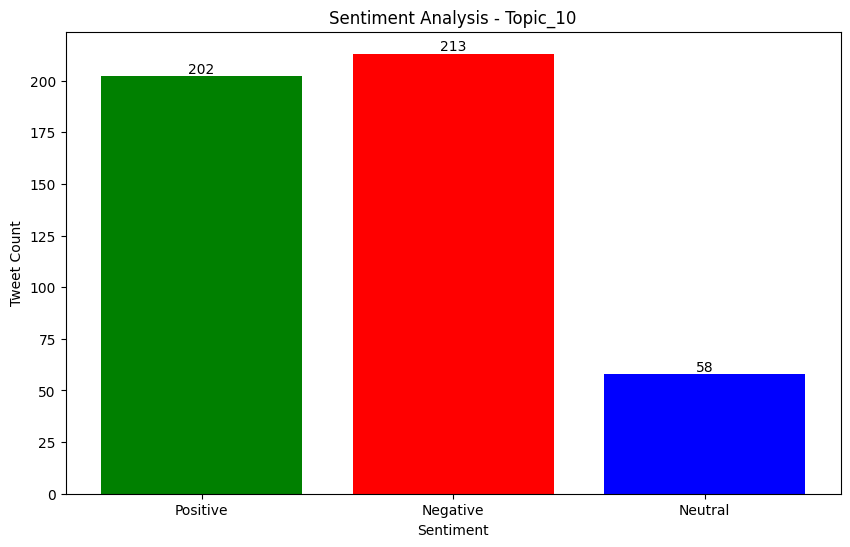

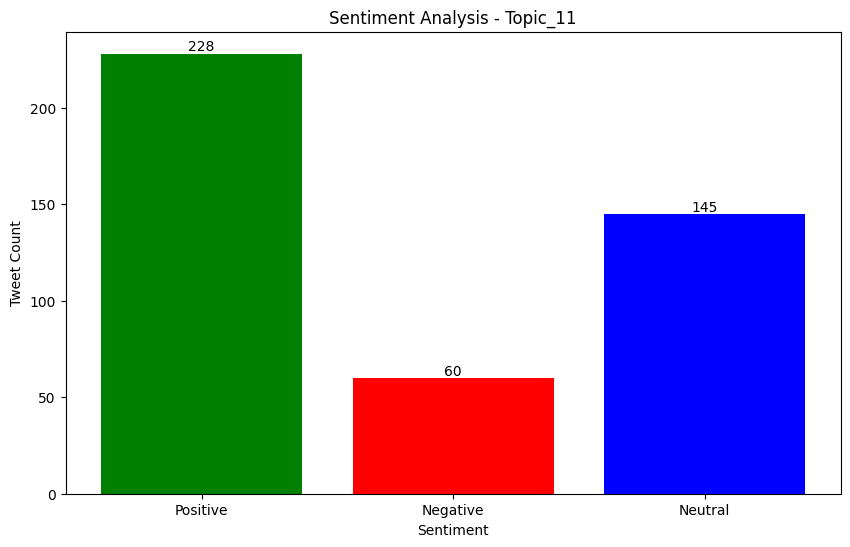

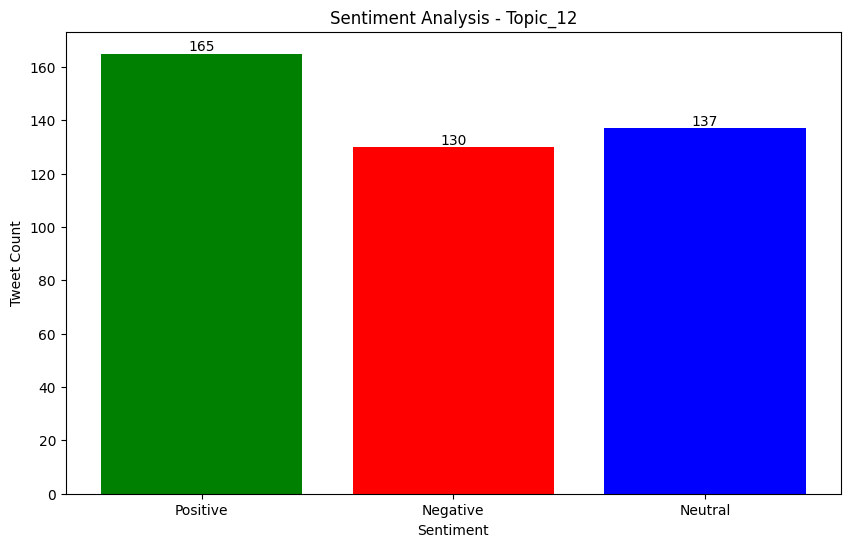

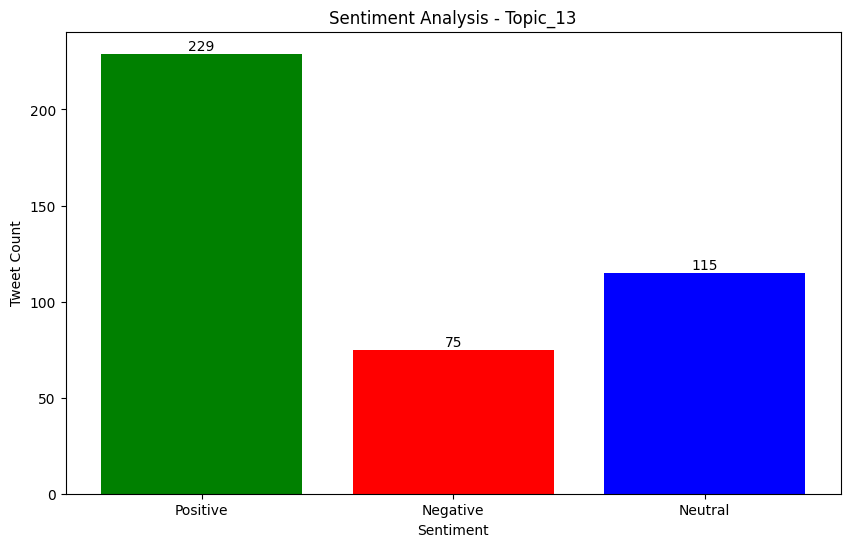

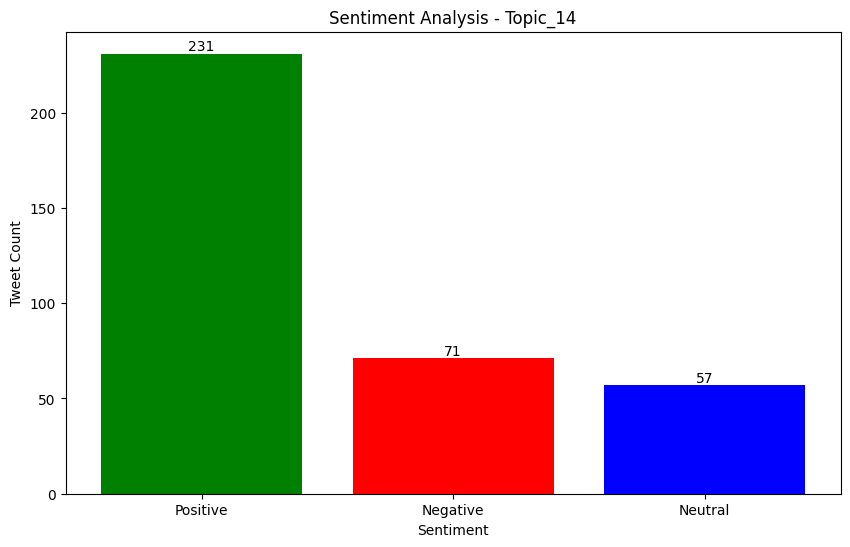

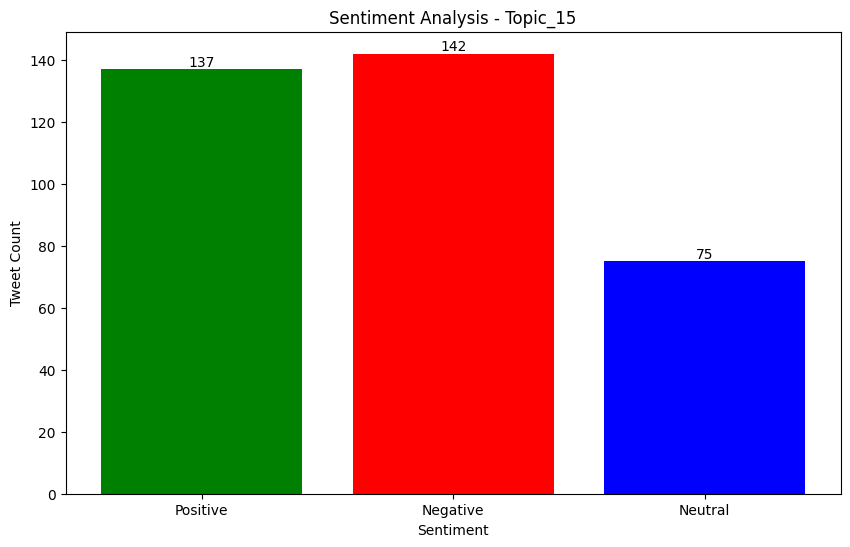

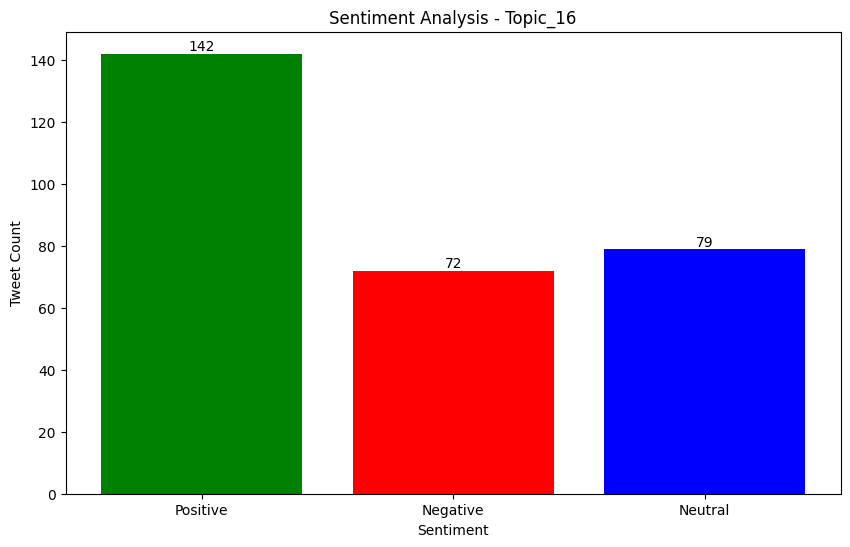

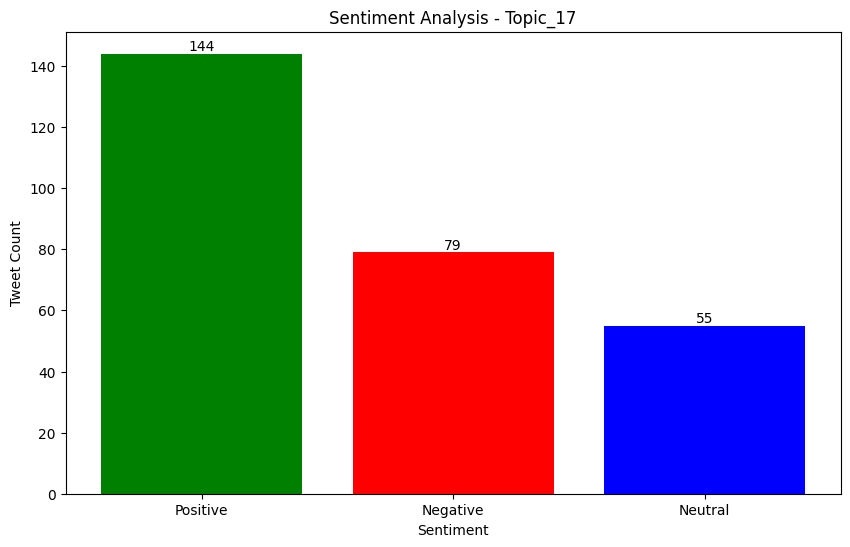

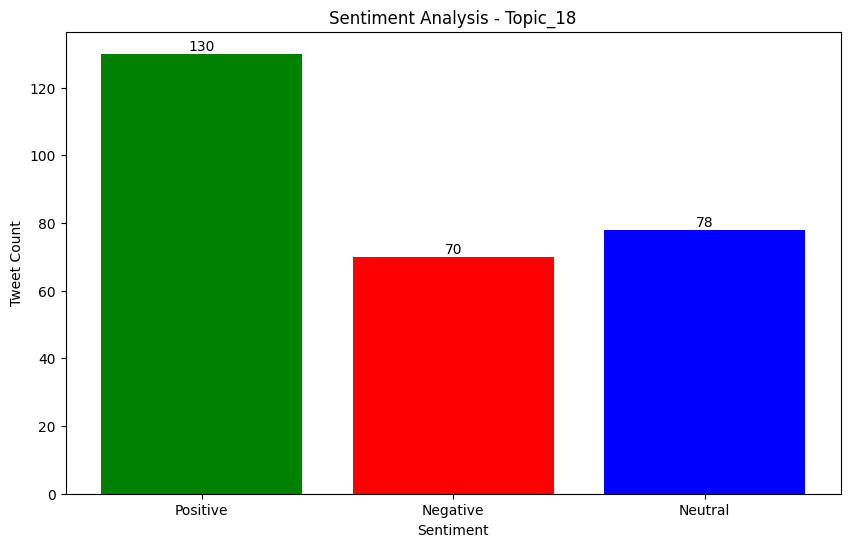

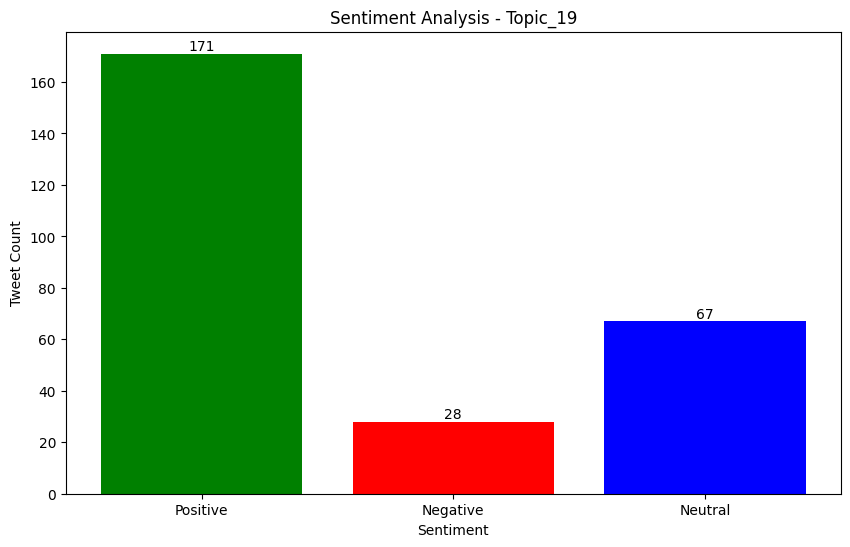

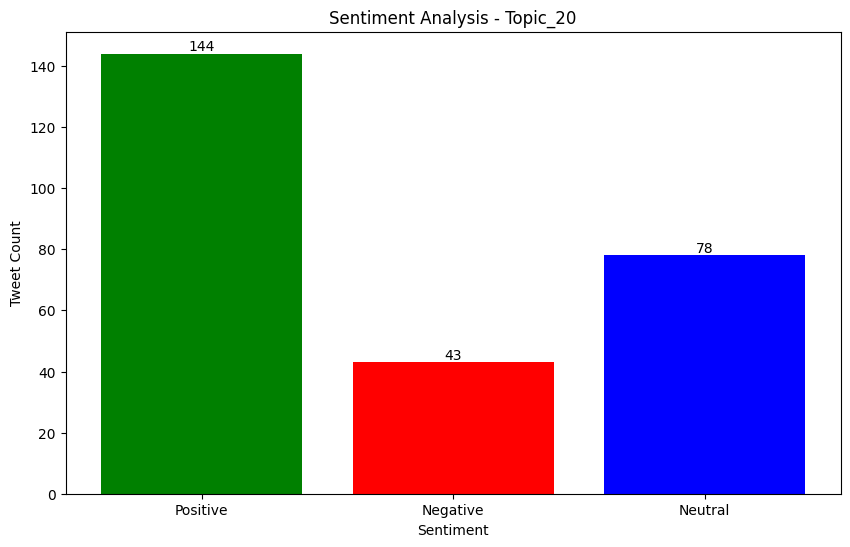

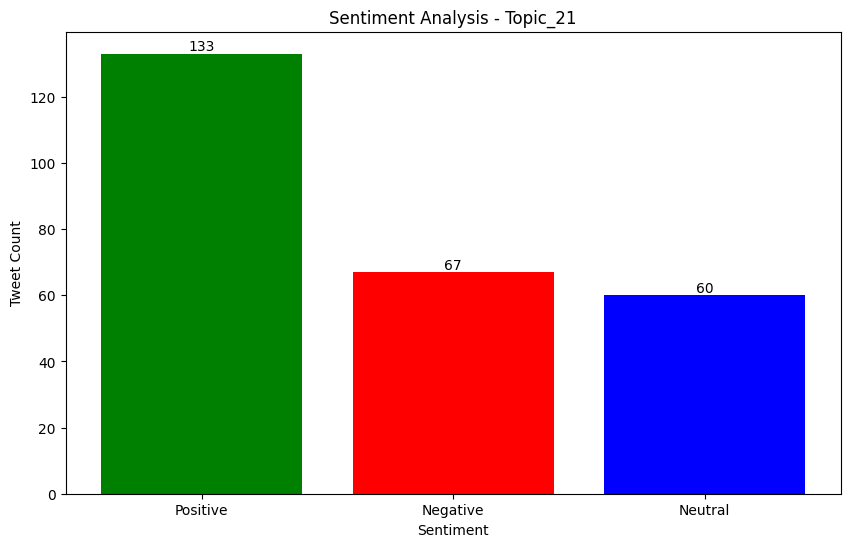

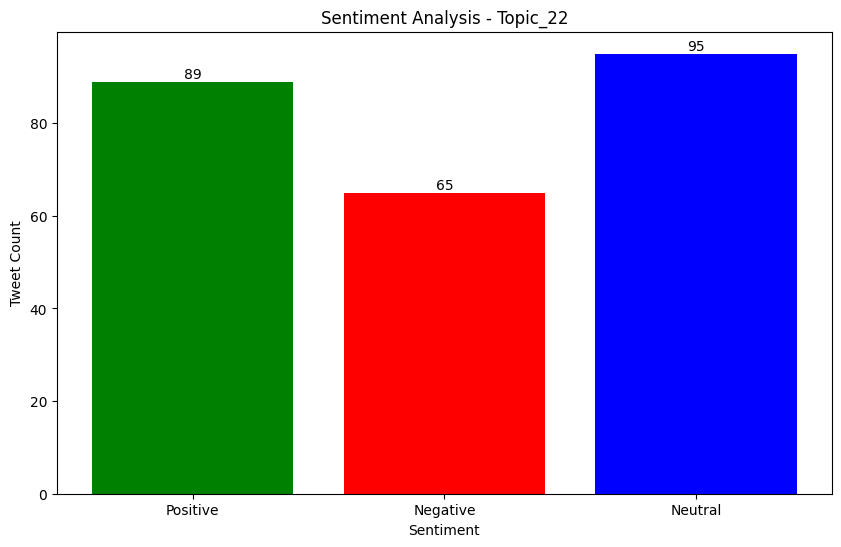

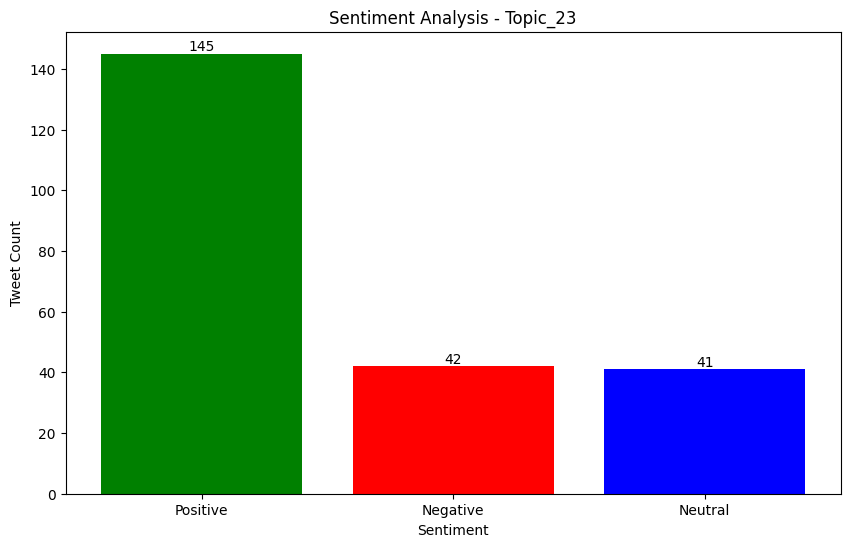

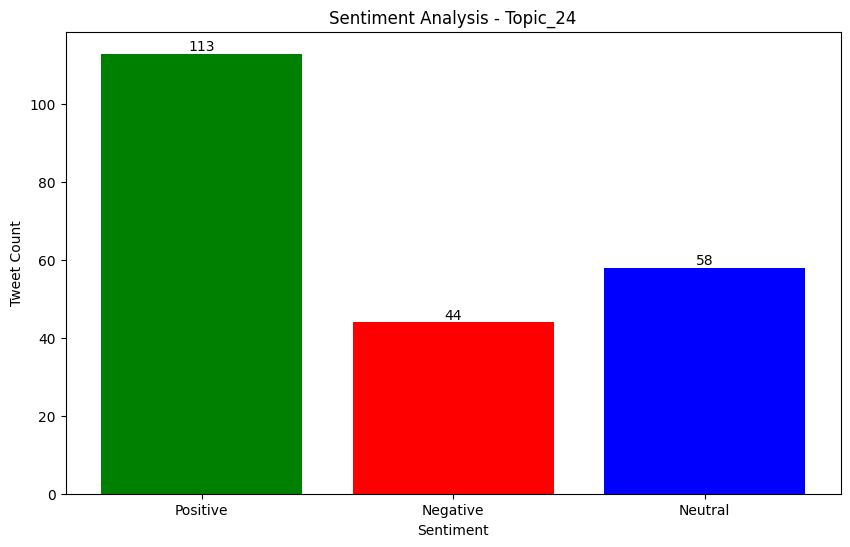

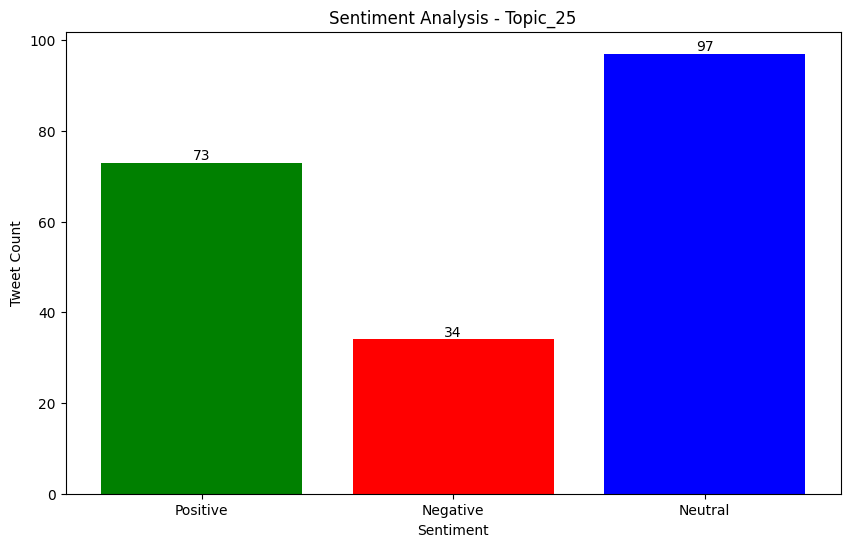

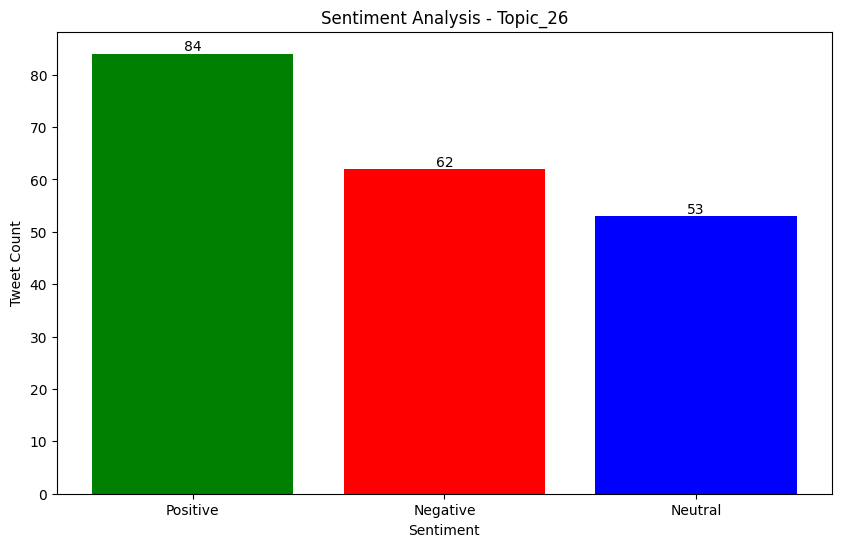

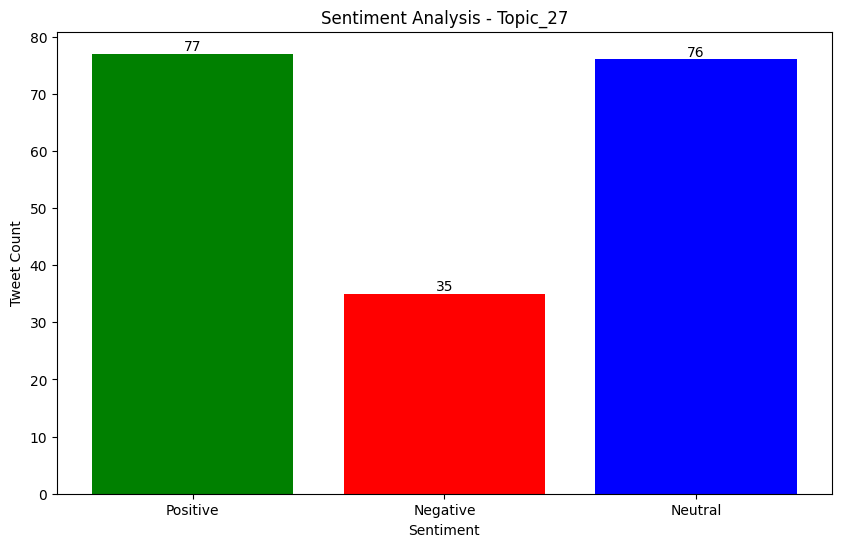

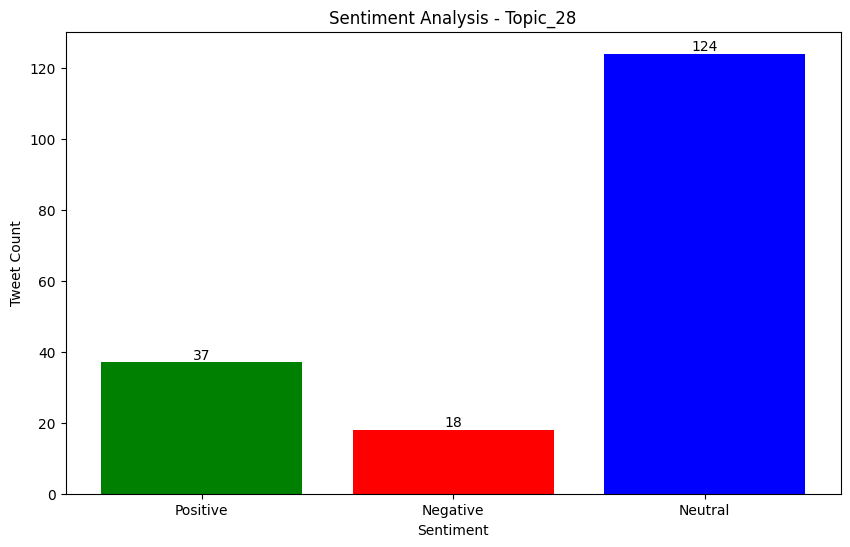

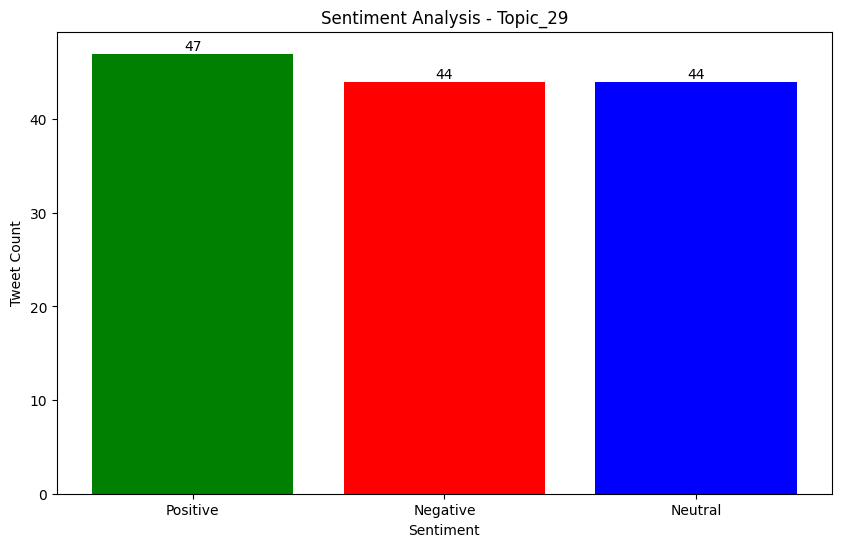

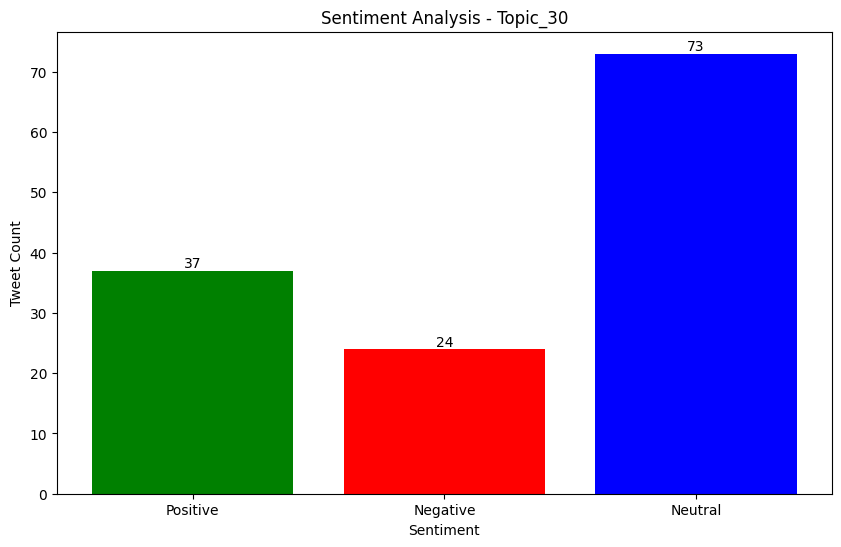

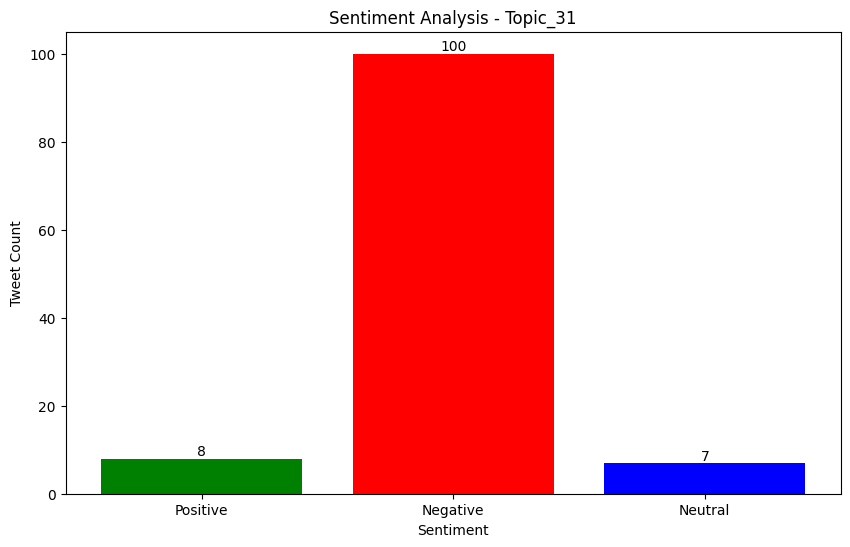

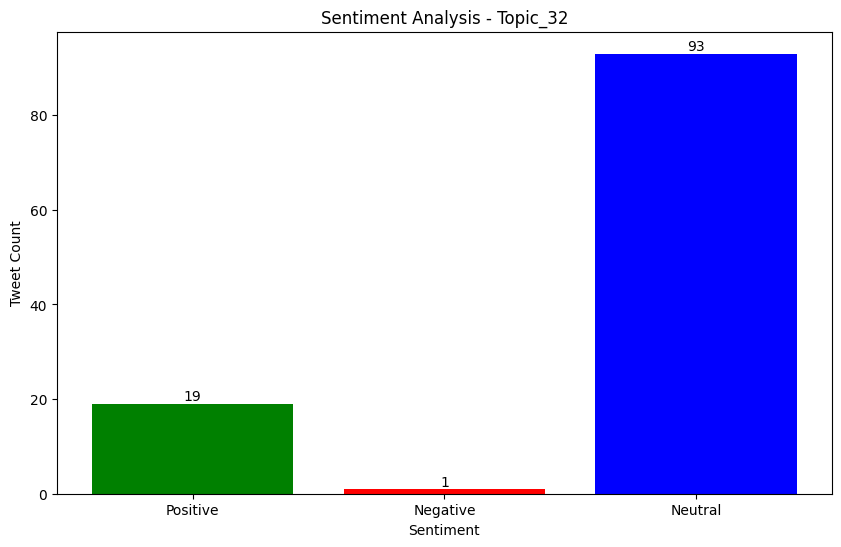

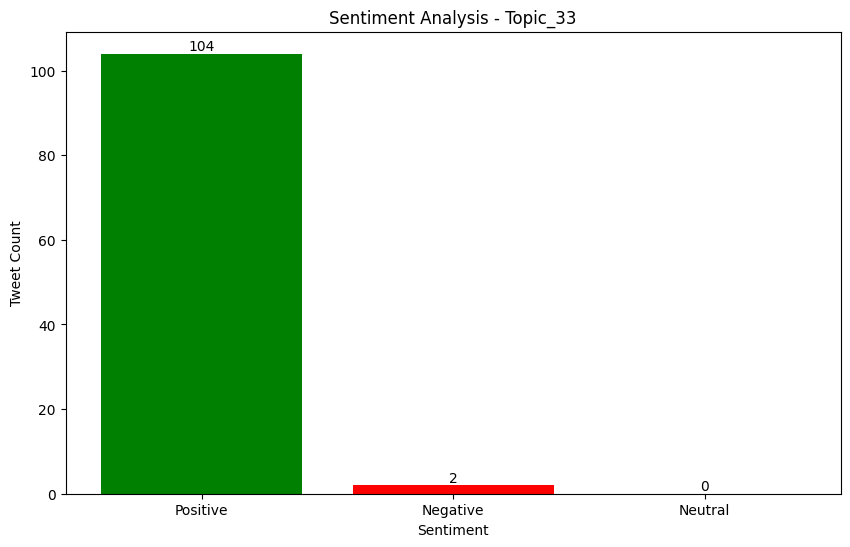

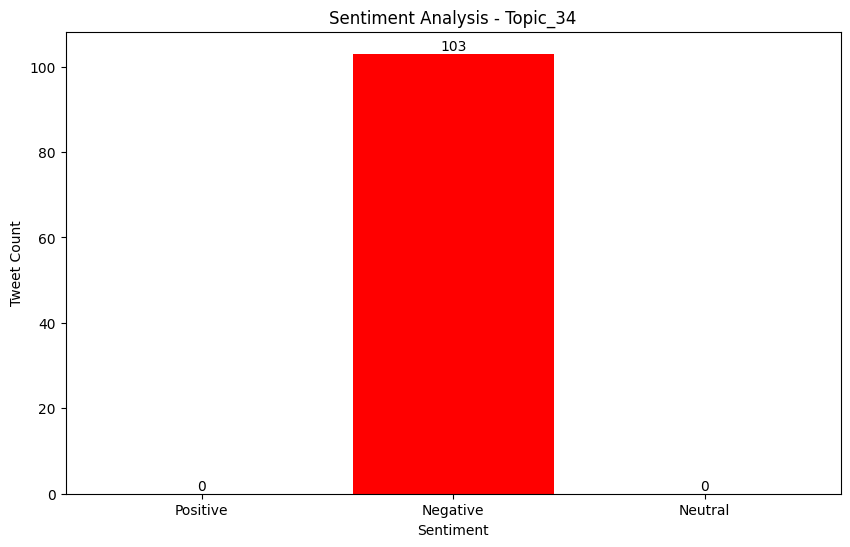

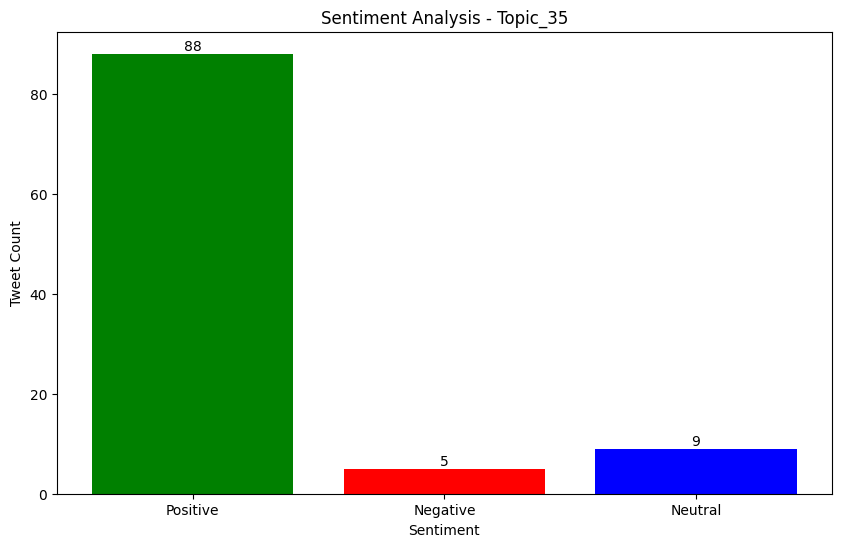

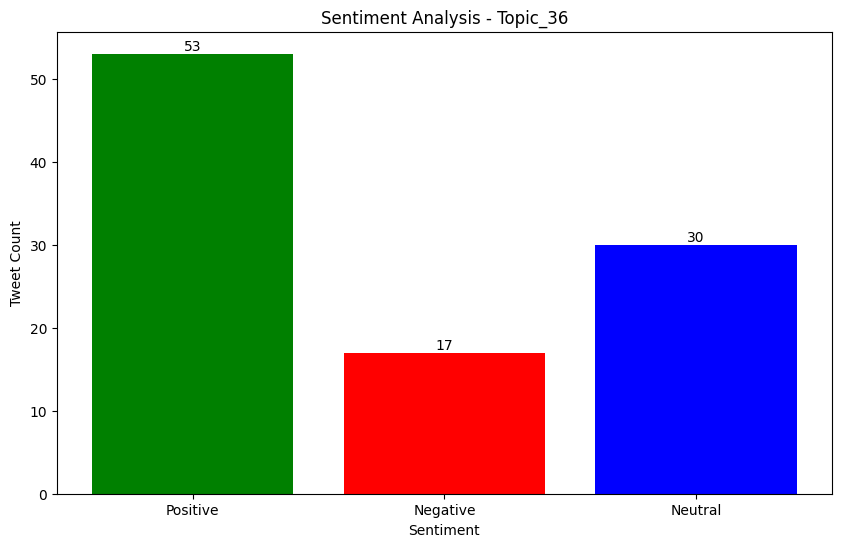

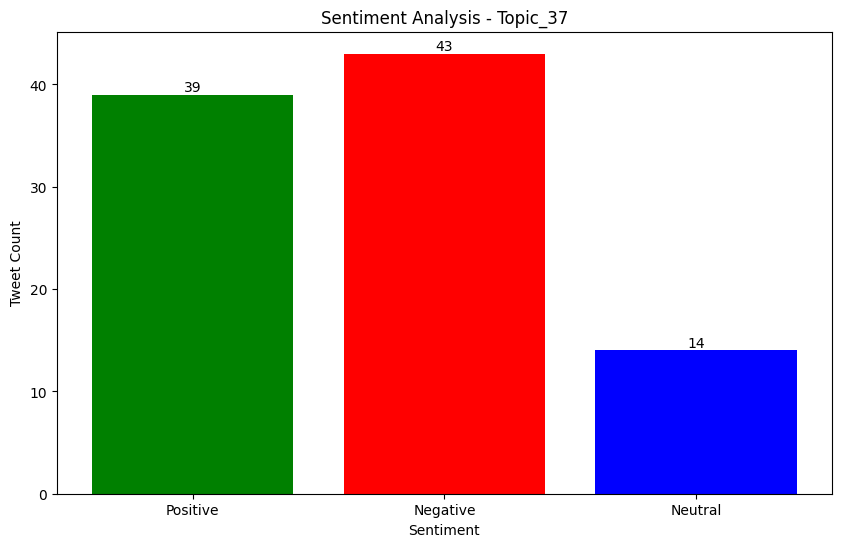

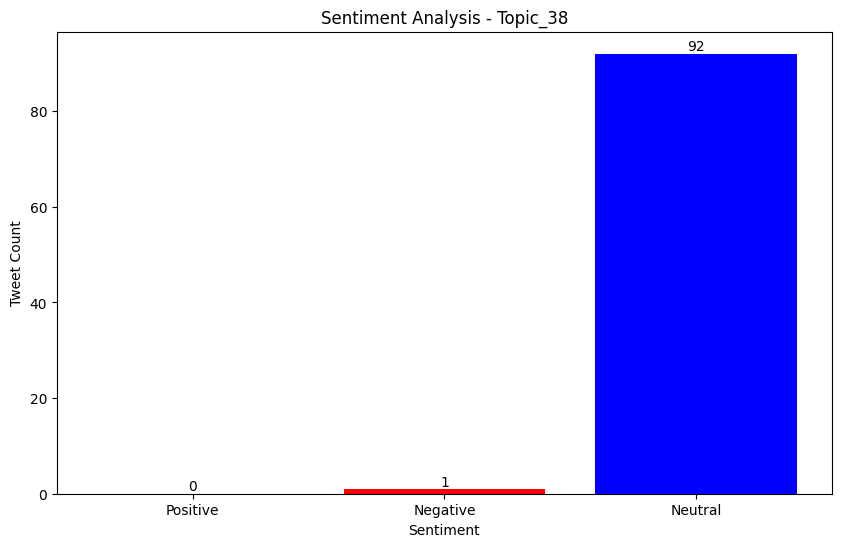

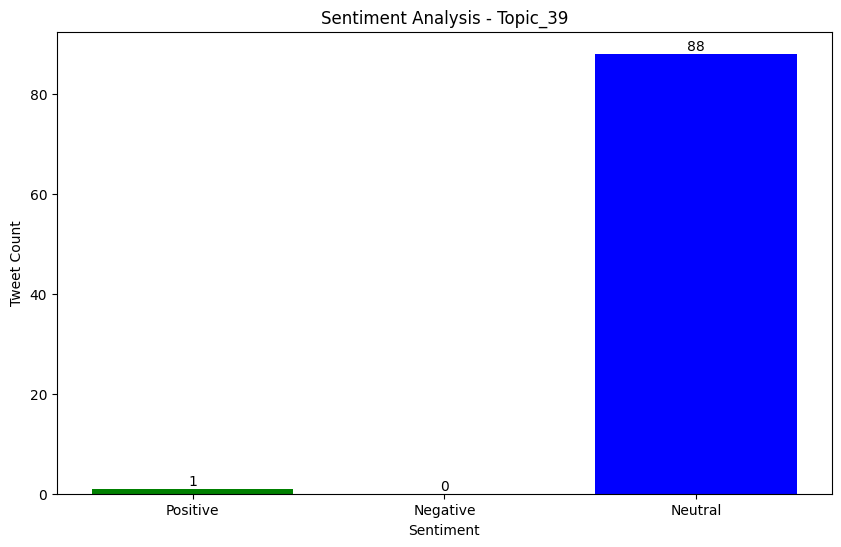

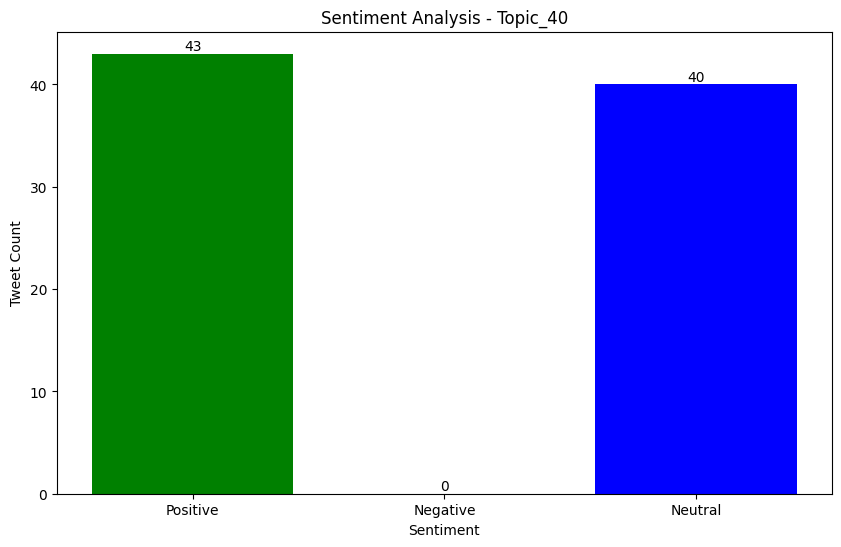

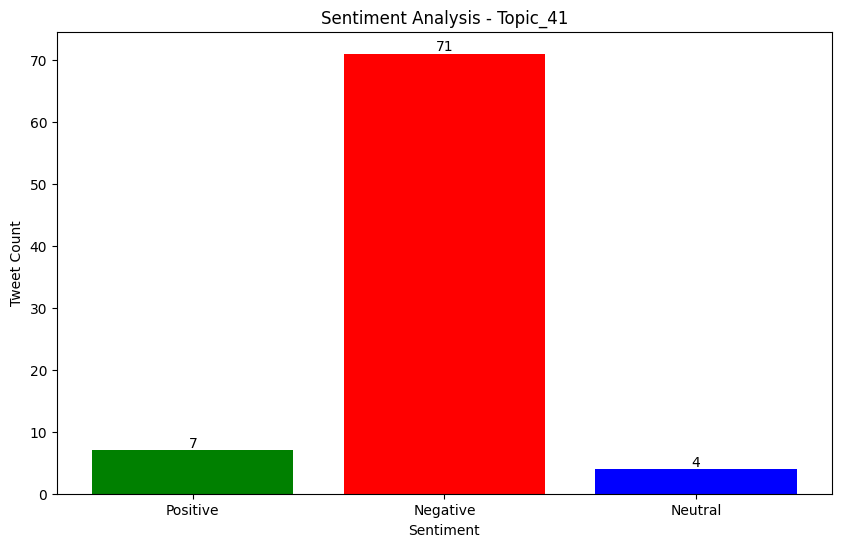

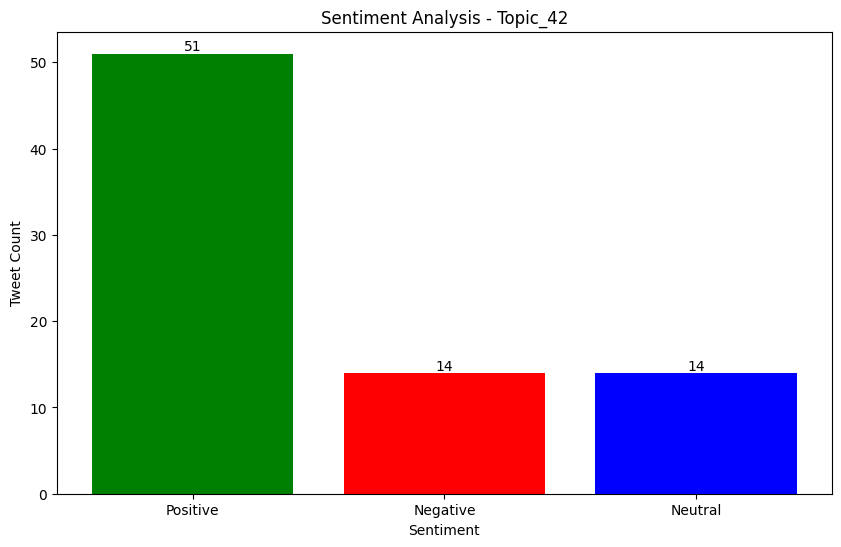

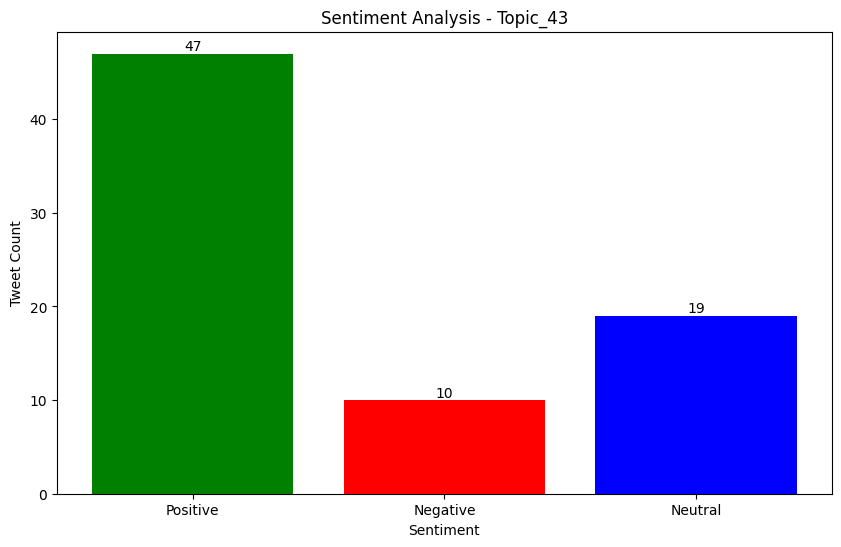

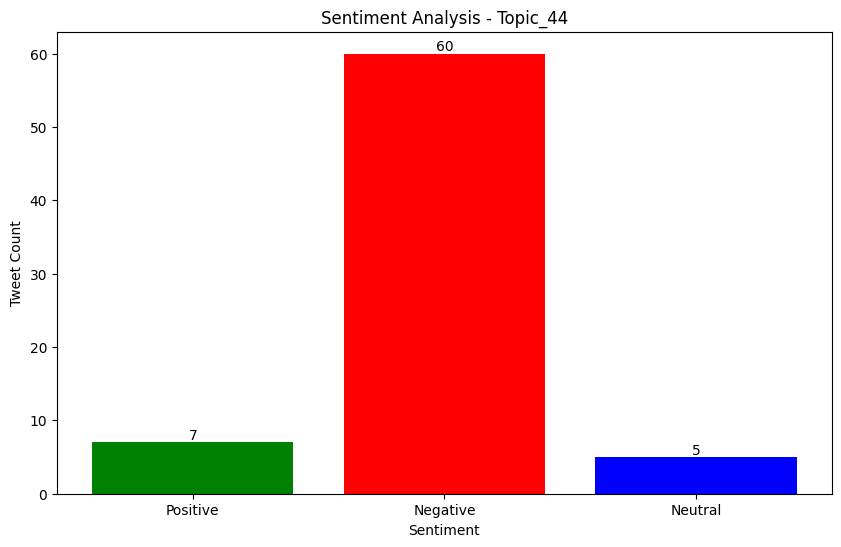

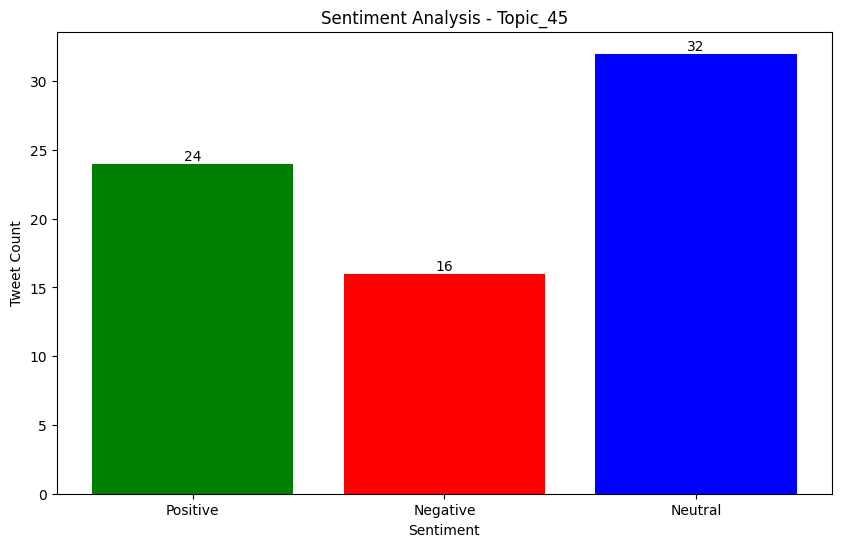

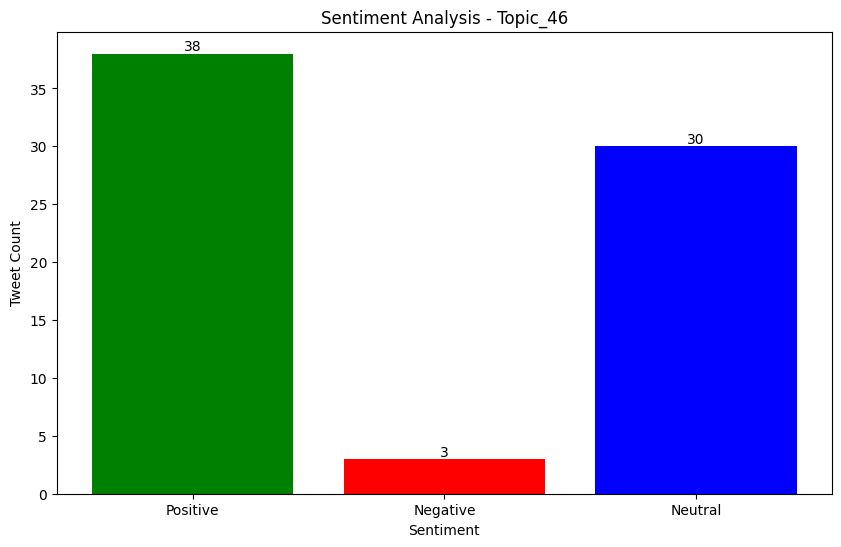

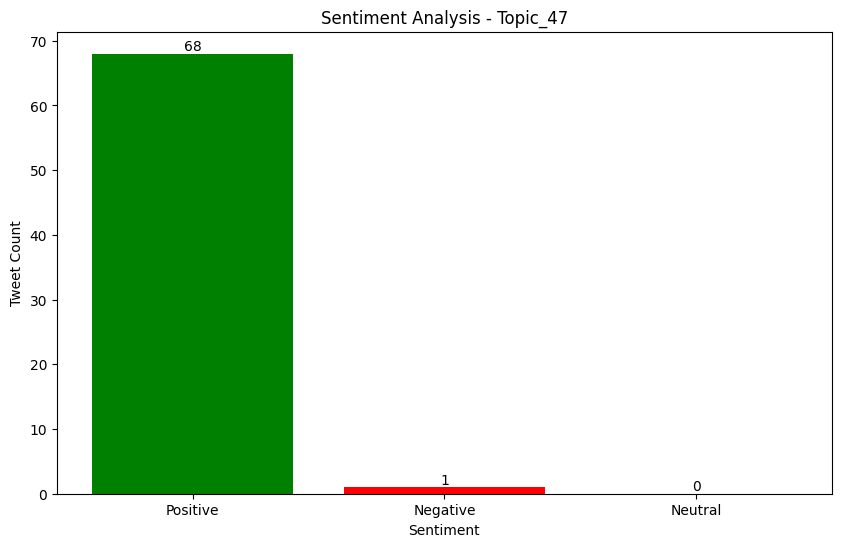

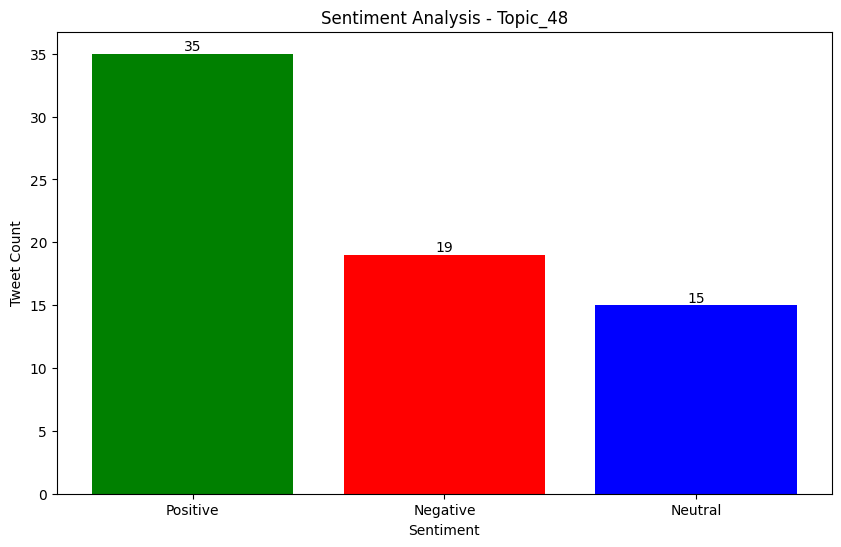

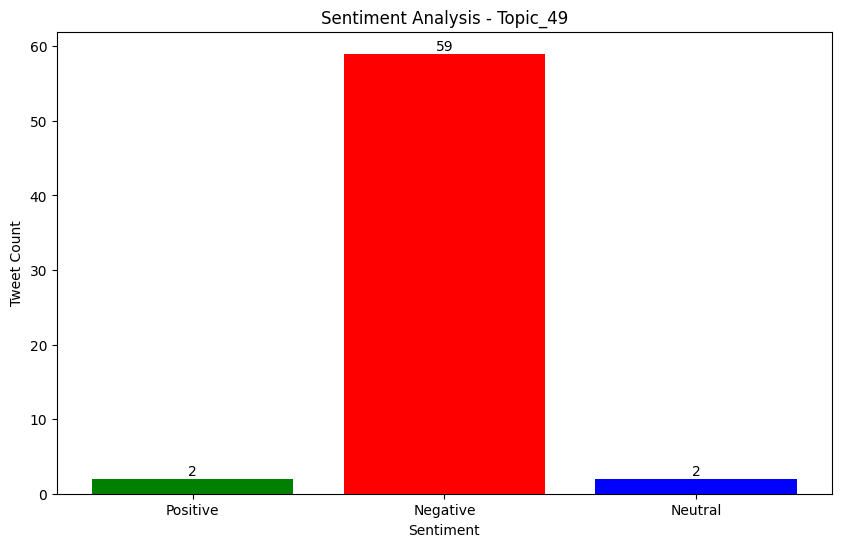

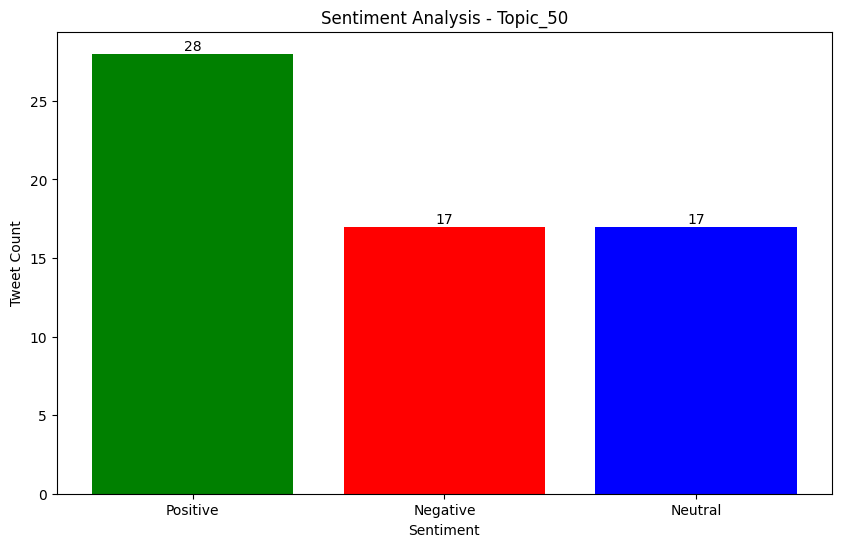

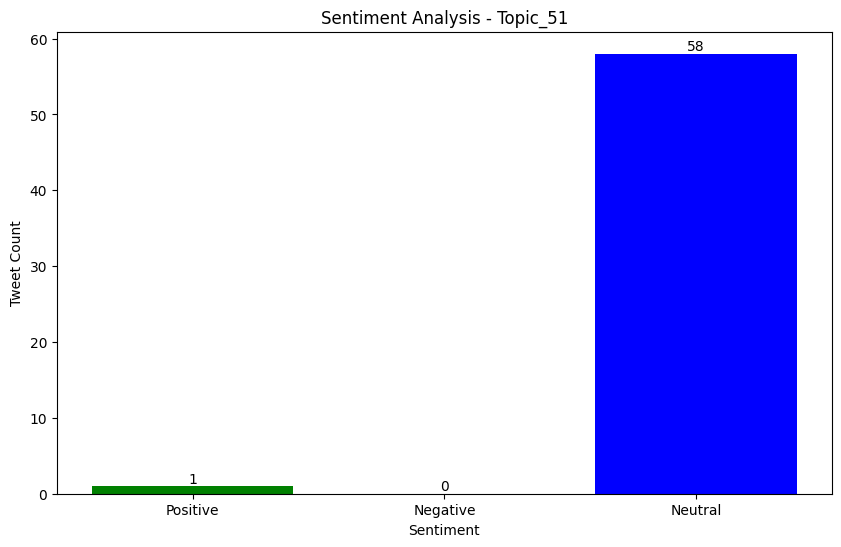

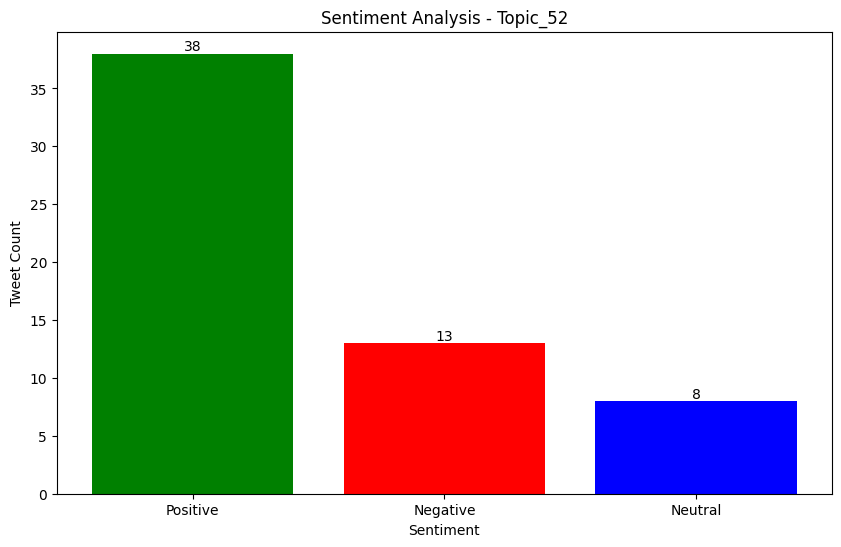

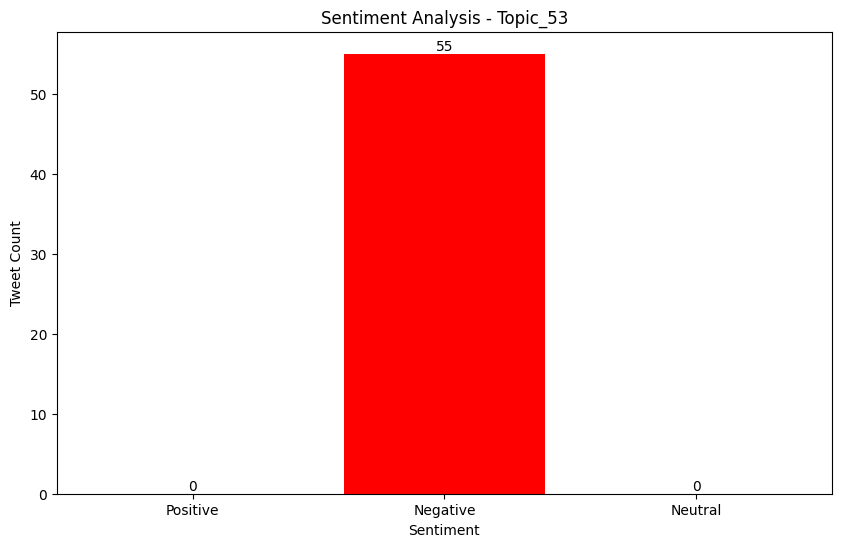

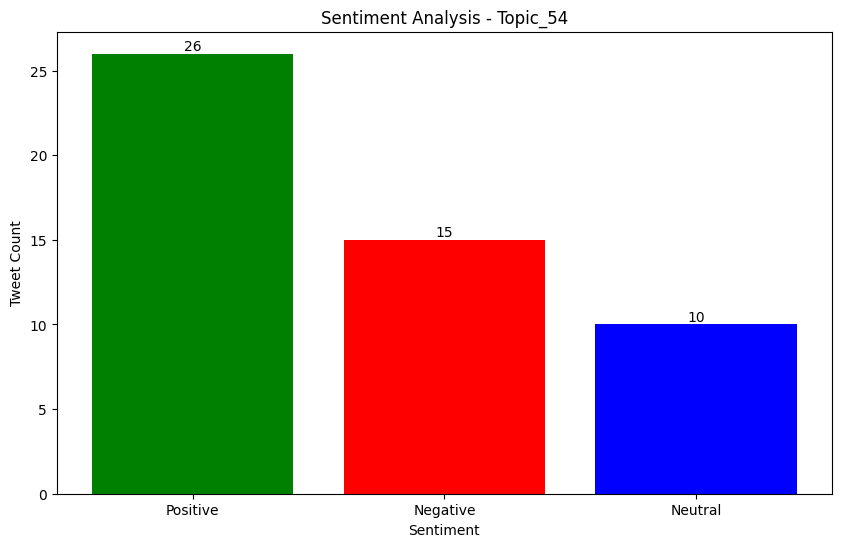

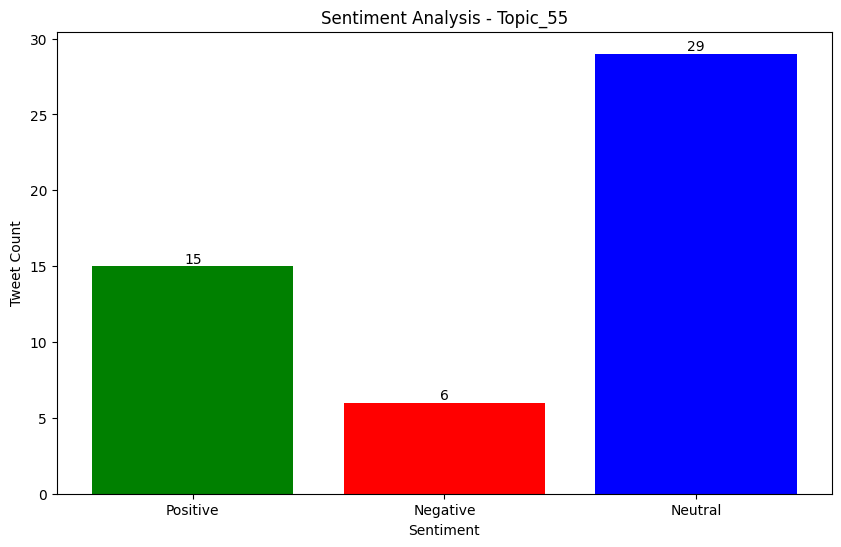

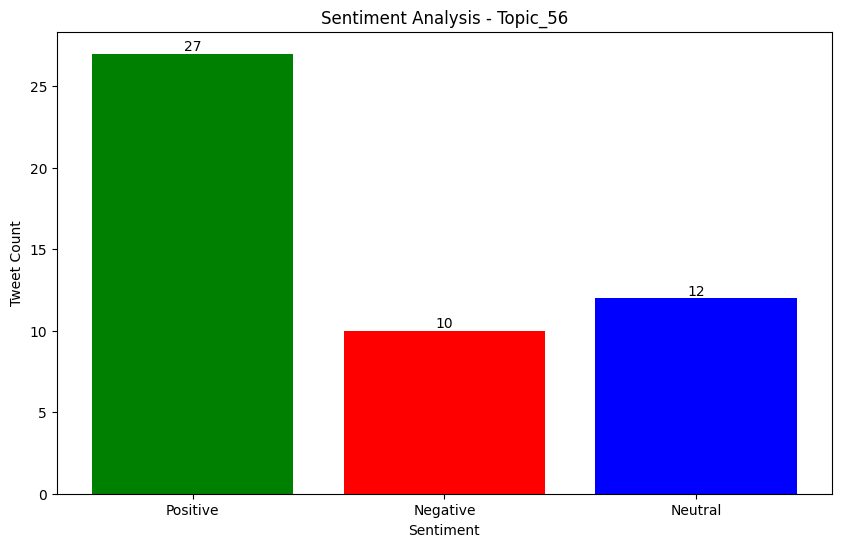

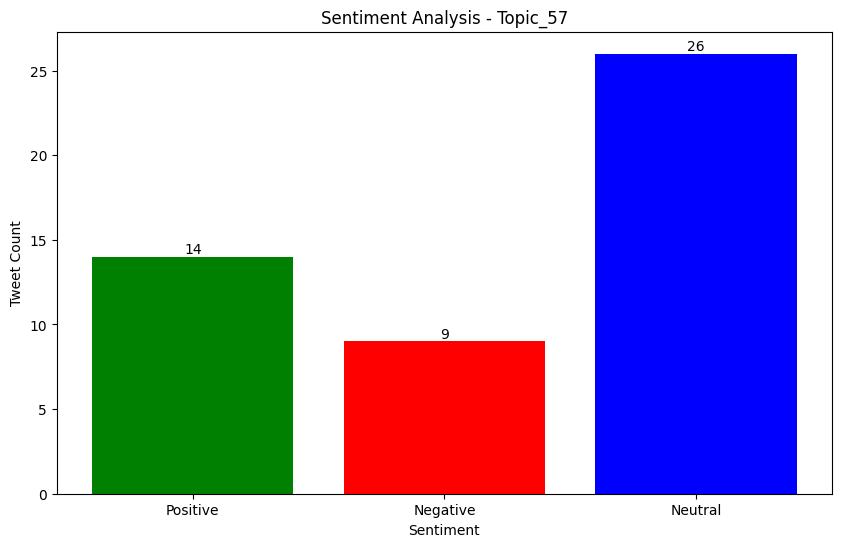

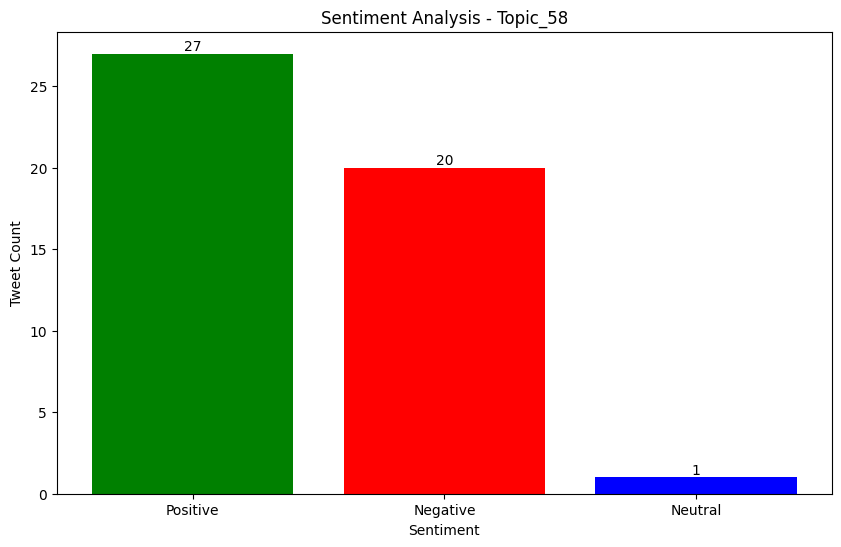

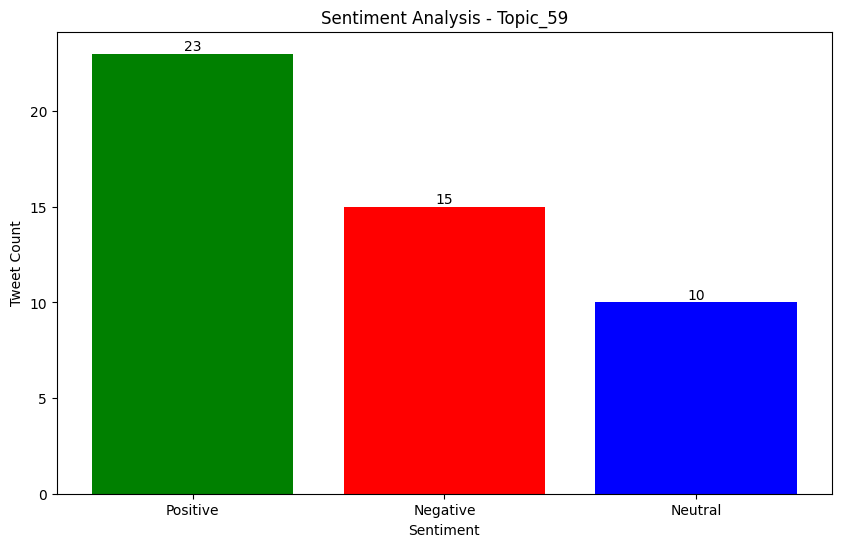

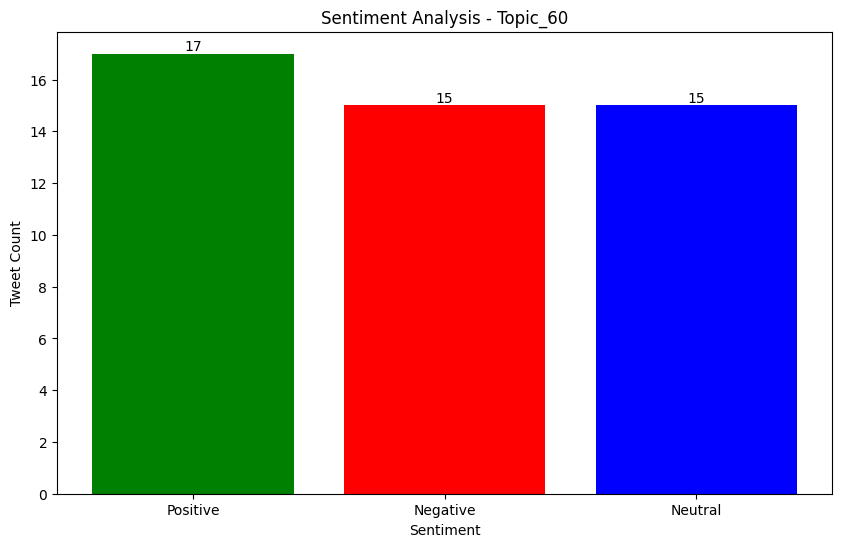

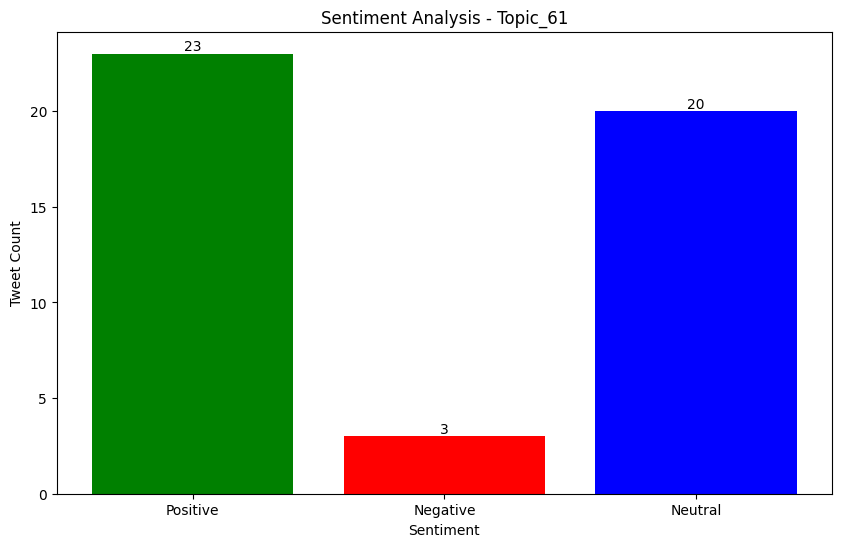

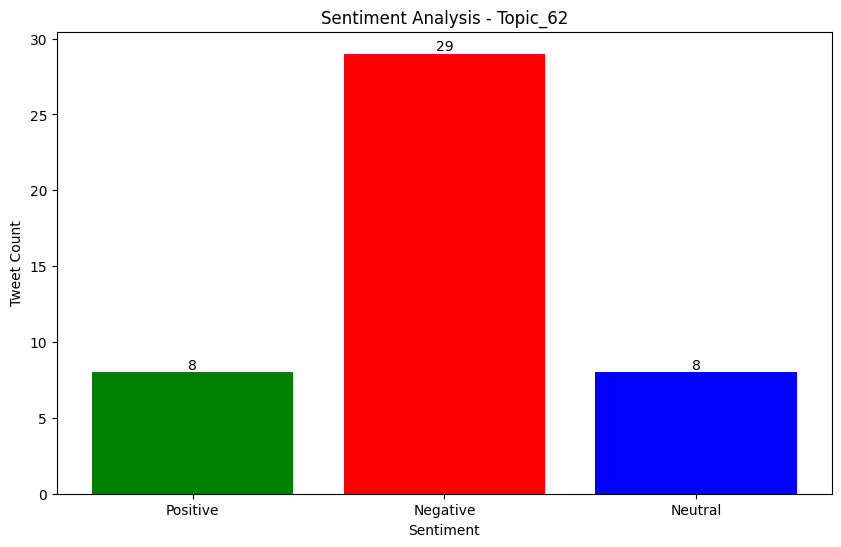

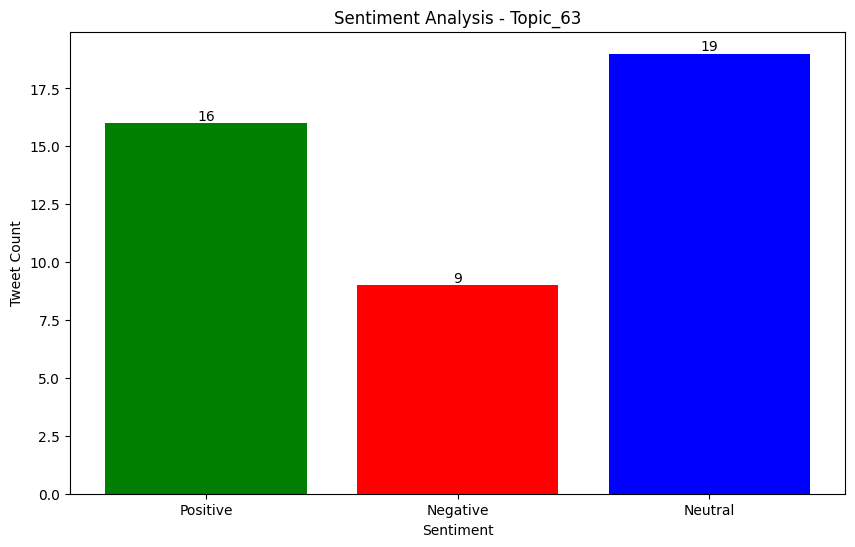

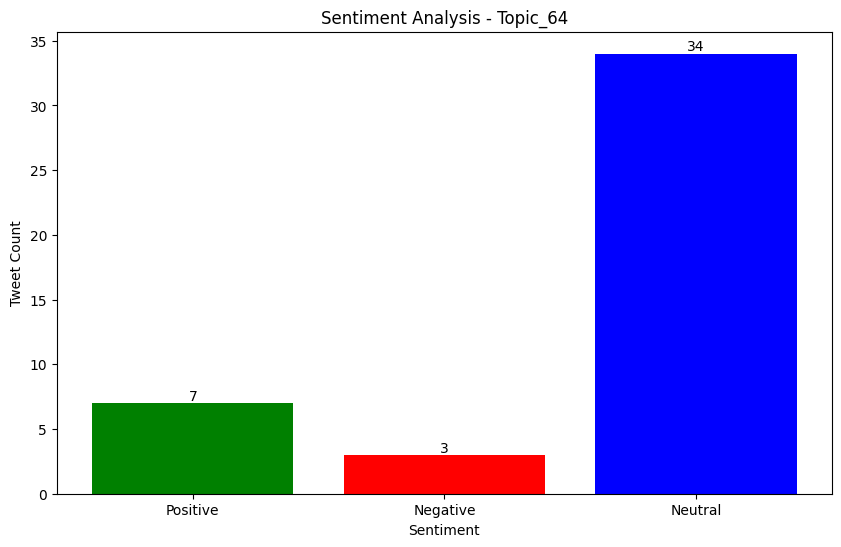

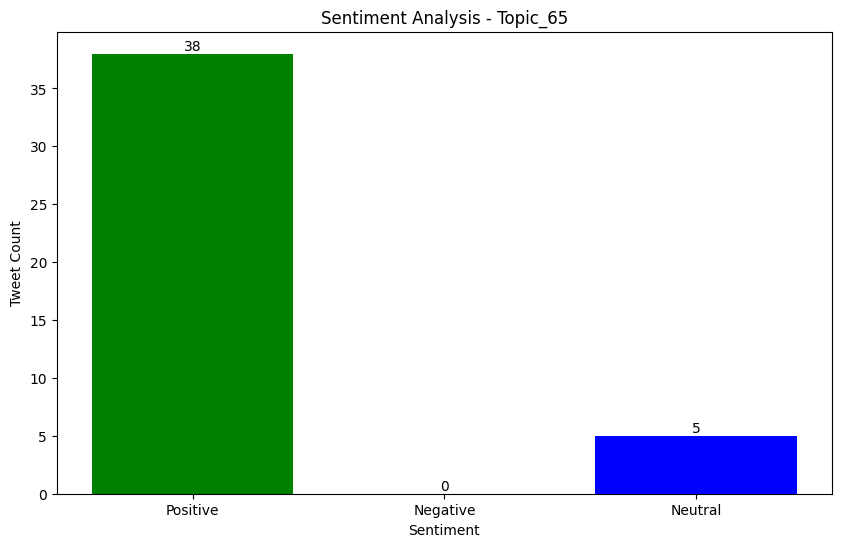

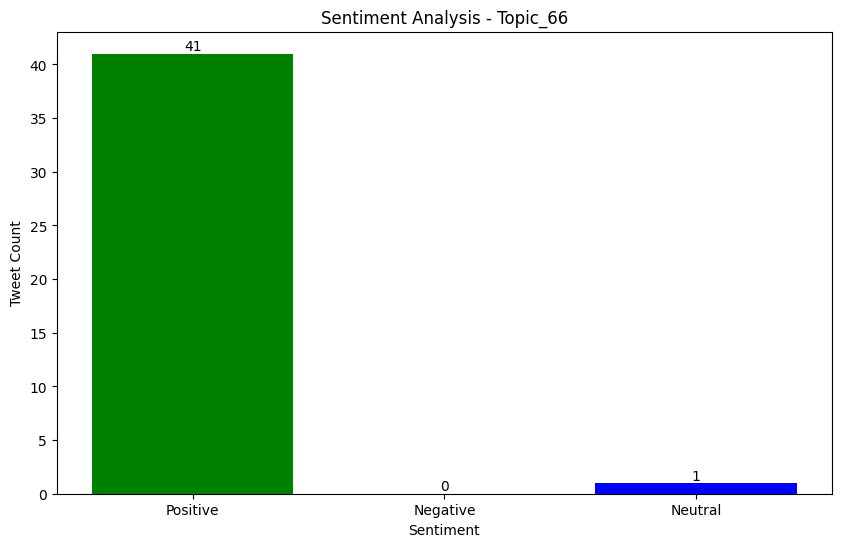

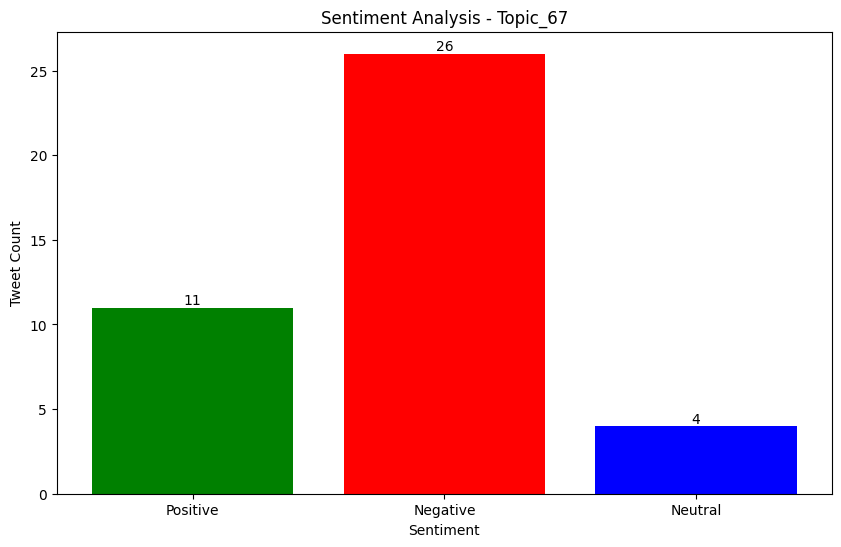

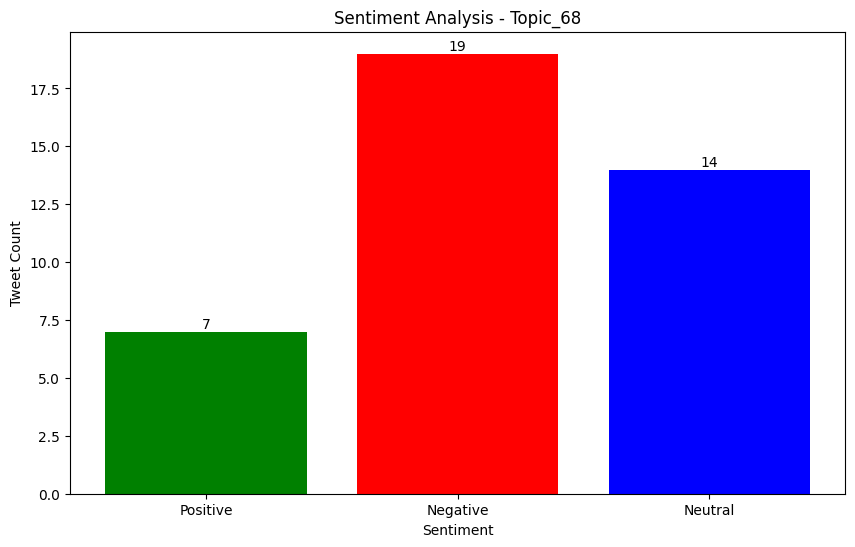

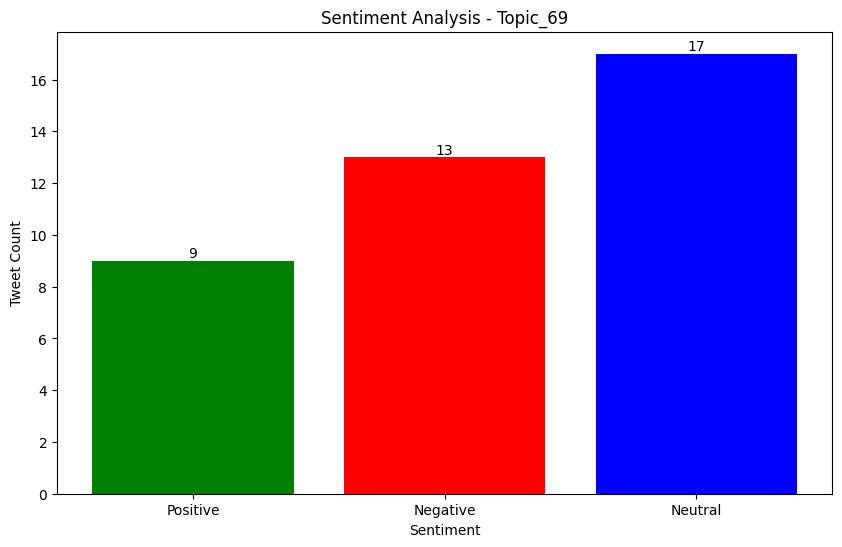

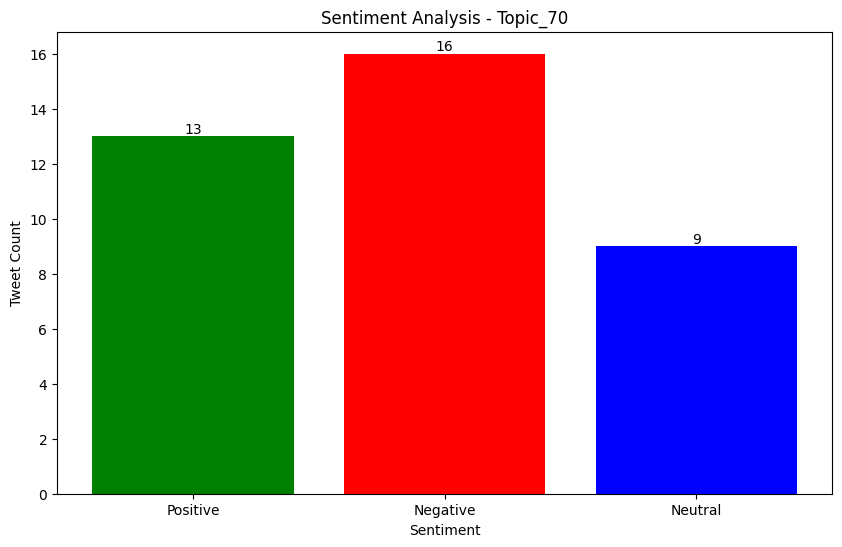

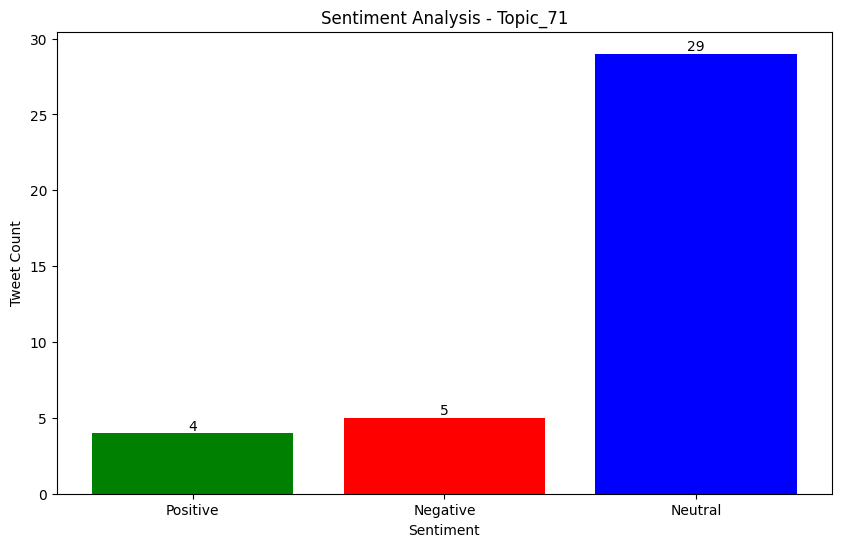

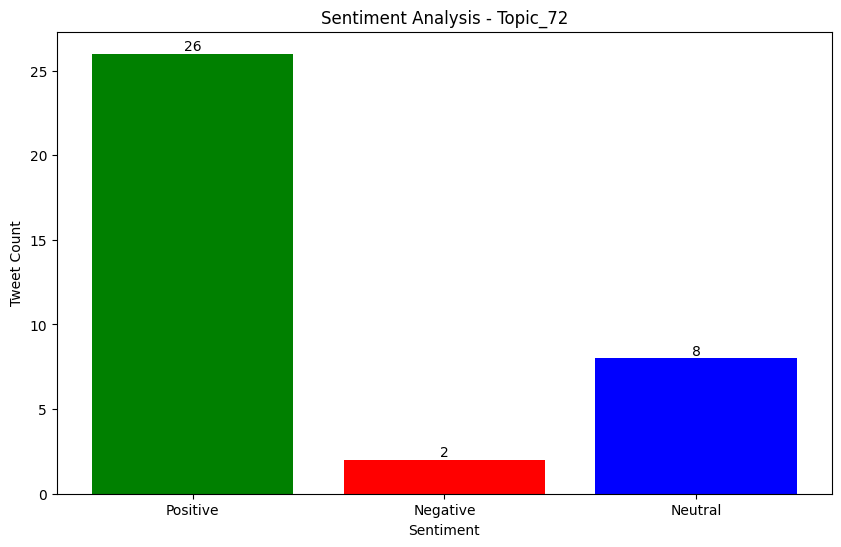

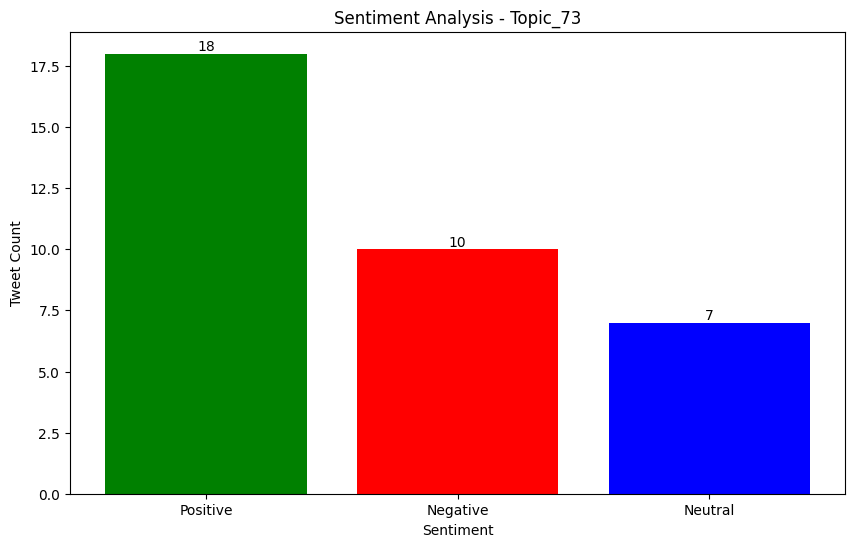

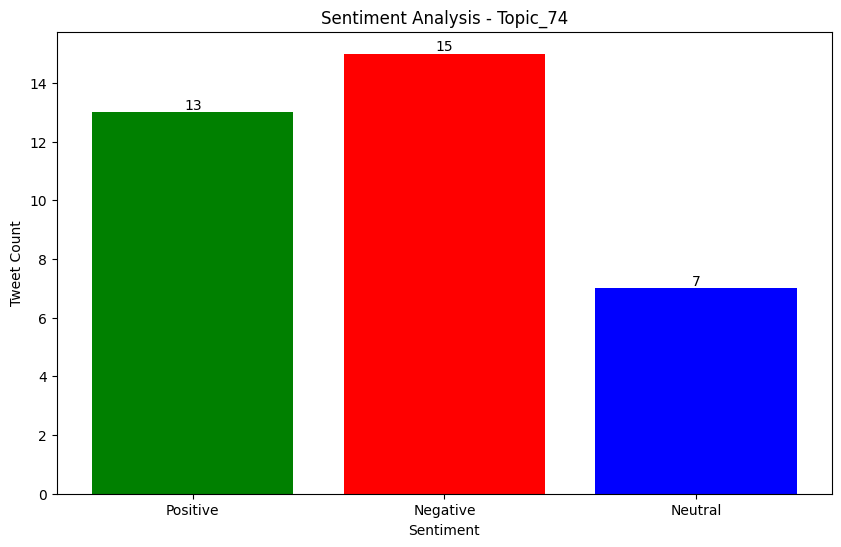

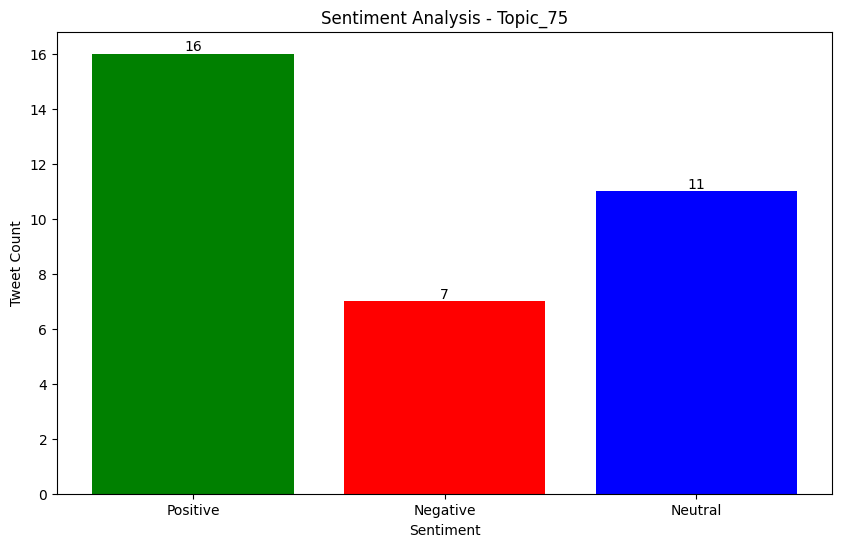

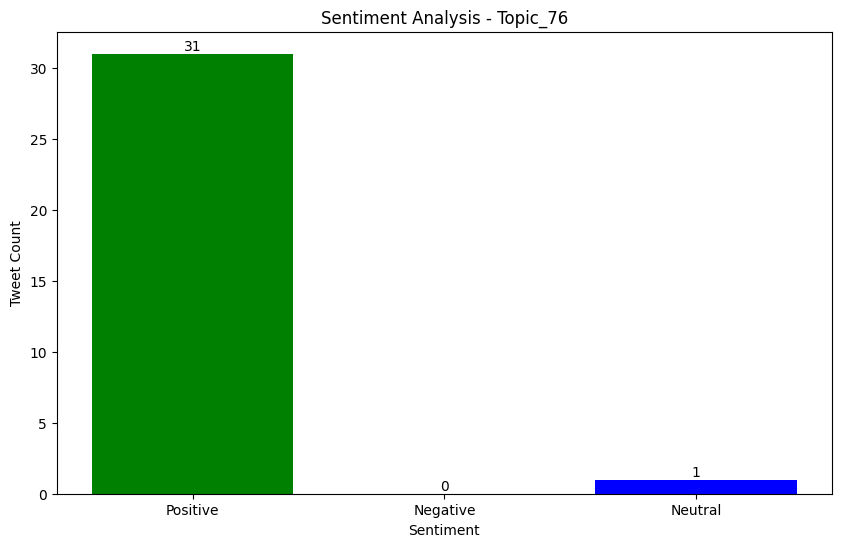

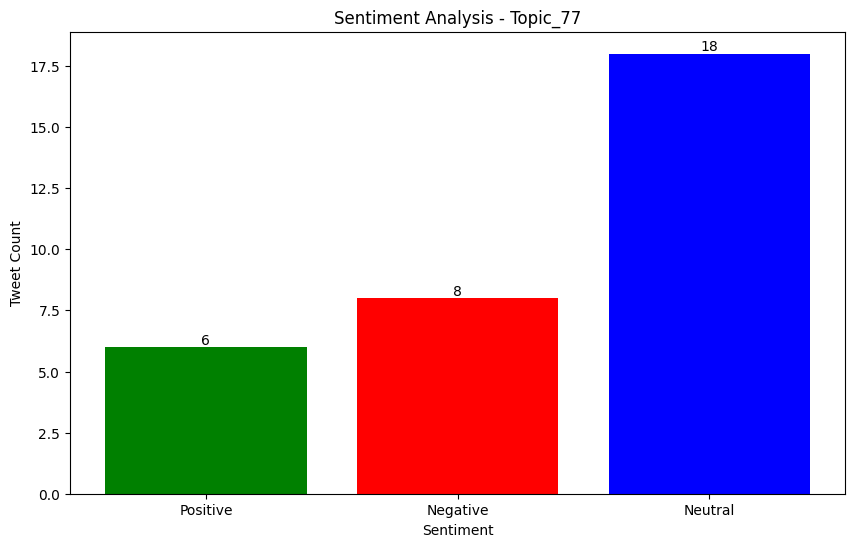

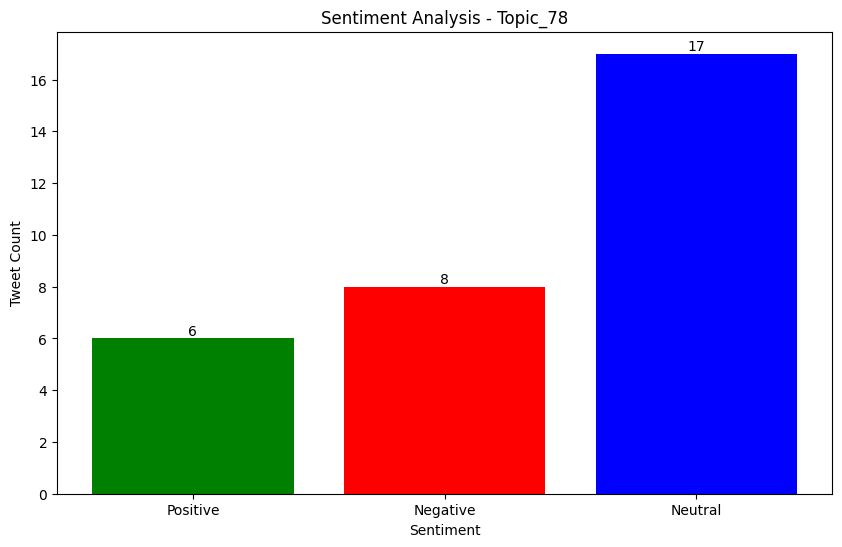

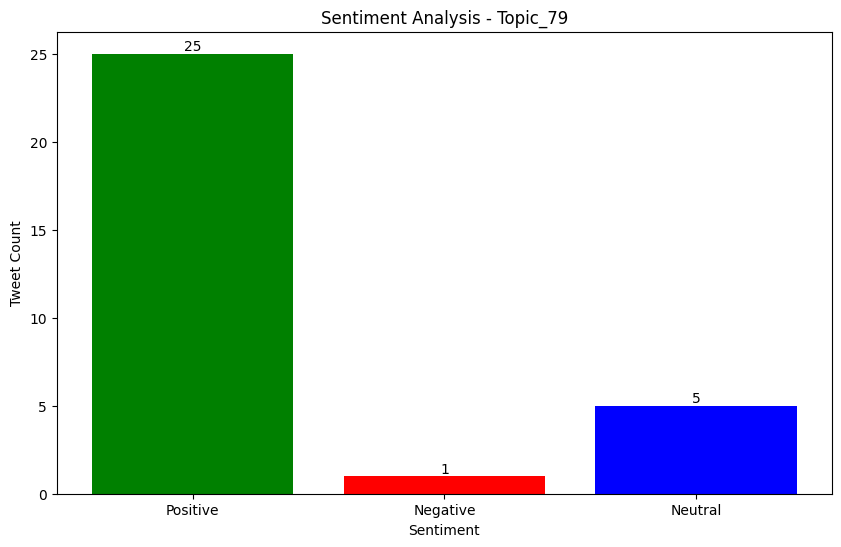

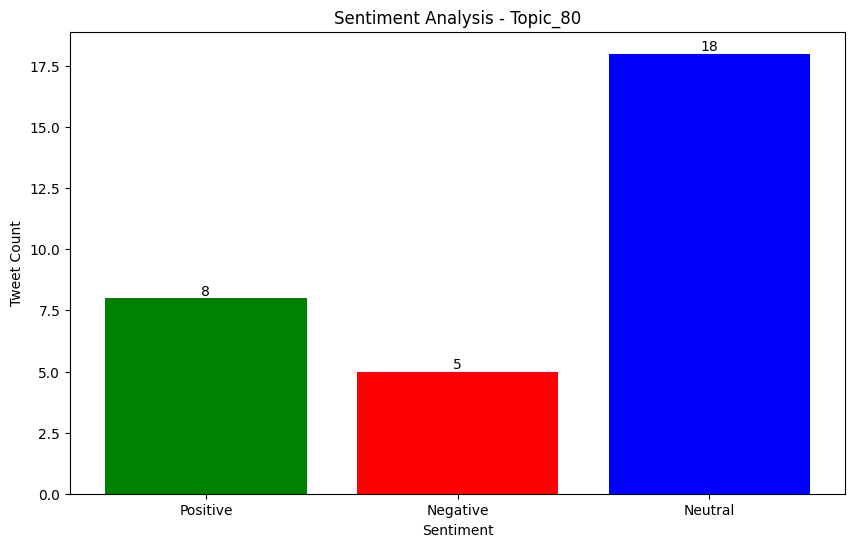

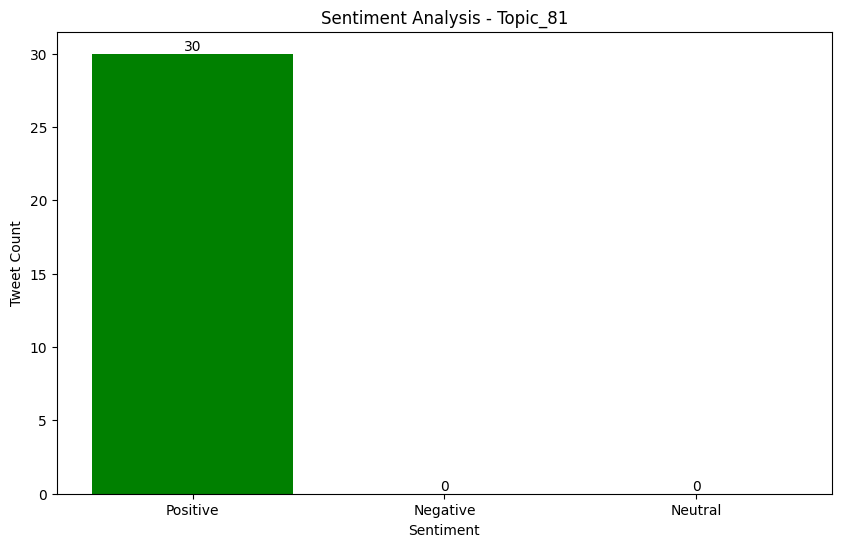

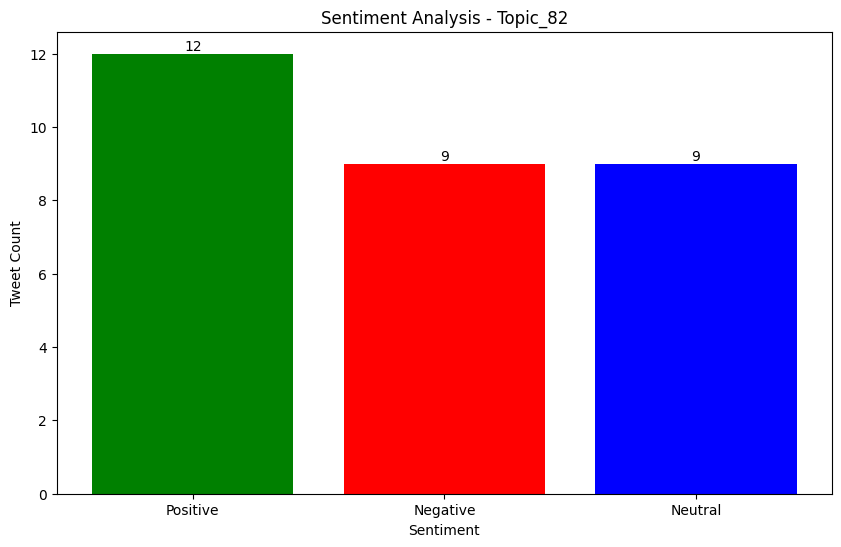

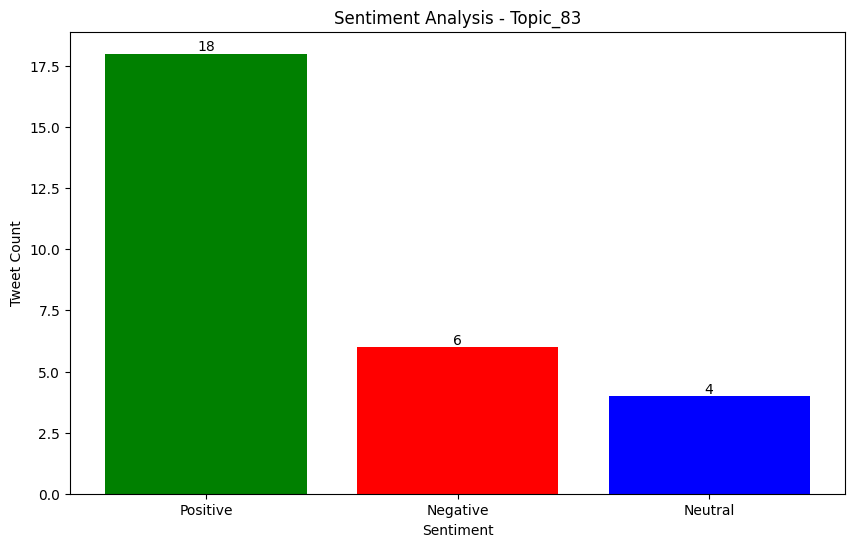

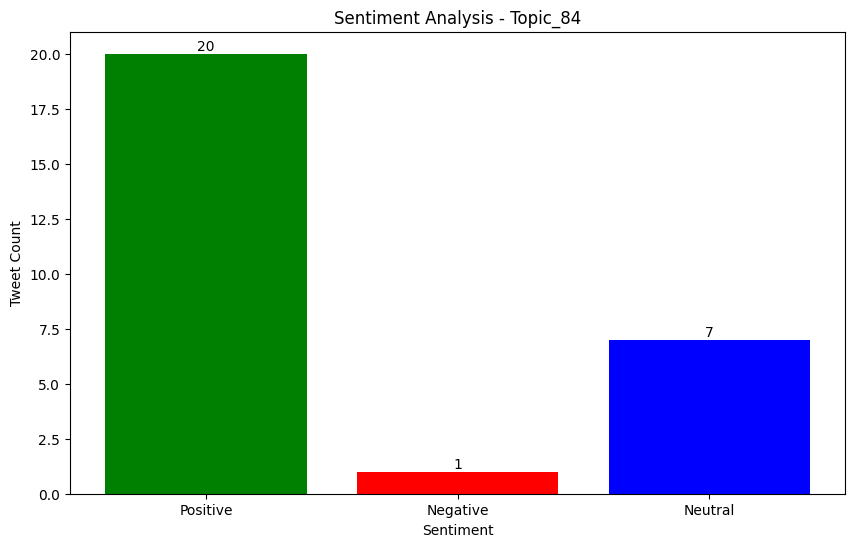

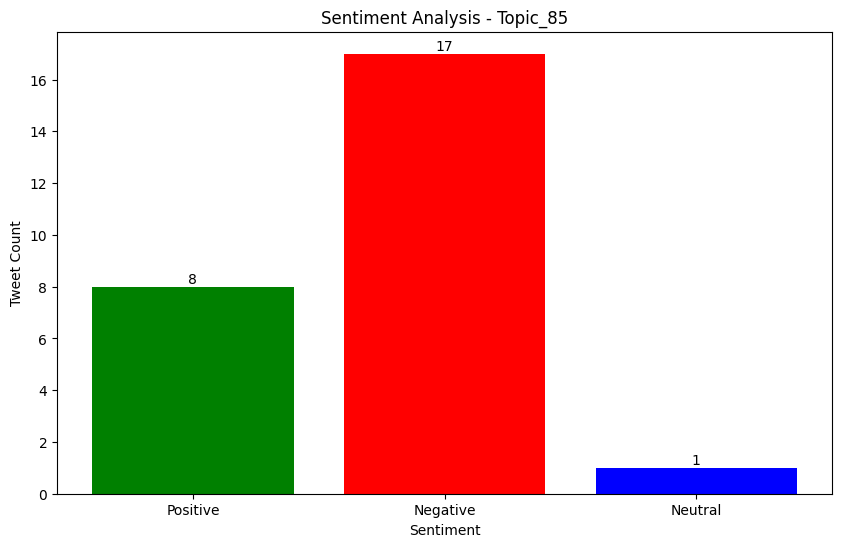

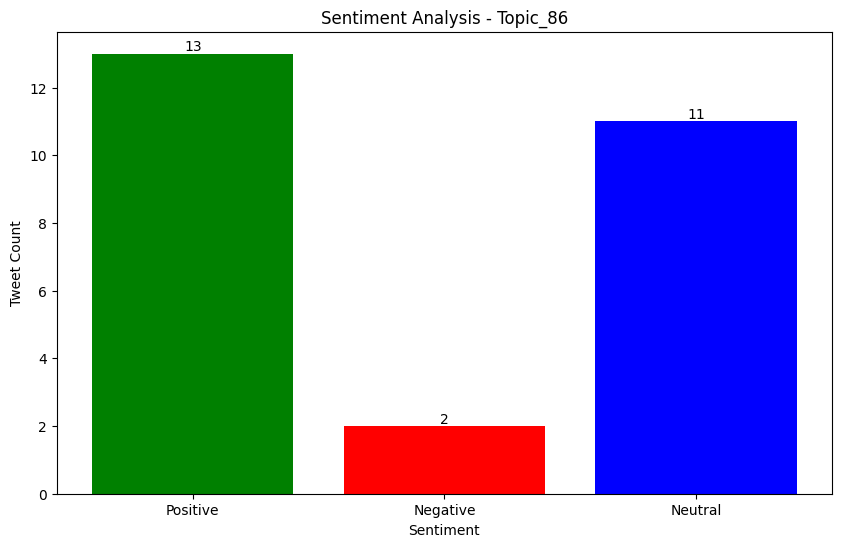

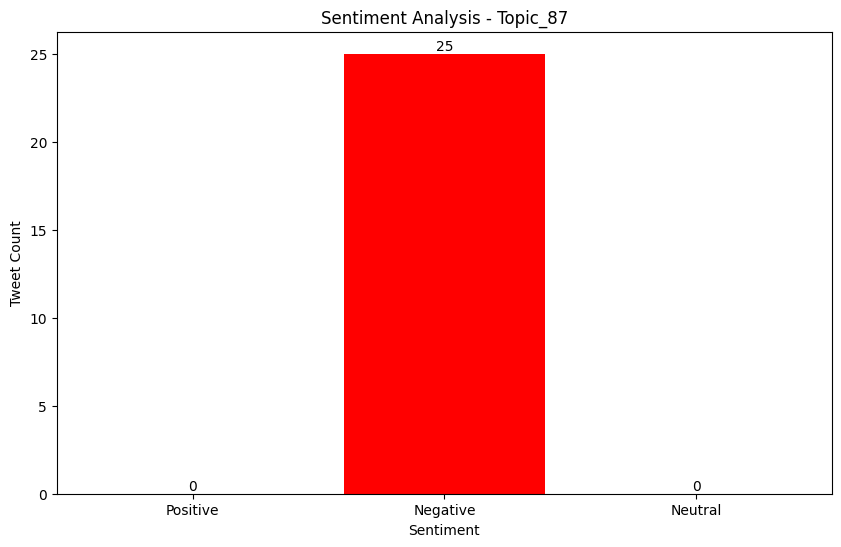

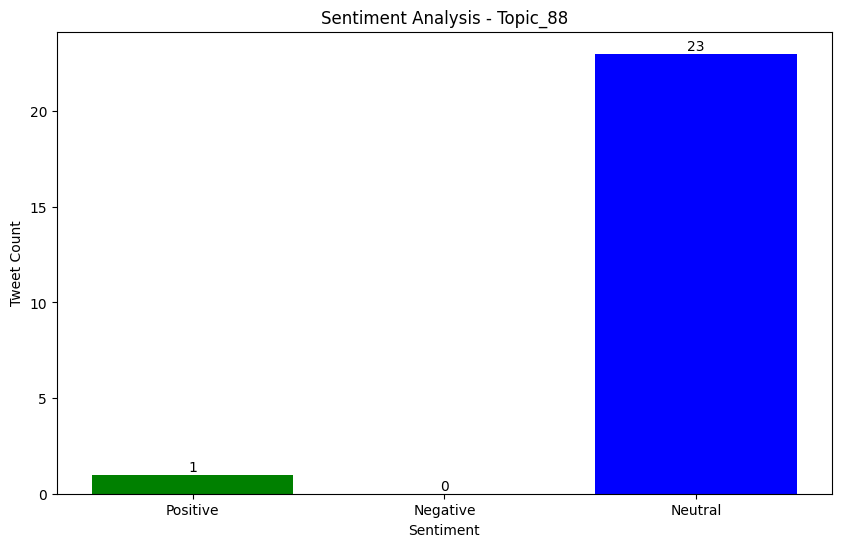

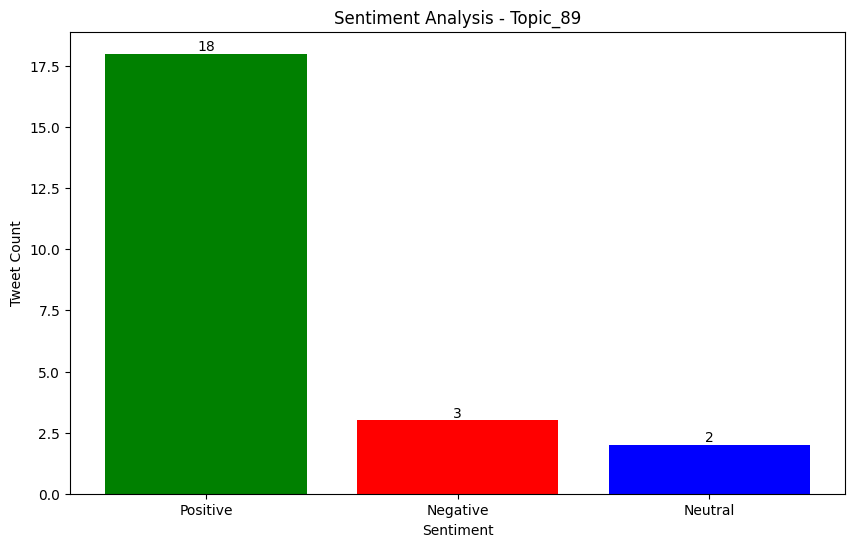

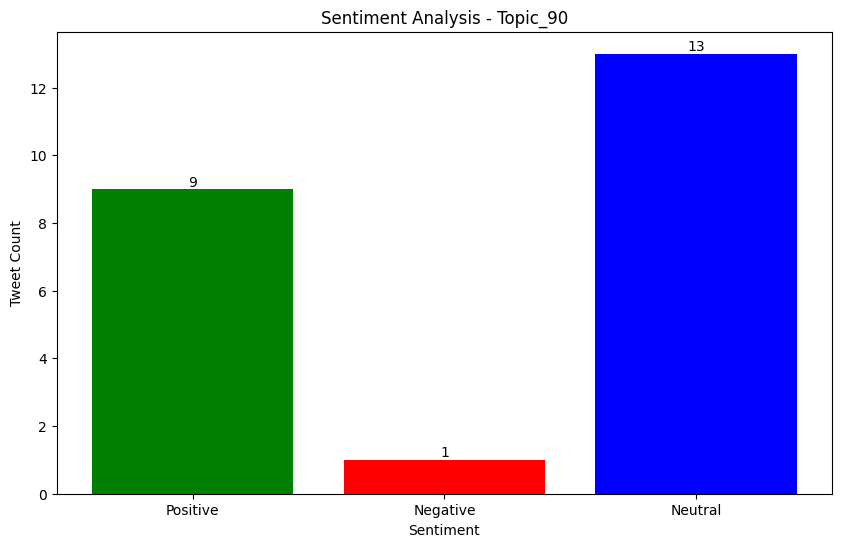

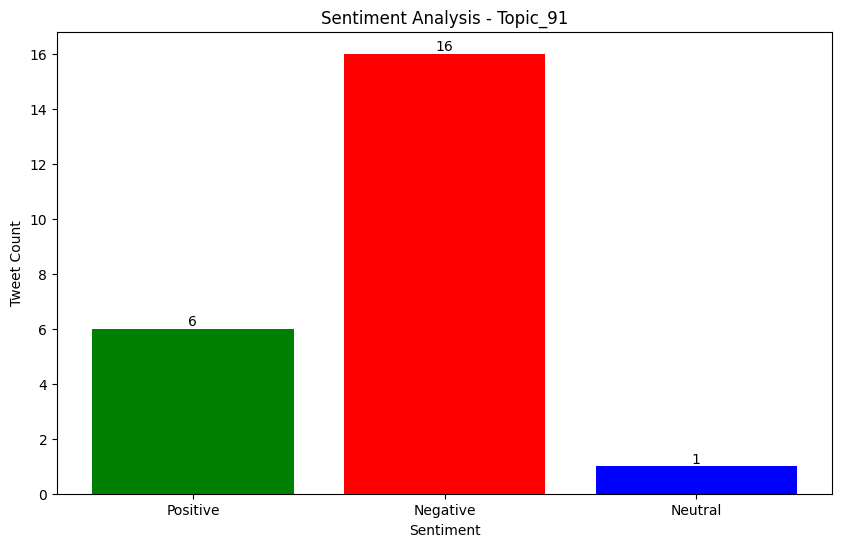

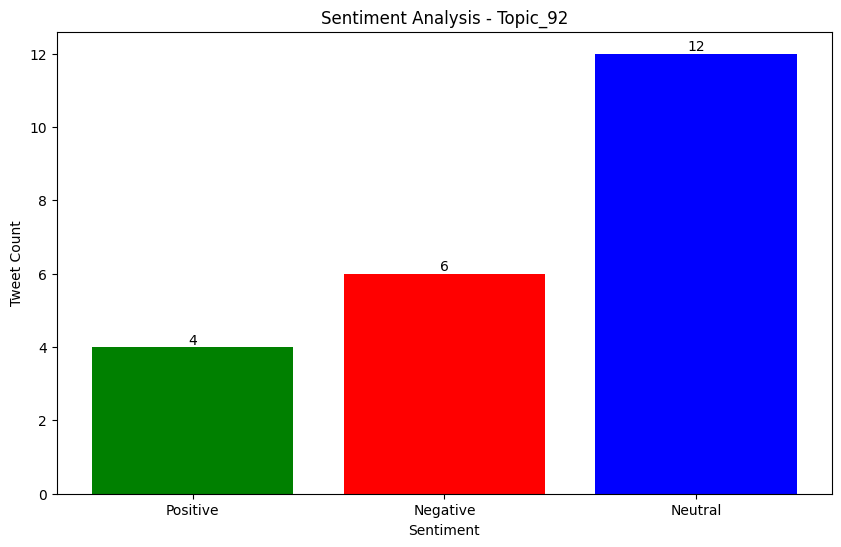

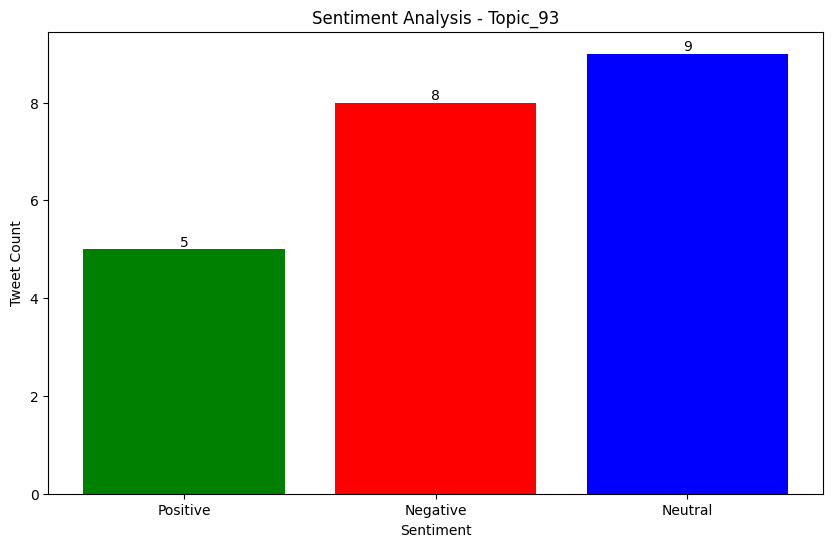

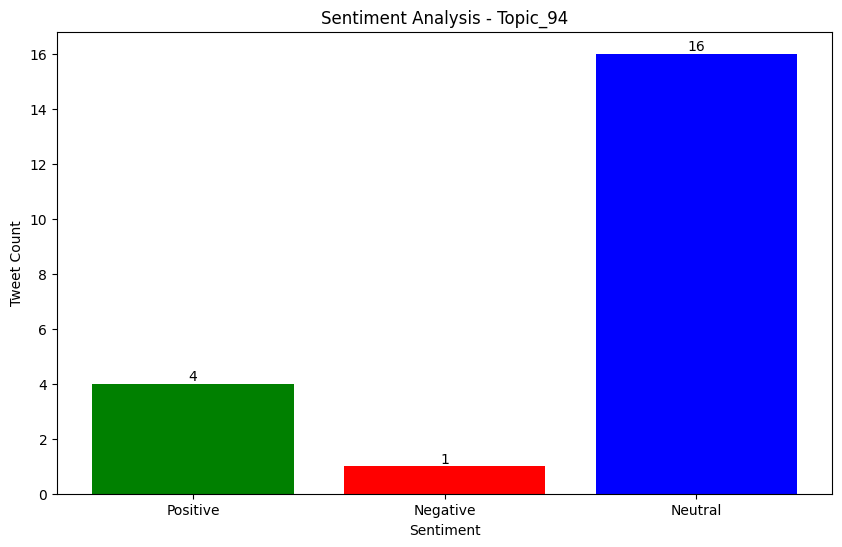

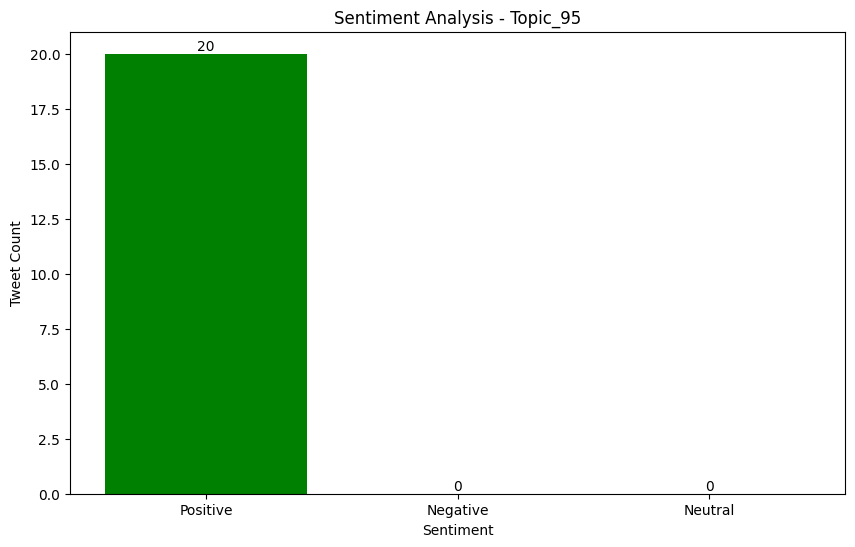

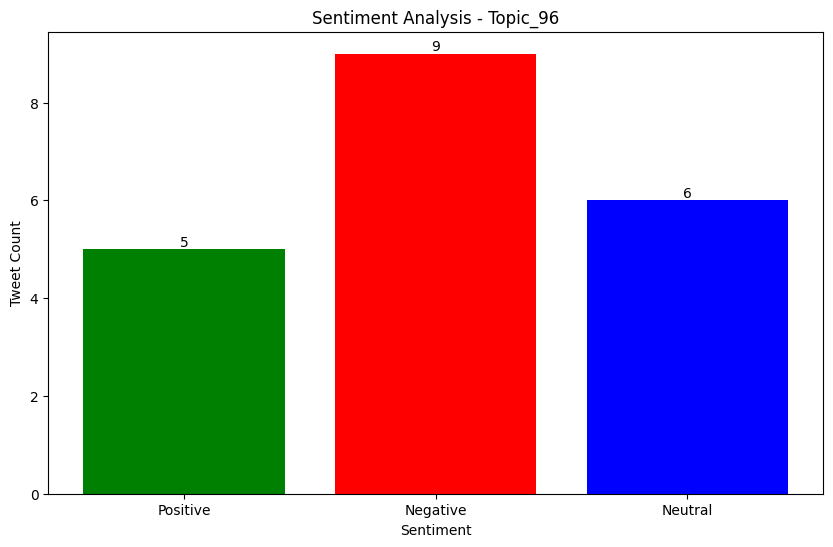

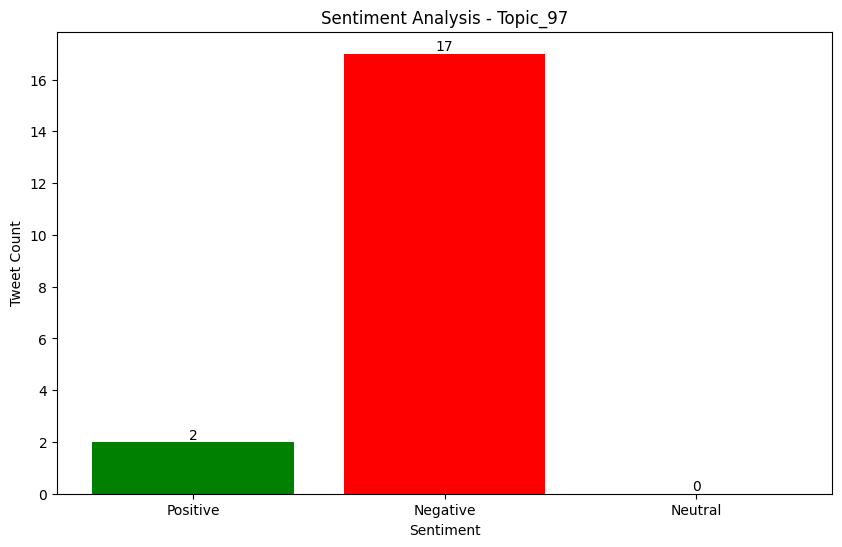

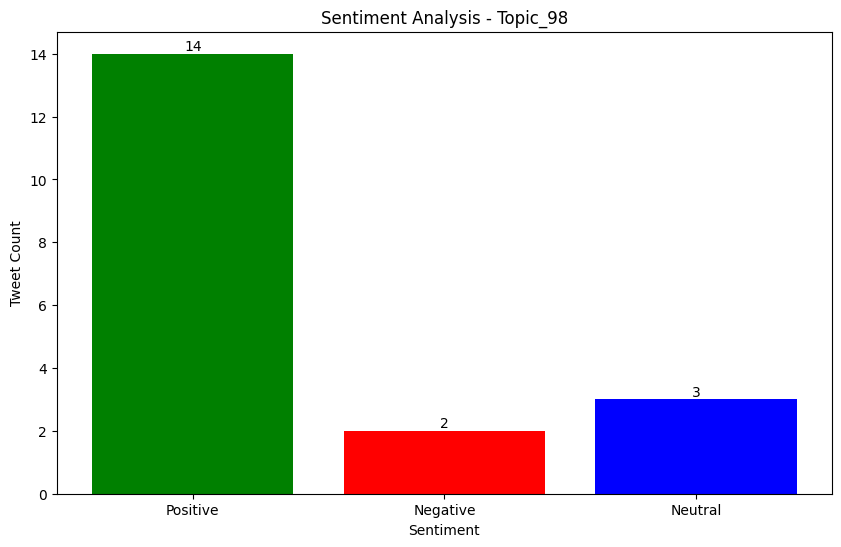

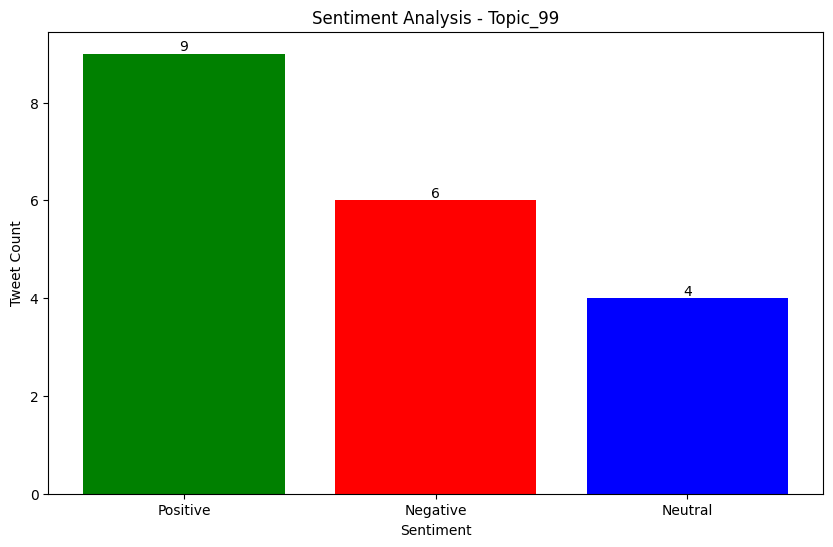

In [6]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/tweets_by_topics.xlsx', sheet_name=None)

# Perform sentiment analysis for each sheet and plot bar chart for each topic
for sheet_name, sheet_data in df.items():
    # Access the text column in the current sheet
    text_column = sheet_data['text']

    # Apply sentiment analysis to each text entry
    sentiment_scores = text_column.apply(lambda x: TextBlob(x).sentiment.polarity)

    # Count the number of positive, negative, and neutral tweets
    positive_count = len([score for score in sentiment_scores if score > 0])
    negative_count = len([score for score in sentiment_scores if score < 0])
    neutral_count = len([score for score in sentiment_scores if score == 0])

    # Plot bar chart for positive, negative, and neutral tweet counts
    plt.figure(figsize=(10, 6))

    # Set the positions of the bars on the x-axis
    bar_positions = [1, 2, 3]
    bar_heights = [positive_count, negative_count, neutral_count]
    bar_labels = ['Positive', 'Negative', 'Neutral']
    bar_colors = ['green', 'red', 'blue']

    # Plot the bars for positive, negative, and neutral tweet counts
    plt.bar(bar_positions, bar_heights, tick_label=bar_labels, color=bar_colors)

    # Add count labels to the bars
    for i, height in enumerate(bar_heights):
        plt.text(bar_positions[i], height, str(height), ha='center', va='bottom')

    plt.xlabel('Sentiment')
    plt.ylabel('Tweet Count')
    plt.title(f'Sentiment Analysis - {sheet_name}')
    plt.show()


In [7]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.7 MB/s eta 0:00:00


In [8]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

In [11]:
from gradio import Dropdown

In [16]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import gradio as gr

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/tweets_by_topics.xlsx', sheet_name=None)

# Get a list of all topics in the DataFrame
topics = list(df.keys())

# Function to perform sentiment analysis and generate bar chart
def sentiment_analysis(topic):
    sheet_data = df[topic]
    text_column = sheet_data['text']
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = text_column.apply(lambda x: analyzer.polarity_scores(x)['compound'])
    positive_count = len([score for score in sentiment_scores if score > 0])
    negative_count = len([score for score in sentiment_scores if score < 0])
    neutral_count = len([score for score in sentiment_scores if score == 0])

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    bar_positions = [1, 2, 3]
    bar_heights = [positive_count, negative_count, neutral_count]
    bar_labels = ['Positive', 'Negative', 'Neutral']
    bar_colors = ['green', 'red', 'blue']
    plt.bar(bar_positions, bar_heights, tick_label=bar_labels, color=bar_colors)
    for i, height in enumerate(bar_heights):
        plt.text(bar_positions[i], height, str(height), ha='center', va='bottom')
    plt.xlabel('Sentiment')
    plt.ylabel('Tweet Count')
    plt.title(f'Sentiment Analysis - {topic}')

    # Save the plot as an image file
    image_path = "sentiment_plot.png"
    plt.savefig(image_path)
    plt.close()

    return image_path

# Create Gradio interface
#iface = gr.Interface(fn=sentiment_analysis, inputs=[gr.inputs.Dropdown(topics)], outputs="image")
#iface.launch()

iface = gr.Interface(fn=sentiment_analysis, inputs=[Dropdown(topics)], outputs="image")
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a72b13bfb7a203b61a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
